# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 63446 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 63446) |           | Elapsed Time: 0:00:28 ETA:  21 days, 6:37:27

  0% (   83 of 63446) |                    | Elapsed Time: 0:00:29 ETA:  0:12:31

  0% (  146 of 63446) |                    | Elapsed Time: 0:00:30 ETA:  0:14:10

  0% (  224 of 63446) |                    | Elapsed Time: 0:00:31 ETA:  0:13:45

  0% (  279 of 63446) |                    | Elapsed Time: 0:00:32 ETA:  0:14:44

  0% (  352 of 63446) |                    | Elapsed Time: 0:00:34 ETA:  0:14:35

  0% (  422 of 63446) |                    | Elapsed Time: 0:00:35 ETA:  0:14:34

  0% (  491 of 63446) |                    | Elapsed Time: 0:00:36 ETA:  0:14:35

  0% (  556 of 63446) |                    | Elapsed Time: 0:00:37 ETA:  0:14:42

  0% (  633 of 63446) |                    | Elapsed Time: 0:00:38 ETA:  0:14:30

  1% (  702 of 63446) |                    | Elapsed Time: 0:00:39 ETA:  0:14:47

  1% (  777 of 63446) |                    | Elapsed Time: 0:00:40 ETA:  0:14:29

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:40 ETA:  0:14:45

  1% (  868 of 63446) |                    | Elapsed Time: 0:00:41 ETA:  0:14:14

  1% (  947 of 63446) |                    | Elapsed Time: 0:00:42 ETA:  0:14:04

  1% ( 1027 of 63446) |                    | Elapsed Time: 0:00:43 ETA:  0:13:48

  1% ( 1106 of 63446) |                    | Elapsed Time: 0:00:44 ETA:  0:13:34

  1% ( 1184 of 63446) |                    | Elapsed Time: 0:00:45 ETA:  0:13:15

  1% ( 1262 of 63446) |                    | Elapsed Time: 0:00:46 ETA:  0:13:12

  2% ( 1335 of 63446) |                    | Elapsed Time: 0:00:47 ETA:  0:13:06

  2% ( 1409 of 63446) |                    | Elapsed Time: 0:00:48 ETA:  0:13:06

  2% ( 1486 of 63446) |                    | Elapsed Time: 0:00:49 ETA:  0:12:59

  2% ( 1563 of 63446) |                    | Elapsed Time: 0:00:50 ETA:  0:12:55

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:00:50 ETA:  0:12:57

  2% ( 1666 of 63446) |                    | Elapsed Time: 0:00:51 ETA:  0:12:57

  2% ( 1743 of 63446) |                    | Elapsed Time: 0:00:52 ETA:  0:12:59

  2% ( 1821 of 63446) |                    | Elapsed Time: 0:00:53 ETA:  0:12:58

  2% ( 1895 of 63446) |                    | Elapsed Time: 0:00:54 ETA:  0:13:02

  3% ( 1964 of 63446) |                    | Elapsed Time: 0:00:55 ETA:  0:13:08

  3% ( 2028 of 63446) |                    | Elapsed Time: 0:00:56 ETA:  0:13:21

  3% ( 2092 of 63446) |                    | Elapsed Time: 0:00:57 ETA:  0:13:39

  3% ( 2120 of 63446) |                    | Elapsed Time: 0:00:59 ETA:  0:15:31

  3% ( 2182 of 63446) |                    | Elapsed Time: 0:01:00 ETA:  0:15:41

  3% ( 2243 of 63446) |                    | Elapsed Time: 0:01:01 ETA:  0:16:11

  3% ( 2309 of 63446) |                    | Elapsed Time: 0:01:02 ETA:  0:16:29

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:01:03 ETA:  0:17:24

  3% ( 2446 of 63446) |                    | Elapsed Time: 0:01:04 ETA:  0:17:29

  3% ( 2513 of 63446) |                    | Elapsed Time: 0:01:05 ETA:  0:17:20

  4% ( 2582 of 63446) |                    | Elapsed Time: 0:01:06 ETA:  0:17:07

  4% ( 2651 of 63446) |                    | Elapsed Time: 0:01:07 ETA:  0:15:04

  4% ( 2708 of 63446) |                    | Elapsed Time: 0:01:08 ETA:  0:15:14

  4% ( 2774 of 63446) |                    | Elapsed Time: 0:01:09 ETA:  0:15:03

  4% ( 2840 of 63446) |                    | Elapsed Time: 0:01:10 ETA:  0:15:02

  4% ( 2909 of 63446) |                    | Elapsed Time: 0:01:11 ETA:  0:14:55

  4% ( 2984 of 63446) |                    | Elapsed Time: 0:01:12 ETA:  0:14:40

  4% ( 3054 of 63446) |                    | Elapsed Time: 0:01:13 ETA:  0:14:32

  4% ( 3124 of 63446) |                    | Elapsed Time: 0:01:14 ETA:  0:14:27

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:01:14 ETA:  0:14:27

  5% ( 3245 of 63446) |#                   | Elapsed Time: 0:01:15 ETA:  0:14:22

  5% ( 3316 of 63446) |#                   | Elapsed Time: 0:01:16 ETA:  0:13:59

  5% ( 3386 of 63446) |#                   | Elapsed Time: 0:01:17 ETA:  0:13:52

  5% ( 3462 of 63446) |#                   | Elapsed Time: 0:01:19 ETA:  0:13:37

  5% ( 3536 of 63446) |#                   | Elapsed Time: 0:01:20 ETA:  0:13:28

  5% ( 3615 of 63446) |#                   | Elapsed Time: 0:01:21 ETA:  0:13:20

  5% ( 3698 of 63446) |#                   | Elapsed Time: 0:01:22 ETA:  0:13:02

  5% ( 3784 of 63446) |#                   | Elapsed Time: 0:01:23 ETA:  0:12:41

  6% ( 3870 of 63446) |#                   | Elapsed Time: 0:01:24 ETA:  0:12:21

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:01:25 ETA:  0:11:53

  6% ( 4050 of 63446) |#                   | Elapsed Time: 0:01:26 ETA:  0:11:34

  6% ( 4137 of 63446) |#                   | Elapsed Time: 0:01:27 ETA:  0:11:21

  6% ( 4221 of 63446) |#                   | Elapsed Time: 0:01:28 ETA:  0:11:09

  6% ( 4305 of 63446) |#                   | Elapsed Time: 0:01:29 ETA:  0:11:04

  6% ( 4388 of 63446) |#                   | Elapsed Time: 0:01:30 ETA:  0:11:03

  7% ( 4473 of 63446) |#                   | Elapsed Time: 0:01:31 ETA:  0:11:04

  7% ( 4559 of 63446) |#                   | Elapsed Time: 0:01:32 ETA:  0:11:03

  7% ( 4645 of 63446) |#                   | Elapsed Time: 0:01:33 ETA:  0:11:01

  7% ( 4729 of 63446) |#                   | Elapsed Time: 0:01:34 ETA:  0:11:00

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:01:34 ETA:  0:11:00

  7% ( 4841 of 63446) |#                   | Elapsed Time: 0:01:35 ETA:  0:11:04

  7% ( 4914 of 63446) |#                   | Elapsed Time: 0:01:36 ETA:  0:11:14

  7% ( 4992 of 63446) |#                   | Elapsed Time: 0:01:37 ETA:  0:11:20

  7% ( 5070 of 63446) |#                   | Elapsed Time: 0:01:38 ETA:  0:11:24

  8% ( 5148 of 63446) |#                   | Elapsed Time: 0:01:39 ETA:  0:11:31

  8% ( 5223 of 63446) |#                   | Elapsed Time: 0:01:40 ETA:  0:11:43

  8% ( 5282 of 63446) |#                   | Elapsed Time: 0:01:41 ETA:  0:12:15

  8% ( 5352 of 63446) |#                   | Elapsed Time: 0:01:42 ETA:  0:12:34

  8% ( 5425 of 63446) |#                   | Elapsed Time: 0:01:43 ETA:  0:12:39

  8% ( 5497 of 63446) |#                   | Elapsed Time: 0:01:44 ETA:  0:12:51

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:01:46 ETA:  0:15:26

  8% ( 5621 of 63446) |#                   | Elapsed Time: 0:01:47 ETA:  0:15:41

  8% ( 5691 of 63446) |#                   | Elapsed Time: 0:01:48 ETA:  0:15:57

  9% ( 5766 of 63446) |#                   | Elapsed Time: 0:01:49 ETA:  0:15:55

  9% ( 5832 of 63446) |#                   | Elapsed Time: 0:01:50 ETA:  0:15:41

  9% ( 5898 of 63446) |#                   | Elapsed Time: 0:01:51 ETA:  0:15:46

  9% ( 5970 of 63446) |#                   | Elapsed Time: 0:01:52 ETA:  0:15:48

  9% ( 6043 of 63446) |#                   | Elapsed Time: 0:01:53 ETA:  0:15:45

  9% ( 6115 of 63446) |#                   | Elapsed Time: 0:01:54 ETA:  0:13:11

  9% ( 6181 of 63446) |#                   | Elapsed Time: 0:01:55 ETA:  0:13:17

  9% ( 6256 of 63446) |#                   | Elapsed Time: 0:01:56 ETA:  0:13:07

  9% ( 6327 of 63446) |#                   | Elapsed Time: 0:01:57 ETA:  0:13:05

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:58 ETA:  0:13:14

 10% ( 6408 of 63446) |##                  | Elapsed Time: 0:01:59 ETA:  0:13:18

 10% ( 6469 of 63446) |##                  | Elapsed Time: 0:02:00 ETA:  0:13:26

 10% ( 6531 of 63446) |##                  | Elapsed Time: 0:02:01 ETA:  0:13:40

 10% ( 6593 of 63446) |##                  | Elapsed Time: 0:02:02 ETA:  0:13:58

 10% ( 6661 of 63446) |##                  | Elapsed Time: 0:02:03 ETA:  0:14:04

 10% ( 6735 of 63446) |##                  | Elapsed Time: 0:02:04 ETA:  0:13:50

 10% ( 6793 of 63446) |##                  | Elapsed Time: 0:02:05 ETA:  0:14:19

 10% ( 6851 of 63446) |##                  | Elapsed Time: 0:02:06 ETA:  0:14:42

 10% ( 6906 of 63446) |##                  | Elapsed Time: 0:02:07 ETA:  0:14:58

 10% ( 6961 of 63446) |##                  | Elapsed Time: 0:02:08 ETA:  0:15:12

 11% ( 7020 of 63446) |##                  | Elapsed Time: 0:02:09 ETA:  0:15:15

 11% ( 7079 of 63446) |##                  | Elapsed Time: 0:02:10 ETA:  0:15:21

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:02:11 ETA:  0:15:15

 11% ( 7213 of 63446) |##                  | Elapsed Time: 0:02:12 ETA:  0:15:01

 11% ( 7280 of 63446) |##                  | Elapsed Time: 0:02:13 ETA:  0:15:12

 11% ( 7341 of 63446) |##                  | Elapsed Time: 0:02:14 ETA:  0:15:06

 11% ( 7405 of 63446) |##                  | Elapsed Time: 0:02:15 ETA:  0:14:54

 11% ( 7471 of 63446) |##                  | Elapsed Time: 0:02:16 ETA:  0:14:32

 11% ( 7540 of 63446) |##                  | Elapsed Time: 0:02:17 ETA:  0:14:06

 11% ( 7611 of 63446) |##                  | Elapsed Time: 0:02:18 ETA:  0:13:44

 12% ( 7684 of 63446) |##                  | Elapsed Time: 0:02:19 ETA:  0:13:20

 12% ( 7755 of 63446) |##                  | Elapsed Time: 0:02:20 ETA:  0:13:11

 12% ( 7830 of 63446) |##                  | Elapsed Time: 0:02:21 ETA:  0:13:11

 12% ( 7911 of 63446) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:50

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:30

 12% ( 8015 of 63446) |##                  | Elapsed Time: 0:02:23 ETA:  0:11:59

 12% ( 8088 of 63446) |##                  | Elapsed Time: 0:02:24 ETA:  0:11:49

 12% ( 8160 of 63446) |##                  | Elapsed Time: 0:02:25 ETA:  0:11:43

 12% ( 8235 of 63446) |##                  | Elapsed Time: 0:02:26 ETA:  0:11:37

 13% ( 8307 of 63446) |##                  | Elapsed Time: 0:02:27 ETA:  0:11:38

 13% ( 8380 of 63446) |##                  | Elapsed Time: 0:02:28 ETA:  0:11:34

 13% ( 8454 of 63446) |##                  | Elapsed Time: 0:02:29 ETA:  0:11:34

 13% ( 8527 of 63446) |##                  | Elapsed Time: 0:02:30 ETA:  0:11:43

 13% ( 8601 of 63446) |##                  | Elapsed Time: 0:02:31 ETA:  0:11:46

 13% ( 8673 of 63446) |##                  | Elapsed Time: 0:02:32 ETA:  0:12:01

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:02:33 ETA:  0:11:58

 13% ( 8799 of 63446) |##                  | Elapsed Time: 0:02:34 ETA:  0:11:52

 13% ( 8873 of 63446) |##                  | Elapsed Time: 0:02:35 ETA:  0:11:53

 14% ( 8947 of 63446) |##                  | Elapsed Time: 0:02:36 ETA:  0:11:48

 14% ( 9022 of 63446) |##                  | Elapsed Time: 0:02:37 ETA:  0:11:45

 14% ( 9097 of 63446) |##                  | Elapsed Time: 0:02:38 ETA:  0:11:43

 14% ( 9172 of 63446) |##                  | Elapsed Time: 0:02:39 ETA:  0:11:39

 14% ( 9246 of 63446) |##                  | Elapsed Time: 0:02:40 ETA:  0:11:38

 14% ( 9320 of 63446) |##                  | Elapsed Time: 0:02:41 ETA:  0:11:34

 14% ( 9392 of 63446) |##                  | Elapsed Time: 0:02:42 ETA:  0:11:36

 14% ( 9468 of 63446) |##                  | Elapsed Time: 0:02:43 ETA:  0:11:34

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:02:43 ETA:  0:11:30

 15% ( 9593 of 63446) |###                 | Elapsed Time: 0:02:44 ETA:  0:11:27

 15% ( 9667 of 63446) |###                 | Elapsed Time: 0:02:45 ETA:  0:11:26

 15% ( 9741 of 63446) |###                 | Elapsed Time: 0:02:46 ETA:  0:11:27

 15% ( 9752 of 63446) |###                 | Elapsed Time: 0:02:48 ETA:  0:14:06

 15% ( 9822 of 63446) |###                 | Elapsed Time: 0:02:49 ETA:  0:14:12

 15% ( 9893 of 63446) |###                 | Elapsed Time: 0:02:50 ETA:  0:14:17

 15% ( 9965 of 63446) |###                 | Elapsed Time: 0:02:51 ETA:  0:14:17

 15% (10037 of 63446) |###                 | Elapsed Time: 0:02:52 ETA:  0:14:24

 15% (10112 of 63446) |###                 | Elapsed Time: 0:02:53 ETA:  0:14:17

 16% (10185 of 63446) |###                 | Elapsed Time: 0:02:54 ETA:  0:14:20

 16% (10260 of 63446) |###                 | Elapsed Time: 0:02:55 ETA:  0:14:18

 16% (10310 of 63446) |###                 | Elapsed Time: 0:02:56 ETA:  0:14:20

 16% (10388 of 63446) |###                 | Elapsed Time: 0:02:57 ETA:  0:11:29

 16% (10466 of 63446) |###                 | Elapsed Time: 0:02:58 ETA:  0:11:17

 16% (10546 of 63446) |###                 | Elapsed Time: 0:02:59 ETA:  0:11:04

 16% (10621 of 63446) |###                 | Elapsed Time: 0:03:00 ETA:  0:10:59

 16% (10697 of 63446) |###                 | Elapsed Time: 0:03:01 ETA:  0:10:52

 16% (10774 of 63446) |###                 | Elapsed Time: 0:03:02 ETA:  0:10:48

 17% (10853 of 63446) |###                 | Elapsed Time: 0:03:03 ETA:  0:10:40

 17% (10932 of 63446) |###                 | Elapsed Time: 0:03:04 ETA:  0:10:34

 17% (11012 of 63446) |###                 | Elapsed Time: 0:03:05 ETA:  0:10:32

 17% (11104 of 63446) |###                 | Elapsed Time: 0:03:06 ETA:  0:10:31

 17% (11183 of 63446) |###                 | Elapsed Time: 0:03:07 ETA:  0:10:32

 17% (11259 of 63446) |###                 | Elapsed Time: 0:03:08 ETA:  0:10:31

 17% (11332 of 63446) |###                 | Elapsed Time: 0:03:09 ETA:  0:10:34

 17% (11403 of 63446) |###                 | Elapsed Time: 0:03:10 ETA:  0:10:42

 18% (11465 of 63446) |###                 | Elapsed Time: 0:03:11 ETA:  0:11:05

 18% (11530 of 63446) |###                 | Elapsed Time: 0:03:12 ETA:  0:11:23

 18% (11604 of 63446) |###                 | Elapsed Time: 0:03:13 ETA:  0:11:31

 18% (11679 of 63446) |###                 | Elapsed Time: 0:03:14 ETA:  0:11:34

 18% (11745 of 63446) |###                 | Elapsed Time: 0:03:15 ETA:  0:11:43

 18% (11812 of 63446) |###                 | Elapsed Time: 0:03:16 ETA:  0:11:59

 18% (11897 of 63446) |###                 | Elapsed Time: 0:03:17 ETA:  0:12:05

 18% (11972 of 63446) |###                 | Elapsed Time: 0:03:18 ETA:  0:11:56

 18% (12049 of 63446) |###                 | Elapsed Time: 0:03:19 ETA:  0:11:31

 19% (12116 of 63446) |###                 | Elapsed Time: 0:03:20 ETA:  0:11:27

 19% (12190 of 63446) |###                 | Elapsed Time: 0:03:21 ETA:  0:11:26

 19% (12265 of 63446) |###                 | Elapsed Time: 0:03:22 ETA:  0:11:25

 19% (12340 of 63446) |###                 | Elapsed Time: 0:03:23 ETA:  0:11:10

 19% (12416 of 63446) |###                 | Elapsed Time: 0:03:24 ETA:  0:10:56

 19% (12497 of 63446) |###                 | Elapsed Time: 0:03:25 ETA:  0:10:45

 19% (12576 of 63446) |###                 | Elapsed Time: 0:03:26 ETA:  0:10:39

 19% (12651 of 63446) |###                 | Elapsed Time: 0:03:27 ETA:  0:10:37

 20% (12690 of 63446) |####                | Elapsed Time: 0:03:28 ETA:  0:10:40

 20% (12764 of 63446) |####                | Elapsed Time: 0:03:29 ETA:  0:10:31

 20% (12839 of 63446) |####                | Elapsed Time: 0:03:30 ETA:  0:10:29

 20% (12917 of 63446) |####                | Elapsed Time: 0:03:31 ETA:  0:10:24

 20% (12989 of 63446) |####                | Elapsed Time: 0:03:32 ETA:  0:10:27

 20% (13062 of 63446) |####                | Elapsed Time: 0:03:33 ETA:  0:10:30

 20% (13136 of 63446) |####                | Elapsed Time: 0:03:34 ETA:  0:10:38

 20% (13210 of 63446) |####                | Elapsed Time: 0:03:35 ETA:  0:10:44

 20% (13287 of 63446) |####                | Elapsed Time: 0:03:36 ETA:  0:10:40

 21% (13361 of 63446) |####                | Elapsed Time: 0:03:37 ETA:  0:10:39

 21% (13426 of 63446) |####                | Elapsed Time: 0:03:38 ETA:  0:10:49

 21% (13483 of 63446) |####                | Elapsed Time: 0:03:39 ETA:  0:10:55

 21% (13562 of 63446) |####                | Elapsed Time: 0:03:40 ETA:  0:10:52

 21% (13637 of 63446) |####                | Elapsed Time: 0:03:41 ETA:  0:10:47

 21% (13711 of 63446) |####                | Elapsed Time: 0:03:42 ETA:  0:10:44

 21% (13788 of 63446) |####                | Elapsed Time: 0:03:43 ETA:  0:10:40

 21% (13865 of 63446) |####                | Elapsed Time: 0:03:44 ETA:  0:10:36

 21% (13941 of 63446) |####                | Elapsed Time: 0:03:45 ETA:  0:10:37

 22% (14016 of 63446) |####                | Elapsed Time: 0:03:46 ETA:  0:10:34

 22% (14092 of 63446) |####                | Elapsed Time: 0:03:47 ETA:  0:10:19

 22% (14161 of 63446) |####                | Elapsed Time: 0:03:48 ETA:  0:10:19

 22% (14232 of 63446) |####                | Elapsed Time: 0:03:49 ETA:  0:10:29

 22% (14276 of 63446) |####                | Elapsed Time: 0:03:49 ETA:  0:10:34

 22% (14348 of 63446) |####                | Elapsed Time: 0:03:50 ETA:  0:10:37

 22% (14415 of 63446) |####                | Elapsed Time: 0:03:51 ETA:  0:10:49

 22% (14486 of 63446) |####                | Elapsed Time: 0:03:52 ETA:  0:10:56

 22% (14558 of 63446) |####                | Elapsed Time: 0:03:53 ETA:  0:11:01

 23% (14626 of 63446) |####                | Elapsed Time: 0:03:54 ETA:  0:11:11

 23% (14701 of 63446) |####                | Elapsed Time: 0:03:55 ETA:  0:11:11

 23% (14776 of 63446) |####                | Elapsed Time: 0:03:56 ETA:  0:11:02

 23% (14850 of 63446) |####                | Elapsed Time: 0:03:57 ETA:  0:10:56

 23% (14924 of 63446) |####                | Elapsed Time: 0:03:58 ETA:  0:10:49

 23% (14981 of 63446) |####                | Elapsed Time: 0:04:01 ETA:  0:13:46

 23% (15050 of 63446) |####                | Elapsed Time: 0:04:02 ETA:  0:13:42

 23% (15069 of 63446) |####                | Elapsed Time: 0:04:02 ETA:  0:13:59

 23% (15138 of 63446) |####                | Elapsed Time: 0:04:03 ETA:  0:14:04

 23% (15208 of 63446) |####                | Elapsed Time: 0:04:04 ETA:  0:13:59

 24% (15282 of 63446) |####                | Elapsed Time: 0:04:05 ETA:  0:14:00

 24% (15357 of 63446) |####                | Elapsed Time: 0:04:06 ETA:  0:13:58

 24% (15433 of 63446) |####                | Elapsed Time: 0:04:07 ETA:  0:13:54

 24% (15511 of 63446) |####                | Elapsed Time: 0:04:08 ETA:  0:13:45

 24% (15589 of 63446) |####                | Elapsed Time: 0:04:09 ETA:  0:10:20

 24% (15666 of 63446) |####                | Elapsed Time: 0:04:10 ETA:  0:10:08

 24% (15746 of 63446) |####                | Elapsed Time: 0:04:11 ETA:  0:09:56

 24% (15823 of 63446) |####                | Elapsed Time: 0:04:12 ETA:  0:09:46

 25% (15862 of 63446) |#####               | Elapsed Time: 0:04:13 ETA:  0:09:35

 25% (15942 of 63446) |#####               | Elapsed Time: 0:04:14 ETA:  0:09:27

 25% (16022 of 63446) |#####               | Elapsed Time: 0:04:15 ETA:  0:09:20

 25% (16102 of 63446) |#####               | Elapsed Time: 0:04:16 ETA:  0:09:14

 25% (16179 of 63446) |#####               | Elapsed Time: 0:04:17 ETA:  0:09:15

 25% (16257 of 63446) |#####               | Elapsed Time: 0:04:18 ETA:  0:09:13

 25% (16338 of 63446) |#####               | Elapsed Time: 0:04:19 ETA:  0:09:08

 25% (16415 of 63446) |#####               | Elapsed Time: 0:04:20 ETA:  0:09:11

 25% (16489 of 63446) |#####               | Elapsed Time: 0:04:21 ETA:  0:09:13

 26% (16561 of 63446) |#####               | Elapsed Time: 0:04:22 ETA:  0:09:20

 26% (16634 of 63446) |#####               | Elapsed Time: 0:04:23 ETA:  0:09:27

 26% (16655 of 63446) |#####               | Elapsed Time: 0:04:23 ETA:  0:09:33

 26% (16728 of 63446) |#####               | Elapsed Time: 0:04:24 ETA:  0:09:42

 26% (16805 of 63446) |#####               | Elapsed Time: 0:04:25 ETA:  0:09:41

 26% (16881 of 63446) |#####               | Elapsed Time: 0:04:26 ETA:  0:09:44

 26% (16955 of 63446) |#####               | Elapsed Time: 0:04:27 ETA:  0:09:51

 26% (17033 of 63446) |#####               | Elapsed Time: 0:04:28 ETA:  0:09:49

 26% (17109 of 63446) |#####               | Elapsed Time: 0:04:29 ETA:  0:09:45

 27% (17186 of 63446) |#####               | Elapsed Time: 0:04:30 ETA:  0:09:37

 27% (17263 of 63446) |#####               | Elapsed Time: 0:04:31 ETA:  0:09:31

 27% (17336 of 63446) |#####               | Elapsed Time: 0:04:32 ETA:  0:09:33

 27% (17412 of 63446) |#####               | Elapsed Time: 0:04:33 ETA:  0:09:27

 27% (17448 of 63446) |#####               | Elapsed Time: 0:04:34 ETA:  0:09:26

 27% (17526 of 63446) |#####               | Elapsed Time: 0:04:35 ETA:  0:09:22

 27% (17602 of 63446) |#####               | Elapsed Time: 0:04:36 ETA:  0:09:20

 27% (17677 of 63446) |#####               | Elapsed Time: 0:04:37 ETA:  0:09:22

 27% (17751 of 63446) |#####               | Elapsed Time: 0:04:38 ETA:  0:09:24

 28% (17823 of 63446) |#####               | Elapsed Time: 0:04:39 ETA:  0:09:30

 28% (17898 of 63446) |#####               | Elapsed Time: 0:04:40 ETA:  0:09:31

 28% (17964 of 63446) |#####               | Elapsed Time: 0:04:41 ETA:  0:09:39

 28% (18037 of 63446) |#####               | Elapsed Time: 0:04:42 ETA:  0:09:42

 28% (18117 of 63446) |#####               | Elapsed Time: 0:04:43 ETA:  0:09:36

 28% (18197 of 63446) |#####               | Elapsed Time: 0:04:44 ETA:  0:09:33

 28% (18241 of 63446) |#####               | Elapsed Time: 0:04:45 ETA:  0:09:39

 28% (18323 of 63446) |#####               | Elapsed Time: 0:04:46 ETA:  0:09:28

 29% (18405 of 63446) |#####               | Elapsed Time: 0:04:47 ETA:  0:09:17

 29% (18483 of 63446) |#####               | Elapsed Time: 0:04:48 ETA:  0:09:07

 29% (18564 of 63446) |#####               | Elapsed Time: 0:04:49 ETA:  0:08:58

 29% (18643 of 63446) |#####               | Elapsed Time: 0:04:50 ETA:  0:08:42

 29% (18723 of 63446) |#####               | Elapsed Time: 0:04:51 ETA:  0:08:32

 29% (18799 of 63446) |#####               | Elapsed Time: 0:04:52 ETA:  0:08:35

 29% (18881 of 63446) |#####               | Elapsed Time: 0:04:53 ETA:  0:08:32

 29% (18961 of 63446) |#####               | Elapsed Time: 0:04:54 ETA:  0:08:22

 30% (19034 of 63446) |######              | Elapsed Time: 0:04:55 ETA:  0:08:25

 30% (19114 of 63446) |######              | Elapsed Time: 0:04:56 ETA:  0:08:27

 30% (19192 of 63446) |######              | Elapsed Time: 0:04:57 ETA:  0:08:26

 30% (19272 of 63446) |######              | Elapsed Time: 0:04:58 ETA:  0:08:26

 30% (19352 of 63446) |######              | Elapsed Time: 0:04:59 ETA:  0:08:23

 30% (19431 of 63446) |######              | Elapsed Time: 0:05:00 ETA:  0:08:24

 30% (19507 of 63446) |######              | Elapsed Time: 0:05:01 ETA:  0:08:24

 30% (19592 of 63446) |######              | Elapsed Time: 0:05:02 ETA:  0:08:19

 31% (19672 of 63446) |######              | Elapsed Time: 0:05:03 ETA:  0:08:18

 31% (19747 of 63446) |######              | Elapsed Time: 0:05:04 ETA:  0:08:22

 31% (19827 of 63446) |######              | Elapsed Time: 0:05:05 ETA:  0:08:33

 31% (19900 of 63446) |######              | Elapsed Time: 0:05:06 ETA:  0:08:41

 31% (19973 of 63446) |######              | Elapsed Time: 0:05:07 ETA:  0:08:50

 31% (20050 of 63446) |######              | Elapsed Time: 0:05:08 ETA:  0:08:53

 31% (20126 of 63446) |######              | Elapsed Time: 0:05:09 ETA:  0:08:51

 31% (20204 of 63446) |######              | Elapsed Time: 0:05:10 ETA:  0:09:00

 31% (20279 of 63446) |######              | Elapsed Time: 0:05:11 ETA:  0:09:07

 32% (20354 of 63446) |######              | Elapsed Time: 0:05:12 ETA:  0:09:05

 32% (20436 of 63446) |######              | Elapsed Time: 0:05:13 ETA:  0:08:50

 32% (20507 of 63446) |######              | Elapsed Time: 0:05:14 ETA:  0:08:52

 32% (20583 of 63446) |######              | Elapsed Time: 0:05:15 ETA:  0:08:47

 32% (20620 of 63446) |######              | Elapsed Time: 0:05:15 ETA:  0:08:40

 32% (20699 of 63446) |######              | Elapsed Time: 0:05:16 ETA:  0:08:37

 32% (20780 of 63446) |######              | Elapsed Time: 0:05:17 ETA:  0:08:29

 32% (20854 of 63446) |######              | Elapsed Time: 0:05:18 ETA:  0:08:33

 32% (20930 of 63446) |######              | Elapsed Time: 0:05:19 ETA:  0:08:30

 33% (21001 of 63446) |######              | Elapsed Time: 0:05:20 ETA:  0:08:34

 33% (21079 of 63446) |######              | Elapsed Time: 0:05:21 ETA:  0:08:38

 33% (21154 of 63446) |######              | Elapsed Time: 0:05:22 ETA:  0:08:32

 33% (21229 of 63446) |######              | Elapsed Time: 0:05:23 ETA:  0:08:32

 33% (21307 of 63446) |######              | Elapsed Time: 0:05:24 ETA:  0:08:30

 33% (21384 of 63446) |######              | Elapsed Time: 0:05:25 ETA:  0:08:31

 33% (21414 of 63446) |######              | Elapsed Time: 0:05:28 ETA:  0:12:53

 33% (21482 of 63446) |######              | Elapsed Time: 0:05:29 ETA:  0:13:09

 33% (21547 of 63446) |######              | Elapsed Time: 0:05:30 ETA:  0:13:21

 34% (21615 of 63446) |######              | Elapsed Time: 0:05:31 ETA:  0:13:42

 34% (21679 of 63446) |######              | Elapsed Time: 0:05:32 ETA:  0:14:07

 34% (21747 of 63446) |######              | Elapsed Time: 0:05:33 ETA:  0:14:22

 34% (21812 of 63446) |######              | Elapsed Time: 0:05:34 ETA:  0:14:52

 34% (21878 of 63446) |######              | Elapsed Time: 0:05:35 ETA:  0:15:19

 34% (21947 of 63446) |######              | Elapsed Time: 0:05:36 ETA:  0:10:22

 34% (22015 of 63446) |######              | Elapsed Time: 0:05:37 ETA:  0:10:21

 34% (22084 of 63446) |######              | Elapsed Time: 0:05:38 ETA:  0:10:18

 34% (22153 of 63446) |######              | Elapsed Time: 0:05:39 ETA:  0:10:09

 35% (22207 of 63446) |#######             | Elapsed Time: 0:05:40 ETA:  0:10:02

 35% (22284 of 63446) |#######             | Elapsed Time: 0:05:41 ETA:  0:09:40

 35% (22364 of 63446) |#######             | Elapsed Time: 0:05:42 ETA:  0:09:21

 35% (22446 of 63446) |#######             | Elapsed Time: 0:05:43 ETA:  0:08:55

 35% (22526 of 63446) |#######             | Elapsed Time: 0:05:44 ETA:  0:08:35

 35% (22607 of 63446) |#######             | Elapsed Time: 0:05:45 ETA:  0:08:19

 35% (22673 of 63446) |#######             | Elapsed Time: 0:05:46 ETA:  0:08:21

 35% (22738 of 63446) |#######             | Elapsed Time: 0:05:47 ETA:  0:08:25

 35% (22816 of 63446) |#######             | Elapsed Time: 0:05:48 ETA:  0:08:13

 36% (22893 of 63446) |#######             | Elapsed Time: 0:05:49 ETA:  0:08:09

 36% (22972 of 63446) |#######             | Elapsed Time: 0:05:50 ETA:  0:08:05

 36% (23000 of 63446) |#######             | Elapsed Time: 0:05:50 ETA:  0:08:10

 36% (23080 of 63446) |#######             | Elapsed Time: 0:05:51 ETA:  0:08:12

 36% (23163 of 63446) |#######             | Elapsed Time: 0:05:52 ETA:  0:08:07

 36% (23240 of 63446) |#######             | Elapsed Time: 0:05:53 ETA:  0:08:11

 36% (23302 of 63446) |#######             | Elapsed Time: 0:05:54 ETA:  0:08:14

 36% (23370 of 63446) |#######             | Elapsed Time: 0:05:55 ETA:  0:08:10

 36% (23450 of 63446) |#######             | Elapsed Time: 0:05:56 ETA:  0:08:05

 37% (23525 of 63446) |#######             | Elapsed Time: 0:05:57 ETA:  0:08:07

 37% (23599 of 63446) |#######             | Elapsed Time: 0:05:58 ETA:  0:08:13

 37% (23671 of 63446) |#######             | Elapsed Time: 0:05:59 ETA:  0:08:16

 37% (23746 of 63446) |#######             | Elapsed Time: 0:06:00 ETA:  0:08:21

 37% (23793 of 63446) |#######             | Elapsed Time: 0:06:01 ETA:  0:08:34

 37% (23872 of 63446) |#######             | Elapsed Time: 0:06:02 ETA:  0:08:30

 37% (23945 of 63446) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:15

 37% (24021 of 63446) |#######             | Elapsed Time: 0:06:04 ETA:  0:08:03

 37% (24098 of 63446) |#######             | Elapsed Time: 0:06:05 ETA:  0:08:07

 38% (24174 of 63446) |#######             | Elapsed Time: 0:06:06 ETA:  0:08:05

 38% (24248 of 63446) |#######             | Elapsed Time: 0:06:07 ETA:  0:08:04

 38% (24321 of 63446) |#######             | Elapsed Time: 0:06:08 ETA:  0:08:01

 38% (24395 of 63446) |#######             | Elapsed Time: 0:06:09 ETA:  0:08:02

 38% (24476 of 63446) |#######             | Elapsed Time: 0:06:10 ETA:  0:07:52

 38% (24554 of 63446) |#######             | Elapsed Time: 0:06:11 ETA:  0:07:52

 38% (24586 of 63446) |#######             | Elapsed Time: 0:06:11 ETA:  0:07:45

 38% (24663 of 63446) |#######             | Elapsed Time: 0:06:13 ETA:  0:07:43

 38% (24739 of 63446) |#######             | Elapsed Time: 0:06:14 ETA:  0:07:43

 39% (24817 of 63446) |#######             | Elapsed Time: 0:06:15 ETA:  0:07:39

 39% (24894 of 63446) |#######             | Elapsed Time: 0:06:16 ETA:  0:07:34

 39% (24968 of 63446) |#######             | Elapsed Time: 0:06:17 ETA:  0:07:32

 39% (25045 of 63446) |#######             | Elapsed Time: 0:06:18 ETA:  0:07:27

 39% (25117 of 63446) |#######             | Elapsed Time: 0:06:19 ETA:  0:07:37

 39% (25185 of 63446) |#######             | Elapsed Time: 0:06:20 ETA:  0:07:50

 39% (25255 of 63446) |#######             | Elapsed Time: 0:06:21 ETA:  0:07:57

 39% (25329 of 63446) |#######             | Elapsed Time: 0:06:22 ETA:  0:08:00

 40% (25379 of 63446) |########            | Elapsed Time: 0:06:22 ETA:  0:07:58

 40% (25458 of 63446) |########            | Elapsed Time: 0:06:23 ETA:  0:07:56

 40% (25536 of 63446) |########            | Elapsed Time: 0:06:24 ETA:  0:07:53

 40% (25613 of 63446) |########            | Elapsed Time: 0:06:25 ETA:  0:07:48

 40% (25691 of 63446) |########            | Elapsed Time: 0:06:26 ETA:  0:07:44

 40% (25767 of 63446) |########            | Elapsed Time: 0:06:27 ETA:  0:07:38

 40% (25847 of 63446) |########            | Elapsed Time: 0:06:28 ETA:  0:07:21

 40% (25922 of 63446) |########            | Elapsed Time: 0:06:29 ETA:  0:07:14

 40% (26005 of 63446) |########            | Elapsed Time: 0:06:30 ETA:  0:07:03

 41% (26080 of 63446) |########            | Elapsed Time: 0:06:31 ETA:  0:07:06

 41% (26155 of 63446) |########            | Elapsed Time: 0:06:32 ETA:  0:07:09

 41% (26172 of 63446) |########            | Elapsed Time: 0:06:32 ETA:  0:07:13

 41% (26241 of 63446) |########            | Elapsed Time: 0:06:34 ETA:  0:07:23

 41% (26319 of 63446) |########            | Elapsed Time: 0:06:35 ETA:  0:07:23

 41% (26382 of 63446) |########            | Elapsed Time: 0:06:36 ETA:  0:07:40

 41% (26452 of 63446) |########            | Elapsed Time: 0:06:37 ETA:  0:07:54

 41% (26523 of 63446) |########            | Elapsed Time: 0:06:38 ETA:  0:07:59

 41% (26598 of 63446) |########            | Elapsed Time: 0:06:39 ETA:  0:08:09

 42% (26678 of 63446) |########            | Elapsed Time: 0:06:40 ETA:  0:07:59

 42% (26758 of 63446) |########            | Elapsed Time: 0:06:41 ETA:  0:07:51

 42% (26837 of 63446) |########            | Elapsed Time: 0:06:42 ETA:  0:07:40

 42% (26912 of 63446) |########            | Elapsed Time: 0:06:43 ETA:  0:07:31

 42% (26965 of 63446) |########            | Elapsed Time: 0:06:43 ETA:  0:07:33

 42% (27046 of 63446) |########            | Elapsed Time: 0:06:44 ETA:  0:07:09

 42% (27129 of 63446) |########            | Elapsed Time: 0:06:45 ETA:  0:06:52

 42% (27212 of 63446) |########            | Elapsed Time: 0:06:46 ETA:  0:06:37

 43% (27289 of 63446) |########            | Elapsed Time: 0:06:47 ETA:  0:06:34

 43% (27365 of 63446) |########            | Elapsed Time: 0:06:48 ETA:  0:06:38

 43% (27443 of 63446) |########            | Elapsed Time: 0:06:49 ETA:  0:06:40

 43% (27521 of 63446) |########            | Elapsed Time: 0:06:50 ETA:  0:06:41

 43% (27597 of 63446) |########            | Elapsed Time: 0:06:51 ETA:  0:06:39

 43% (27674 of 63446) |########            | Elapsed Time: 0:06:52 ETA:  0:06:39

 43% (27758 of 63446) |########            | Elapsed Time: 0:06:53 ETA:  0:06:42

 43% (27837 of 63446) |########            | Elapsed Time: 0:06:54 ETA:  0:06:46

 43% (27913 of 63446) |########            | Elapsed Time: 0:06:55 ETA:  0:06:47

 44% (27982 of 63446) |########            | Elapsed Time: 0:06:56 ETA:  0:06:55

 44% (28051 of 63446) |########            | Elapsed Time: 0:06:57 ETA:  0:07:06

 44% (28120 of 63446) |########            | Elapsed Time: 0:06:58 ETA:  0:07:18

 44% (28193 of 63446) |########            | Elapsed Time: 0:06:59 ETA:  0:07:22

 44% (28267 of 63446) |########            | Elapsed Time: 0:07:00 ETA:  0:07:24

 44% (28342 of 63446) |########            | Elapsed Time: 0:07:01 ETA:  0:07:33

 44% (28420 of 63446) |########            | Elapsed Time: 0:07:02 ETA:  0:07:25

 44% (28496 of 63446) |########            | Elapsed Time: 0:07:03 ETA:  0:07:28

 45% (28551 of 63446) |#########           | Elapsed Time: 0:07:04 ETA:  0:07:30

 45% (28620 of 63446) |#########           | Elapsed Time: 0:07:05 ETA:  0:07:28

 45% (28697 of 63446) |#########           | Elapsed Time: 0:07:06 ETA:  0:07:17

 45% (28776 of 63446) |#########           | Elapsed Time: 0:07:07 ETA:  0:07:02

 45% (28855 of 63446) |#########           | Elapsed Time: 0:07:08 ETA:  0:06:52

 45% (28933 of 63446) |#########           | Elapsed Time: 0:07:09 ETA:  0:06:46

 45% (29008 of 63446) |#########           | Elapsed Time: 0:07:10 ETA:  0:06:46

 45% (29091 of 63446) |#########           | Elapsed Time: 0:07:11 ETA:  0:06:40

 45% (29141 of 63446) |#########           | Elapsed Time: 0:07:12 ETA:  0:07:12

 46% (29212 of 63446) |#########           | Elapsed Time: 0:07:13 ETA:  0:07:15

 46% (29282 of 63446) |#########           | Elapsed Time: 0:07:14 ETA:  0:07:13

 46% (29317 of 63446) |#########           | Elapsed Time: 0:07:18 ETA:  0:12:31

 46% (29344 of 63446) |#########           | Elapsed Time: 0:07:18 ETA:  0:13:16

 46% (29409 of 63446) |#########           | Elapsed Time: 0:07:19 ETA:  0:13:47

 46% (29477 of 63446) |#########           | Elapsed Time: 0:07:20 ETA:  0:14:11

 46% (29554 of 63446) |#########           | Elapsed Time: 0:07:21 ETA:  0:14:05

 46% (29634 of 63446) |#########           | Elapsed Time: 0:07:22 ETA:  0:14:10

 46% (29701 of 63446) |#########           | Elapsed Time: 0:07:23 ETA:  0:13:30

 46% (29769 of 63446) |#########           | Elapsed Time: 0:07:24 ETA:  0:13:36

 47% (29847 of 63446) |#########           | Elapsed Time: 0:07:25 ETA:  0:13:17

 47% (29929 of 63446) |#########           | Elapsed Time: 0:07:26 ETA:  0:07:13

 47% (30007 of 63446) |#########           | Elapsed Time: 0:07:27 ETA:  0:06:59

 47% (30083 of 63446) |#########           | Elapsed Time: 0:07:28 ETA:  0:06:44

 47% (30137 of 63446) |#########           | Elapsed Time: 0:07:29 ETA:  0:06:31

 47% (30214 of 63446) |#########           | Elapsed Time: 0:07:30 ETA:  0:06:30

 47% (30292 of 63446) |#########           | Elapsed Time: 0:07:31 ETA:  0:06:32

 47% (30374 of 63446) |#########           | Elapsed Time: 0:07:32 ETA:  0:06:13

 47% (30446 of 63446) |#########           | Elapsed Time: 0:07:33 ETA:  0:06:06

 48% (30517 of 63446) |#########           | Elapsed Time: 0:07:34 ETA:  0:06:15

 48% (30592 of 63446) |#########           | Elapsed Time: 0:07:35 ETA:  0:06:23

 48% (30662 of 63446) |#########           | Elapsed Time: 0:07:36 ETA:  0:06:33

 48% (30743 of 63446) |#########           | Elapsed Time: 0:07:37 ETA:  0:06:25

 48% (30822 of 63446) |#########           | Elapsed Time: 0:07:38 ETA:  0:06:22

 48% (30899 of 63446) |#########           | Elapsed Time: 0:07:39 ETA:  0:06:20

 48% (30930 of 63446) |#########           | Elapsed Time: 0:07:39 ETA:  0:06:20

 48% (31005 of 63446) |#########           | Elapsed Time: 0:07:41 ETA:  0:06:30

 48% (31080 of 63446) |#########           | Elapsed Time: 0:07:42 ETA:  0:06:24

 49% (31159 of 63446) |#########           | Elapsed Time: 0:07:43 ETA:  0:06:13

 49% (31236 of 63446) |#########           | Elapsed Time: 0:07:44 ETA:  0:06:09

 49% (31307 of 63446) |#########           | Elapsed Time: 0:07:45 ETA:  0:06:07

 49% (31386 of 63446) |#########           | Elapsed Time: 0:07:46 ETA:  0:06:09

 49% (31460 of 63446) |#########           | Elapsed Time: 0:07:47 ETA:  0:06:14

 49% (31535 of 63446) |#########           | Elapsed Time: 0:07:48 ETA:  0:06:16

 49% (31603 of 63446) |#########           | Elapsed Time: 0:07:49 ETA:  0:06:27

 49% (31673 of 63446) |#########           | Elapsed Time: 0:07:50 ETA:  0:06:31

 50% (31724 of 63446) |##########          | Elapsed Time: 0:07:50 ETA:  0:06:38

 50% (31791 of 63446) |##########          | Elapsed Time: 0:07:51 ETA:  0:06:53

 50% (31858 of 63446) |##########          | Elapsed Time: 0:07:52 ETA:  0:07:07

 50% (31923 of 63446) |##########          | Elapsed Time: 0:07:53 ETA:  0:07:14

 50% (31989 of 63446) |##########          | Elapsed Time: 0:07:54 ETA:  0:07:34

 50% (32047 of 63446) |##########          | Elapsed Time: 0:07:55 ETA:  0:08:00

 50% (32111 of 63446) |##########          | Elapsed Time: 0:07:56 ETA:  0:08:16

 50% (32181 of 63446) |##########          | Elapsed Time: 0:07:57 ETA:  0:08:12

 50% (32256 of 63446) |##########          | Elapsed Time: 0:07:58 ETA:  0:08:02

 50% (32313 of 63446) |##########          | Elapsed Time: 0:07:59 ETA:  0:08:19

 51% (32375 of 63446) |##########          | Elapsed Time: 0:08:00 ETA:  0:08:27

 51% (32447 of 63446) |##########          | Elapsed Time: 0:08:01 ETA:  0:08:17

 51% (32517 of 63446) |##########          | Elapsed Time: 0:08:03 ETA:  0:08:14

 51% (32588 of 63446) |##########          | Elapsed Time: 0:08:04 ETA:  0:07:47

 51% (32662 of 63446) |##########          | Elapsed Time: 0:08:05 ETA:  0:07:30

 51% (32739 of 63446) |##########          | Elapsed Time: 0:08:06 ETA:  0:07:16

 51% (32812 of 63446) |##########          | Elapsed Time: 0:08:07 ETA:  0:07:19

 51% (32884 of 63446) |##########          | Elapsed Time: 0:08:08 ETA:  0:06:53

 51% (32959 of 63446) |##########          | Elapsed Time: 0:08:09 ETA:  0:06:32

 52% (33035 of 63446) |##########          | Elapsed Time: 0:08:10 ETA:  0:06:26

 52% (33113 of 63446) |##########          | Elapsed Time: 0:08:11 ETA:  0:06:07

 52% (33191 of 63446) |##########          | Elapsed Time: 0:08:12 ETA:  0:06:01

 52% (33270 of 63446) |##########          | Elapsed Time: 0:08:13 ETA:  0:05:50

 52% (33310 of 63446) |##########          | Elapsed Time: 0:08:13 ETA:  0:05:43

 52% (33391 of 63446) |##########          | Elapsed Time: 0:08:14 ETA:  0:05:37

 52% (33465 of 63446) |##########          | Elapsed Time: 0:08:15 ETA:  0:05:35

 52% (33534 of 63446) |##########          | Elapsed Time: 0:08:16 ETA:  0:05:38

 52% (33605 of 63446) |##########          | Elapsed Time: 0:08:17 ETA:  0:05:42

 53% (33680 of 63446) |##########          | Elapsed Time: 0:08:18 ETA:  0:05:42

 53% (33751 of 63446) |##########          | Elapsed Time: 0:08:19 ETA:  0:05:50

 53% (33813 of 63446) |##########          | Elapsed Time: 0:08:20 ETA:  0:06:11

 53% (33867 of 63446) |##########          | Elapsed Time: 0:08:21 ETA:  0:06:47

 53% (33920 of 63446) |##########          | Elapsed Time: 0:08:22 ETA:  0:07:21

 53% (33973 of 63446) |##########          | Elapsed Time: 0:08:23 ETA:  0:08:06

 53% (34033 of 63446) |##########          | Elapsed Time: 0:08:24 ETA:  0:08:30

 53% (34103 of 63446) |##########          | Elapsed Time: 0:08:25 ETA:  0:08:49

 53% (34174 of 63446) |##########          | Elapsed Time: 0:08:26 ETA:  0:08:57

 53% (34241 of 63446) |##########          | Elapsed Time: 0:08:27 ETA:  0:09:05

 54% (34296 of 63446) |##########          | Elapsed Time: 0:08:28 ETA:  0:09:18

 54% (34361 of 63446) |##########          | Elapsed Time: 0:08:29 ETA:  0:08:52

 54% (34440 of 63446) |##########          | Elapsed Time: 0:08:30 ETA:  0:07:59

 54% (34517 of 63446) |##########          | Elapsed Time: 0:08:31 ETA:  0:07:13

 54% (34594 of 63446) |##########          | Elapsed Time: 0:08:32 ETA:  0:06:44

 54% (34668 of 63446) |##########          | Elapsed Time: 0:08:33 ETA:  0:06:31

 54% (34744 of 63446) |##########          | Elapsed Time: 0:08:34 ETA:  0:06:22

 54% (34817 of 63446) |##########          | Elapsed Time: 0:08:35 ETA:  0:06:18

 55% (34896 of 63446) |###########         | Elapsed Time: 0:08:36 ETA:  0:05:43

 55% (34972 of 63446) |###########         | Elapsed Time: 0:08:37 ETA:  0:05:26

 55% (35041 of 63446) |###########         | Elapsed Time: 0:08:38 ETA:  0:05:39

 55% (35109 of 63446) |###########         | Elapsed Time: 0:08:39 ETA:  0:05:51

 55% (35182 of 63446) |###########         | Elapsed Time: 0:08:40 ETA:  0:05:56

 55% (35249 of 63446) |###########         | Elapsed Time: 0:08:41 ETA:  0:06:06

 55% (35320 of 63446) |###########         | Elapsed Time: 0:08:42 ETA:  0:06:12

 55% (35399 of 63446) |###########         | Elapsed Time: 0:08:43 ETA:  0:06:01

 55% (35479 of 63446) |###########         | Elapsed Time: 0:08:44 ETA:  0:05:52

 56% (35542 of 63446) |###########         | Elapsed Time: 0:08:45 ETA:  0:06:04

 56% (35615 of 63446) |###########         | Elapsed Time: 0:08:46 ETA:  0:06:09

 56% (35689 of 63446) |###########         | Elapsed Time: 0:08:47 ETA:  0:05:58

 56% (35766 of 63446) |###########         | Elapsed Time: 0:08:48 ETA:  0:05:48

 56% (35846 of 63446) |###########         | Elapsed Time: 0:08:49 ETA:  0:05:37

 56% (35924 of 63446) |###########         | Elapsed Time: 0:08:50 ETA:  0:05:22

 56% (35998 of 63446) |###########         | Elapsed Time: 0:08:51 ETA:  0:05:16

 56% (36067 of 63446) |###########         | Elapsed Time: 0:08:52 ETA:  0:05:28

 56% (36146 of 63446) |###########         | Elapsed Time: 0:08:54 ETA:  0:05:27

 57% (36228 of 63446) |###########         | Elapsed Time: 0:08:55 ETA:  0:05:02

 57% (36300 of 63446) |###########         | Elapsed Time: 0:08:56 ETA:  0:05:02

 57% (36382 of 63446) |###########         | Elapsed Time: 0:08:57 ETA:  0:04:53

 57% (36459 of 63446) |###########         | Elapsed Time: 0:08:58 ETA:  0:04:50

 57% (36482 of 63446) |###########         | Elapsed Time: 0:08:58 ETA:  0:04:53

 57% (36550 of 63446) |###########         | Elapsed Time: 0:08:59 ETA:  0:05:06

 57% (36617 of 63446) |###########         | Elapsed Time: 0:09:00 ETA:  0:05:15

 57% (36683 of 63446) |###########         | Elapsed Time: 0:09:01 ETA:  0:05:19

 57% (36745 of 63446) |###########         | Elapsed Time: 0:09:02 ETA:  0:05:42

 58% (36808 of 63446) |###########         | Elapsed Time: 0:09:03 ETA:  0:06:09

 58% (36879 of 63446) |###########         | Elapsed Time: 0:09:04 ETA:  0:06:10

 58% (36951 of 63446) |###########         | Elapsed Time: 0:09:05 ETA:  0:06:26

 58% (37013 of 63446) |###########         | Elapsed Time: 0:09:06 ETA:  0:06:51

 58% (37076 of 63446) |###########         | Elapsed Time: 0:09:07 ETA:  0:07:01

 58% (37143 of 63446) |###########         | Elapsed Time: 0:09:08 ETA:  0:07:01

 58% (37205 of 63446) |###########         | Elapsed Time: 0:09:09 ETA:  0:07:09

 58% (37275 of 63446) |###########         | Elapsed Time: 0:09:10 ETA:  0:07:01

 58% (37343 of 63446) |###########         | Elapsed Time: 0:09:11 ETA:  0:06:53

 58% (37410 of 63446) |###########         | Elapsed Time: 0:09:12 ETA:  0:06:58

 59% (37477 of 63446) |###########         | Elapsed Time: 0:09:13 ETA:  0:07:06

 59% (37548 of 63446) |###########         | Elapsed Time: 0:09:14 ETA:  0:06:48

 59% (37623 of 63446) |###########         | Elapsed Time: 0:09:15 ETA:  0:06:27

 59% (37683 of 63446) |###########         | Elapsed Time: 0:09:16 ETA:  0:06:38

 59% (37748 of 63446) |###########         | Elapsed Time: 0:09:17 ETA:  0:06:31

 59% (37817 of 63446) |###########         | Elapsed Time: 0:09:18 ETA:  0:06:25

 59% (37883 of 63446) |###########         | Elapsed Time: 0:09:19 ETA:  0:06:27

 59% (37941 of 63446) |###########         | Elapsed Time: 0:09:20 ETA:  0:06:41

 59% (37991 of 63446) |###########         | Elapsed Time: 0:09:21 ETA:  0:07:08

 60% (38068 of 63446) |############        | Elapsed Time: 0:09:22 ETA:  0:06:46

 60% (38148 of 63446) |############        | Elapsed Time: 0:09:23 ETA:  0:06:30

 60% (38225 of 63446) |############        | Elapsed Time: 0:09:24 ETA:  0:06:25

 60% (38304 of 63446) |############        | Elapsed Time: 0:09:25 ETA:  0:05:56

 60% (38381 of 63446) |############        | Elapsed Time: 0:09:26 ETA:  0:05:38

 60% (38455 of 63446) |############        | Elapsed Time: 0:09:27 ETA:  0:05:29

 60% (38528 of 63446) |############        | Elapsed Time: 0:09:28 ETA:  0:05:18

 60% (38602 of 63446) |############        | Elapsed Time: 0:09:29 ETA:  0:04:56

 60% (38673 of 63446) |############        | Elapsed Time: 0:09:30 ETA:  0:04:27

 61% (38735 of 63446) |############        | Elapsed Time: 0:09:31 ETA:  0:04:49

 61% (38813 of 63446) |############        | Elapsed Time: 0:09:32 ETA:  0:04:51

 61% (38861 of 63446) |############        | Elapsed Time: 0:09:33 ETA:  0:04:49

 61% (38939 of 63446) |############        | Elapsed Time: 0:09:34 ETA:  0:04:49

 61% (39011 of 63446) |############        | Elapsed Time: 0:09:35 ETA:  0:04:54

 61% (39080 of 63446) |############        | Elapsed Time: 0:09:36 ETA:  0:05:01

 61% (39113 of 63446) |############        | Elapsed Time: 0:09:40 ETA:  0:11:47

 61% (39179 of 63446) |############        | Elapsed Time: 0:09:41 ETA:  0:12:04

 61% (39245 of 63446) |############        | Elapsed Time: 0:09:42 ETA:  0:12:14

 61% (39305 of 63446) |############        | Elapsed Time: 0:09:43 ETA:  0:12:17

 62% (39356 of 63446) |############        | Elapsed Time: 0:09:44 ETA:  0:13:21

 62% (39423 of 63446) |############        | Elapsed Time: 0:09:45 ETA:  0:13:20

 62% (39480 of 63446) |############        | Elapsed Time: 0:09:46 ETA:  0:14:13

 62% (39541 of 63446) |############        | Elapsed Time: 0:09:47 ETA:  0:14:41

 62% (39602 of 63446) |############        | Elapsed Time: 0:09:48 ETA:  0:15:03

 62% (39654 of 63446) |############        | Elapsed Time: 0:09:49 ETA:  0:07:29

 62% (39731 of 63446) |############        | Elapsed Time: 0:09:50 ETA:  0:07:08

 62% (39809 of 63446) |############        | Elapsed Time: 0:09:51 ETA:  0:06:47

 62% (39885 of 63446) |############        | Elapsed Time: 0:09:52 ETA:  0:06:19

 62% (39956 of 63446) |############        | Elapsed Time: 0:09:53 ETA:  0:05:46

 63% (40017 of 63446) |############        | Elapsed Time: 0:09:54 ETA:  0:05:54

 63% (40060 of 63446) |############        | Elapsed Time: 0:09:55 ETA:  0:06:16

 63% (40115 of 63446) |############        | Elapsed Time: 0:09:56 ETA:  0:06:25

 63% (40183 of 63446) |############        | Elapsed Time: 0:09:57 ETA:  0:06:12

 63% (40244 of 63446) |############        | Elapsed Time: 0:09:58 ETA:  0:06:16

 63% (40321 of 63446) |############        | Elapsed Time: 0:09:59 ETA:  0:06:14

 63% (40399 of 63446) |############        | Elapsed Time: 0:10:00 ETA:  0:06:13

 63% (40447 of 63446) |############        | Elapsed Time: 0:10:01 ETA:  0:06:18

 63% (40519 of 63446) |############        | Elapsed Time: 0:10:02 ETA:  0:06:14

 63% (40590 of 63446) |############        | Elapsed Time: 0:10:03 ETA:  0:05:57

 64% (40668 of 63446) |############        | Elapsed Time: 0:10:04 ETA:  0:05:01

 64% (40744 of 63446) |############        | Elapsed Time: 0:10:05 ETA:  0:04:30

 64% (40817 of 63446) |############        | Elapsed Time: 0:10:06 ETA:  0:04:22

 64% (40891 of 63446) |############        | Elapsed Time: 0:10:07 ETA:  0:04:04

 64% (40962 of 63446) |############        | Elapsed Time: 0:10:08 ETA:  0:04:11

 64% (41031 of 63446) |############        | Elapsed Time: 0:10:09 ETA:  0:04:22

 64% (41096 of 63446) |############        | Elapsed Time: 0:10:10 ETA:  0:04:34

 64% (41167 of 63446) |############        | Elapsed Time: 0:10:11 ETA:  0:04:35

 65% (41240 of 63446) |#############       | Elapsed Time: 0:10:12 ETA:  0:04:43

 65% (41308 of 63446) |#############       | Elapsed Time: 0:10:13 ETA:  0:04:55

 65% (41380 of 63446) |#############       | Elapsed Time: 0:10:14 ETA:  0:04:55

 65% (41447 of 63446) |#############       | Elapsed Time: 0:10:15 ETA:  0:05:06

 65% (41521 of 63446) |#############       | Elapsed Time: 0:10:16 ETA:  0:05:00

 65% (41597 of 63446) |#############       | Elapsed Time: 0:10:17 ETA:  0:04:47

 65% (41673 of 63446) |#############       | Elapsed Time: 0:10:18 ETA:  0:04:30

 65% (41744 of 63446) |#############       | Elapsed Time: 0:10:19 ETA:  0:04:30

 65% (41814 of 63446) |#############       | Elapsed Time: 0:10:20 ETA:  0:04:30

 66% (41883 of 63446) |#############       | Elapsed Time: 0:10:21 ETA:  0:04:33

 66% (41952 of 63446) |#############       | Elapsed Time: 0:10:22 ETA:  0:04:31

 66% (42033 of 63446) |#############       | Elapsed Time: 0:10:23 ETA:  0:04:26

 66% (42106 of 63446) |#############       | Elapsed Time: 0:10:24 ETA:  0:04:27

 66% (42180 of 63446) |#############       | Elapsed Time: 0:10:25 ETA:  0:04:28

 66% (42252 of 63446) |#############       | Elapsed Time: 0:10:26 ETA:  0:04:33

 66% (42324 of 63446) |#############       | Elapsed Time: 0:10:27 ETA:  0:04:29

 66% (42395 of 63446) |#############       | Elapsed Time: 0:10:28 ETA:  0:04:28

 66% (42449 of 63446) |#############       | Elapsed Time: 0:10:29 ETA:  0:04:50

 67% (42512 of 63446) |#############       | Elapsed Time: 0:10:30 ETA:  0:04:59

 67% (42593 of 63446) |#############       | Elapsed Time: 0:10:31 ETA:  0:04:38

 67% (42664 of 63446) |#############       | Elapsed Time: 0:10:32 ETA:  0:04:38

 67% (42738 of 63446) |#############       | Elapsed Time: 0:10:33 ETA:  0:04:35

 67% (42810 of 63446) |#############       | Elapsed Time: 0:10:34 ETA:  0:04:37

 67% (42827 of 63446) |#############       | Elapsed Time: 0:10:34 ETA:  0:04:39

 67% (42901 of 63446) |#############       | Elapsed Time: 0:10:35 ETA:  0:04:35

 67% (42965 of 63446) |#############       | Elapsed Time: 0:10:36 ETA:  0:04:45

 67% (43014 of 63446) |#############       | Elapsed Time: 0:10:37 ETA:  0:04:53

 67% (43055 of 63446) |#############       | Elapsed Time: 0:10:38 ETA:  0:05:32

 67% (43112 of 63446) |#############       | Elapsed Time: 0:10:39 ETA:  0:06:17

 68% (43190 of 63446) |#############       | Elapsed Time: 0:10:40 ETA:  0:06:03

 68% (43262 of 63446) |#############       | Elapsed Time: 0:10:41 ETA:  0:06:06

 68% (43335 of 63446) |#############       | Elapsed Time: 0:10:42 ETA:  0:06:04

 68% (43409 of 63446) |#############       | Elapsed Time: 0:10:43 ETA:  0:05:49

 68% (43479 of 63446) |#############       | Elapsed Time: 0:10:44 ETA:  0:05:56

 68% (43547 of 63446) |#############       | Elapsed Time: 0:10:45 ETA:  0:05:48

 68% (43620 of 63446) |#############       | Elapsed Time: 0:10:46 ETA:  0:04:24

 68% (43685 of 63446) |#############       | Elapsed Time: 0:10:47 ETA:  0:04:11

 68% (43752 of 63446) |#############       | Elapsed Time: 0:10:48 ETA:  0:04:26

 69% (43824 of 63446) |#############       | Elapsed Time: 0:10:49 ETA:  0:04:25

 69% (43898 of 63446) |#############       | Elapsed Time: 0:10:50 ETA:  0:04:23

 69% (43967 of 63446) |#############       | Elapsed Time: 0:10:51 ETA:  0:04:29

 69% (44036 of 63446) |#############       | Elapsed Time: 0:10:52 ETA:  0:04:28

 69% (44108 of 63446) |#############       | Elapsed Time: 0:10:53 ETA:  0:04:20

 69% (44181 of 63446) |#############       | Elapsed Time: 0:10:54 ETA:  0:04:15

 69% (44256 of 63446) |#############       | Elapsed Time: 0:10:55 ETA:  0:04:08

 69% (44327 of 63446) |#############       | Elapsed Time: 0:10:56 ETA:  0:03:58

 69% (44397 of 63446) |#############       | Elapsed Time: 0:10:57 ETA:  0:03:54

 70% (44413 of 63446) |##############      | Elapsed Time: 0:10:58 ETA:  0:03:55

 70% (44490 of 63446) |##############      | Elapsed Time: 0:10:59 ETA:  0:03:49

 70% (44563 of 63446) |##############      | Elapsed Time: 0:11:00 ETA:  0:03:43

 70% (44637 of 63446) |##############      | Elapsed Time: 0:11:01 ETA:  0:03:35

 70% (44712 of 63446) |##############      | Elapsed Time: 0:11:02 ETA:  0:03:29

 70% (44789 of 63446) |##############      | Elapsed Time: 0:11:03 ETA:  0:03:24

 70% (44865 of 63446) |##############      | Elapsed Time: 0:11:04 ETA:  0:03:20

 70% (44941 of 63446) |##############      | Elapsed Time: 0:11:05 ETA:  0:03:12

 70% (45014 of 63446) |##############      | Elapsed Time: 0:11:06 ETA:  0:03:06

 71% (45083 of 63446) |##############      | Elapsed Time: 0:11:07 ETA:  0:03:10

 71% (45163 of 63446) |##############      | Elapsed Time: 0:11:08 ETA:  0:03:05

 71% (45206 of 63446) |##############      | Elapsed Time: 0:11:08 ETA:  0:03:03

 71% (45281 of 63446) |##############      | Elapsed Time: 0:11:09 ETA:  0:03:01

 71% (45348 of 63446) |##############      | Elapsed Time: 0:11:10 ETA:  0:03:10

 71% (45422 of 63446) |##############      | Elapsed Time: 0:11:11 ETA:  0:03:12

 71% (45498 of 63446) |##############      | Elapsed Time: 0:11:12 ETA:  0:03:13

 71% (45571 of 63446) |##############      | Elapsed Time: 0:11:13 ETA:  0:03:16

 71% (45648 of 63446) |##############      | Elapsed Time: 0:11:14 ETA:  0:03:10

 72% (45716 of 63446) |##############      | Elapsed Time: 0:11:15 ETA:  0:03:10

 72% (45794 of 63446) |##############      | Elapsed Time: 0:11:16 ETA:  0:03:12

 72% (45867 of 63446) |##############      | Elapsed Time: 0:11:17 ETA:  0:03:10

 72% (45936 of 63446) |##############      | Elapsed Time: 0:11:18 ETA:  0:03:19

 72% (45999 of 63446) |##############      | Elapsed Time: 0:11:19 ETA:  0:03:13

 72% (46073 of 63446) |##############      | Elapsed Time: 0:11:20 ETA:  0:03:12

 72% (46150 of 63446) |##############      | Elapsed Time: 0:11:21 ETA:  0:03:08

 72% (46218 of 63446) |##############      | Elapsed Time: 0:11:22 ETA:  0:03:14

 72% (46283 of 63446) |##############      | Elapsed Time: 0:11:23 ETA:  0:03:29

 73% (46355 of 63446) |##############      | Elapsed Time: 0:11:24 ETA:  0:03:23

 73% (46421 of 63446) |##############      | Elapsed Time: 0:11:25 ETA:  0:03:40

 73% (46494 of 63446) |##############      | Elapsed Time: 0:11:26 ETA:  0:03:40

 73% (46566 of 63446) |##############      | Elapsed Time: 0:11:27 ETA:  0:03:34

 73% (46635 of 63446) |##############      | Elapsed Time: 0:11:28 ETA:  0:03:35

 73% (46696 of 63446) |##############      | Elapsed Time: 0:11:29 ETA:  0:03:53

 73% (46763 of 63446) |##############      | Elapsed Time: 0:11:30 ETA:  0:04:07

 73% (46792 of 63446) |##############      | Elapsed Time: 0:11:31 ETA:  0:04:04

 73% (46866 of 63446) |##############      | Elapsed Time: 0:11:32 ETA:  0:03:48

 73% (46939 of 63446) |##############      | Elapsed Time: 0:11:33 ETA:  0:03:46

 74% (47014 of 63446) |##############      | Elapsed Time: 0:11:34 ETA:  0:03:30

 74% (47081 of 63446) |##############      | Elapsed Time: 0:11:35 ETA:  0:03:38

 74% (47149 of 63446) |##############      | Elapsed Time: 0:11:36 ETA:  0:03:43

 74% (47221 of 63446) |##############      | Elapsed Time: 0:11:37 ETA:  0:03:38

 74% (47298 of 63446) |##############      | Elapsed Time: 0:11:38 ETA:  0:03:13

 74% (47375 of 63446) |##############      | Elapsed Time: 0:11:39 ETA:  0:02:59

 74% (47437 of 63446) |##############      | Elapsed Time: 0:11:40 ETA:  0:03:12

 74% (47503 of 63446) |##############      | Elapsed Time: 0:11:41 ETA:  0:03:22

 75% (47585 of 63446) |###############     | Elapsed Time: 0:11:42 ETA:  0:03:34

 75% (47655 of 63446) |###############     | Elapsed Time: 0:11:43 ETA:  0:03:29

 75% (47707 of 63446) |###############     | Elapsed Time: 0:11:44 ETA:  0:03:54

 75% (47774 of 63446) |###############     | Elapsed Time: 0:11:45 ETA:  0:04:01

 75% (47832 of 63446) |###############     | Elapsed Time: 0:11:46 ETA:  0:04:33

 75% (47894 of 63446) |###############     | Elapsed Time: 0:11:47 ETA:  0:04:59

 75% (47954 of 63446) |###############     | Elapsed Time: 0:11:48 ETA:  0:05:02

 75% (48032 of 63446) |###############     | Elapsed Time: 0:11:49 ETA:  0:04:39

 75% (48103 of 63446) |###############     | Elapsed Time: 0:11:50 ETA:  0:04:35

 75% (48177 of 63446) |###############     | Elapsed Time: 0:11:51 ETA:  0:04:21

 76% (48245 of 63446) |###############     | Elapsed Time: 0:11:52 ETA:  0:04:22

 76% (48311 of 63446) |###############     | Elapsed Time: 0:11:53 ETA:  0:03:59

 76% (48378 of 63446) |###############     | Elapsed Time: 0:11:54 ETA:  0:03:55

 76% (48456 of 63446) |###############     | Elapsed Time: 0:11:55 ETA:  0:03:23

 76% (48526 of 63446) |###############     | Elapsed Time: 0:11:56 ETA:  0:03:11

 76% (48602 of 63446) |###############     | Elapsed Time: 0:11:57 ETA:  0:02:48

 76% (48675 of 63446) |###############     | Elapsed Time: 0:11:58 ETA:  0:02:54

 76% (48743 of 63446) |###############     | Elapsed Time: 0:11:59 ETA:  0:02:58

 76% (48812 of 63446) |###############     | Elapsed Time: 0:12:00 ETA:  0:03:03

 77% (48883 of 63446) |###############     | Elapsed Time: 0:12:01 ETA:  0:02:58

 77% (48952 of 63446) |###############     | Elapsed Time: 0:12:02 ETA:  0:02:53

 77% (49027 of 63446) |###############     | Elapsed Time: 0:12:03 ETA:  0:02:43

 77% (49096 of 63446) |###############     | Elapsed Time: 0:12:04 ETA:  0:02:56

 77% (49171 of 63446) |###############     | Elapsed Time: 0:12:05 ETA:  0:03:00

 77% (49244 of 63446) |###############     | Elapsed Time: 0:12:06 ETA:  0:02:58

 77% (49313 of 63446) |###############     | Elapsed Time: 0:12:07 ETA:  0:02:54

 77% (49380 of 63446) |###############     | Elapsed Time: 0:12:08 ETA:  0:02:56

 77% (49458 of 63446) |###############     | Elapsed Time: 0:12:09 ETA:  0:02:44

 78% (49530 of 63446) |###############     | Elapsed Time: 0:12:10 ETA:  0:02:37

 78% (49600 of 63446) |###############     | Elapsed Time: 0:12:11 ETA:  0:02:43

 78% (49668 of 63446) |###############     | Elapsed Time: 0:12:12 ETA:  0:02:44

 78% (49740 of 63446) |###############     | Elapsed Time: 0:12:13 ETA:  0:02:43

 78% (49807 of 63446) |###############     | Elapsed Time: 0:12:14 ETA:  0:02:47

 78% (49870 of 63446) |###############     | Elapsed Time: 0:12:15 ETA:  0:03:01

 78% (49925 of 63446) |###############     | Elapsed Time: 0:12:16 ETA:  0:03:22

 78% (49964 of 63446) |###############     | Elapsed Time: 0:12:17 ETA:  0:03:18

 78% (50030 of 63446) |###############     | Elapsed Time: 0:12:18 ETA:  0:03:37

 78% (50094 of 63446) |###############     | Elapsed Time: 0:12:19 ETA:  0:03:51

 79% (50164 of 63446) |###############     | Elapsed Time: 0:12:20 ETA:  0:03:50

 79% (50231 of 63446) |###############     | Elapsed Time: 0:12:21 ETA:  0:03:51

 79% (50296 of 63446) |###############     | Elapsed Time: 0:12:22 ETA:  0:04:02

 79% (50369 of 63446) |###############     | Elapsed Time: 0:12:23 ETA:  0:03:52

 79% (50442 of 63446) |###############     | Elapsed Time: 0:12:24 ETA:  0:03:33

 79% (50519 of 63446) |###############     | Elapsed Time: 0:12:25 ETA:  0:02:57

 79% (50593 of 63446) |###############     | Elapsed Time: 0:12:26 ETA:  0:02:49

 79% (50658 of 63446) |###############     | Elapsed Time: 0:12:27 ETA:  0:02:49

 79% (50726 of 63446) |###############     | Elapsed Time: 0:12:28 ETA:  0:02:41

 80% (50757 of 63446) |################    | Elapsed Time: 0:12:28 ETA:  0:02:51

 80% (50822 of 63446) |################    | Elapsed Time: 0:12:29 ETA:  0:02:53

 80% (50899 of 63446) |################    | Elapsed Time: 0:12:31 ETA:  0:02:34

 80% (50978 of 63446) |################    | Elapsed Time: 0:12:32 ETA:  0:02:24

 80% (51051 of 63446) |################    | Elapsed Time: 0:12:33 ETA:  0:02:22

 80% (51118 of 63446) |################    | Elapsed Time: 0:12:34 ETA:  0:02:36

 80% (51186 of 63446) |################    | Elapsed Time: 0:12:40 ETA:  0:12:45

 80% (51247 of 63446) |################    | Elapsed Time: 0:12:41 ETA:  0:12:56

 80% (51308 of 63446) |################    | Elapsed Time: 0:12:42 ETA:  0:13:12

 80% (51375 of 63446) |################    | Elapsed Time: 0:12:43 ETA:  0:12:29

 81% (51447 of 63446) |################    | Elapsed Time: 0:12:44 ETA:  0:12:11

 81% (51515 of 63446) |################    | Elapsed Time: 0:12:45 ETA:  0:12:33

 81% (51550 of 63446) |################    | Elapsed Time: 0:12:46 ETA:  0:13:34

 81% (51611 of 63446) |################    | Elapsed Time: 0:12:47 ETA:  0:14:08

 81% (51677 of 63446) |################    | Elapsed Time: 0:12:48 ETA:  0:14:11

 81% (51750 of 63446) |################    | Elapsed Time: 0:12:49 ETA:  0:03:17

 81% (51822 of 63446) |################    | Elapsed Time: 0:12:50 ETA:  0:02:57

 81% (51892 of 63446) |################    | Elapsed Time: 0:12:51 ETA:  0:02:43

 81% (51967 of 63446) |################    | Elapsed Time: 0:12:52 ETA:  0:02:29

 82% (52041 of 63446) |################    | Elapsed Time: 0:12:53 ETA:  0:02:24

 82% (52100 of 63446) |################    | Elapsed Time: 0:12:54 ETA:  0:02:35

 82% (52166 of 63446) |################    | Elapsed Time: 0:12:55 ETA:  0:02:39

 82% (52226 of 63446) |################    | Elapsed Time: 0:12:56 ETA:  0:02:38

 82% (52293 of 63446) |################    | Elapsed Time: 0:12:57 ETA:  0:02:36

 82% (52343 of 63446) |################    | Elapsed Time: 0:12:58 ETA:  0:02:41

 82% (52410 of 63446) |################    | Elapsed Time: 0:12:59 ETA:  0:02:48

 82% (52483 of 63446) |################    | Elapsed Time: 0:13:00 ETA:  0:02:42

 82% (52559 of 63446) |################    | Elapsed Time: 0:13:01 ETA:  0:02:40

 82% (52636 of 63446) |################    | Elapsed Time: 0:13:02 ETA:  0:02:35

 83% (52703 of 63446) |################    | Elapsed Time: 0:13:03 ETA:  0:02:23

 83% (52774 of 63446) |################    | Elapsed Time: 0:13:04 ETA:  0:02:13

 83% (52841 of 63446) |################    | Elapsed Time: 0:13:05 ETA:  0:02:01

 83% (52906 of 63446) |################    | Elapsed Time: 0:13:06 ETA:  0:02:03

 83% (52979 of 63446) |################    | Elapsed Time: 0:13:07 ETA:  0:01:57

 83% (53051 of 63446) |################    | Elapsed Time: 0:13:08 ETA:  0:01:49

 83% (53137 of 63446) |################    | Elapsed Time: 0:13:09 ETA:  0:01:53

 83% (53208 of 63446) |################    | Elapsed Time: 0:13:10 ETA:  0:02:00

 83% (53274 of 63446) |################    | Elapsed Time: 0:13:11 ETA:  0:02:00

 84% (53341 of 63446) |################    | Elapsed Time: 0:13:12 ETA:  0:02:06

 84% (53407 of 63446) |################    | Elapsed Time: 0:13:13 ETA:  0:02:06

 84% (53484 of 63446) |################    | Elapsed Time: 0:13:14 ETA:  0:01:47

 84% (53551 of 63446) |################    | Elapsed Time: 0:13:15 ETA:  0:01:56

 84% (53628 of 63446) |################    | Elapsed Time: 0:13:16 ETA:  0:01:47

 84% (53699 of 63446) |################    | Elapsed Time: 0:13:17 ETA:  0:01:48

 84% (53770 of 63446) |################    | Elapsed Time: 0:13:18 ETA:  0:01:48

 84% (53827 of 63446) |################    | Elapsed Time: 0:13:19 ETA:  0:02:08

 84% (53898 of 63446) |################    | Elapsed Time: 0:13:20 ETA:  0:02:00

 85% (53930 of 63446) |#################   | Elapsed Time: 0:13:20 ETA:  0:01:58

 85% (53995 of 63446) |#################   | Elapsed Time: 0:13:21 ETA:  0:01:59

 85% (54064 of 63446) |#################   | Elapsed Time: 0:13:22 ETA:  0:02:10

 85% (54128 of 63446) |#################   | Elapsed Time: 0:13:23 ETA:  0:02:13

 85% (54200 of 63446) |#################   | Elapsed Time: 0:13:24 ETA:  0:02:20

 85% (54271 of 63446) |#################   | Elapsed Time: 0:13:25 ETA:  0:02:20

 85% (54337 of 63446) |#################   | Elapsed Time: 0:13:26 ETA:  0:02:28

 85% (54404 of 63446) |#################   | Elapsed Time: 0:13:27 ETA:  0:02:11

 85% (54471 of 63446) |#################   | Elapsed Time: 0:13:28 ETA:  0:02:16

 85% (54535 of 63446) |#################   | Elapsed Time: 0:13:29 ETA:  0:02:20

 86% (54595 of 63446) |#################   | Elapsed Time: 0:13:30 ETA:  0:02:27

 86% (54665 of 63446) |#################   | Elapsed Time: 0:13:31 ETA:  0:02:25

 86% (54723 of 63446) |#################   | Elapsed Time: 0:13:32 ETA:  0:02:07

 86% (54795 of 63446) |#################   | Elapsed Time: 0:13:33 ETA:  0:02:06

 86% (54872 of 63446) |#################   | Elapsed Time: 0:13:34 ETA:  0:01:55

 86% (54948 of 63446) |#################   | Elapsed Time: 0:13:35 ETA:  0:01:38

 86% (55023 of 63446) |#################   | Elapsed Time: 0:13:36 ETA:  0:01:26

 86% (55092 of 63446) |#################   | Elapsed Time: 0:13:37 ETA:  0:01:22

 86% (55163 of 63446) |#################   | Elapsed Time: 0:13:38 ETA:  0:01:11

 87% (55238 of 63446) |#################   | Elapsed Time: 0:13:39 ETA:  0:00:49

 87% (55313 of 63446) |#################   | Elapsed Time: 0:13:40 ETA:  0:00:41

 87% (55390 of 63446) |#################   | Elapsed Time: 0:13:41 ETA:  0:00:39

 87% (55465 of 63446) |#################   | Elapsed Time: 0:13:42 ETA:  0:00:34

 87% (55516 of 63446) |#################   | Elapsed Time: 0:13:43 ETA:  0:00:35

 87% (55600 of 63446) |#################   | Elapsed Time: 0:13:44 ETA:  0:00:24

 87% (55684 of 63446) |#################   | Elapsed Time: 0:13:45 ETA:  0:00:11

 87% (55761 of 63446) |#################   | Elapsed Time: 0:13:46 ETA:  0:00:00

 88% (55834 of 63446) |#################   | Elapsed Time: 0:13:47 ETA:  0:00:00

 88% (55914 of 63446) |#################   | Elapsed Time: 0:13:48 ETA:  0:00:00

 88% (55990 of 63446) |#################   | Elapsed Time: 0:13:49 ETA:  0:00:00

 88% (56069 of 63446) |#################   | Elapsed Time: 0:13:50 ETA:  0:00:00

 88% (56145 of 63446) |#################   | Elapsed Time: 0:13:51 ETA:  0:00:00

 88% (56217 of 63446) |#################   | Elapsed Time: 0:13:52 ETA:  0:00:00

 88% (56291 of 63446) |#################   | Elapsed Time: 0:13:53 ETA:  0:00:00

 88% (56309 of 63446) |#################   | Elapsed Time: 0:13:53 ETA:  0:00:10

 88% (56389 of 63446) |#################   | Elapsed Time: 0:13:54 ETA:  0:00:05

 88% (56465 of 63446) |#################   | Elapsed Time: 0:13:55 ETA:  0:00:00

 89% (56537 of 63446) |#################   | Elapsed Time: 0:13:56 ETA:  0:00:11

 89% (56611 of 63446) |#################   | Elapsed Time: 0:13:57 ETA:  0:00:12

 89% (56689 of 63446) |#################   | Elapsed Time: 0:13:58 ETA:  0:00:12

 89% (56766 of 63446) |#################   | Elapsed Time: 0:13:59 ETA:  0:00:09

 89% (56845 of 63446) |#################   | Elapsed Time: 0:14:00 ETA:  0:00:00

 89% (56923 of 63446) |#################   | Elapsed Time: 0:14:01 ETA:  0:00:00

 89% (57002 of 63446) |#################   | Elapsed Time: 0:14:02 ETA:  0:00:00

 89% (57076 of 63446) |#################   | Elapsed Time: 0:14:03 ETA:  0:00:00

 90% (57102 of 63446) |##################  | Elapsed Time: 0:14:04 ETA:  0:00:00

 90% (57175 of 63446) |##################  | Elapsed Time: 0:14:05 ETA:  0:00:00

 90% (57252 of 63446) |##################  | Elapsed Time: 0:14:06 ETA:  0:00:00

 90% (57323 of 63446) |##################  | Elapsed Time: 0:14:07 ETA:  0:00:00

 90% (57398 of 63446) |##################  | Elapsed Time: 0:14:08 ETA:  0:00:00

 90% (57468 of 63446) |##################  | Elapsed Time: 0:14:09 ETA:  0:00:06

 90% (57545 of 63446) |##################  | Elapsed Time: 0:14:10 ETA:  0:00:06

 90% (57624 of 63446) |##################  | Elapsed Time: 0:14:11 ETA:  0:00:05

 90% (57691 of 63446) |##################  | Elapsed Time: 0:14:12 ETA:  0:00:12

 91% (57764 of 63446) |##################  | Elapsed Time: 0:14:13 ETA:  0:00:14

 91% (57841 of 63446) |##################  | Elapsed Time: 0:14:14 ETA:  0:00:07

 91% (57895 of 63446) |##################  | Elapsed Time: 0:14:14 ETA:  0:00:09

 91% (57974 of 63446) |##################  | Elapsed Time: 0:14:15 ETA:  0:00:00

 91% (58049 of 63446) |##################  | Elapsed Time: 0:14:16 ETA:  0:00:00

 91% (58121 of 63446) |##################  | Elapsed Time: 0:14:17 ETA:  0:00:00

 91% (58210 of 63446) |##################  | Elapsed Time: 0:14:18 ETA:  0:00:00

 91% (58255 of 63446) |##################  | Elapsed Time: 0:14:20 ETA:  0:00:30

 91% (58327 of 63446) |##################  | Elapsed Time: 0:14:21 ETA:  0:00:23

 92% (58406 of 63446) |##################  | Elapsed Time: 0:14:22 ETA:  0:00:14

 92% (58489 of 63446) |##################  | Elapsed Time: 0:14:23 ETA:  0:00:05

 92% (58569 of 63446) |##################  | Elapsed Time: 0:14:24 ETA:  0:00:00

 92% (58647 of 63446) |##################  | Elapsed Time: 0:14:25 ETA:  0:00:00

 92% (58688 of 63446) |##################  | Elapsed Time: 0:14:25 ETA:  0:00:00

 92% (58771 of 63446) |##################  | Elapsed Time: 0:14:26 ETA:  0:00:00

 92% (58846 of 63446) |##################  | Elapsed Time: 0:14:27 ETA:  0:00:00

 92% (58922 of 63446) |##################  | Elapsed Time: 0:14:28 ETA:  0:00:00

 92% (58995 of 63446) |##################  | Elapsed Time: 0:14:29 ETA:  0:00:00

 93% (59073 of 63446) |##################  | Elapsed Time: 0:14:30 ETA:  0:00:00

 93% (59151 of 63446) |##################  | Elapsed Time: 0:14:31 ETA:  0:00:00

 93% (59234 of 63446) |##################  | Elapsed Time: 0:14:32 ETA:  0:00:00

 93% (59312 of 63446) |##################  | Elapsed Time: 0:14:33 ETA:  0:00:00

 93% (59390 of 63446) |##################  | Elapsed Time: 0:14:34 ETA:  0:00:00

 93% (59481 of 63446) |##################  | Elapsed Time: 0:14:35 ETA:  0:00:00

 93% (59556 of 63446) |##################  | Elapsed Time: 0:14:36 ETA:  0:00:00

 93% (59633 of 63446) |##################  | Elapsed Time: 0:14:37 ETA:  0:00:00

 94% (59711 of 63446) |##################  | Elapsed Time: 0:14:38 ETA:  0:00:00

 94% (59787 of 63446) |##################  | Elapsed Time: 0:14:39 ETA:  0:00:00

 94% (59864 of 63446) |##################  | Elapsed Time: 0:14:40 ETA:  0:00:00

 94% (59944 of 63446) |##################  | Elapsed Time: 0:14:41 ETA:  0:00:00

 94% (60016 of 63446) |##################  | Elapsed Time: 0:14:42 ETA:  0:00:00

 94% (60095 of 63446) |##################  | Elapsed Time: 0:14:43 ETA:  0:00:00

 94% (60175 of 63446) |##################  | Elapsed Time: 0:14:44 ETA:  0:00:00

 94% (60251 of 63446) |##################  | Elapsed Time: 0:14:46 ETA:  0:00:00

 95% (60274 of 63446) |################### | Elapsed Time: 0:14:46 ETA:  0:00:00

 95% (60354 of 63446) |################### | Elapsed Time: 0:14:47 ETA:  0:00:00

 95% (60429 of 63446) |################### | Elapsed Time: 0:14:48 ETA:  0:00:00

 95% (60506 of 63446) |################### | Elapsed Time: 0:14:49 ETA:  0:00:00

 95% (60581 of 63446) |################### | Elapsed Time: 0:14:50 ETA:  0:00:00

 95% (60658 of 63446) |################### | Elapsed Time: 0:14:51 ETA:  0:00:00

 95% (60739 of 63446) |################### | Elapsed Time: 0:14:52 ETA:  0:00:00

 95% (60810 of 63446) |################### | Elapsed Time: 0:14:53 ETA:  0:00:00

 95% (60879 of 63446) |################### | Elapsed Time: 0:14:54 ETA:  0:00:00

 96% (60950 of 63446) |################### | Elapsed Time: 0:14:55 ETA:  0:00:00

 96% (61012 of 63446) |################### | Elapsed Time: 0:14:56 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:14:57 ETA:  0:00:21

 96% (61114 of 63446) |################### | Elapsed Time: 0:14:58 ETA:  0:01:08

 96% (61186 of 63446) |################### | Elapsed Time: 0:14:59 ETA:  0:01:16

 96% (61263 of 63446) |################### | Elapsed Time: 0:15:00 ETA:  0:01:21

 96% (61336 of 63446) |################### | Elapsed Time: 0:15:01 ETA:  0:01:16

 96% (61410 of 63446) |################### | Elapsed Time: 0:15:02 ETA:  0:01:06

 96% (61435 of 63446) |################### | Elapsed Time: 0:15:03 ETA:  0:02:37

 96% (61497 of 63446) |################### | Elapsed Time: 0:15:04 ETA:  0:02:37

 97% (61571 of 63446) |################### | Elapsed Time: 0:15:05 ETA:  0:01:52

 97% (61647 of 63446) |################### | Elapsed Time: 0:15:06 ETA:  0:01:24

 97% (61721 of 63446) |################### | Elapsed Time: 0:15:07 ETA:  0:00:39

 97% (61796 of 63446) |################### | Elapsed Time: 0:15:08 ETA:  0:00:34

 97% (61860 of 63446) |################### | Elapsed Time: 0:15:09 ETA:  0:00:41

 97% (61931 of 63446) |################### | Elapsed Time: 0:15:10 ETA:  0:00:44

 97% (62001 of 63446) |################### | Elapsed Time: 0:15:11 ETA:  0:00:49

 97% (62072 of 63446) |################### | Elapsed Time: 0:15:12 ETA:  0:00:00

 97% (62135 of 63446) |################### | Elapsed Time: 0:15:13 ETA:  0:00:00

 98% (62198 of 63446) |################### | Elapsed Time: 0:15:14 ETA:  0:00:00

 98% (62262 of 63446) |################### | Elapsed Time: 0:15:15 ETA:  0:00:04

 98% (62320 of 63446) |################### | Elapsed Time: 0:15:16 ETA:  0:00:28

 98% (62381 of 63446) |################### | Elapsed Time: 0:15:17 ETA:  0:00:50

 98% (62449 of 63446) |################### | Elapsed Time: 0:15:18 ETA:  0:00:55

 98% (62521 of 63446) |################### | Elapsed Time: 0:15:19 ETA:  0:00:53

 98% (62595 of 63446) |################### | Elapsed Time: 0:15:20 ETA:  0:00:46

 98% (62653 of 63446) |################### | Elapsed Time: 0:15:21 ETA:  0:01:03

 98% (62725 of 63446) |################### | Elapsed Time: 0:15:22 ETA:  0:00:48

 98% (62795 of 63446) |################### | Elapsed Time: 0:15:23 ETA:  0:00:36

 99% (62867 of 63446) |################### | Elapsed Time: 0:15:24 ETA:  0:00:22

 99% (62936 of 63446) |################### | Elapsed Time: 0:15:25 ETA:  0:00:05

 99% (63009 of 63446) |################### | Elapsed Time: 0:15:26 ETA:  0:00:00

 99% (63072 of 63446) |################### | Elapsed Time: 0:15:27 ETA:  0:00:00

 99% (63132 of 63446) |################### | Elapsed Time: 0:15:28 ETA:  0:00:09

 99% (63199 of 63446) |################### | Elapsed Time: 0:15:29 ETA:  0:00:18

 99% (63270 of 63446) |################### | Elapsed Time: 0:15:30 ETA:  0:00:02

 99% (63336 of 63446) |################### | Elapsed Time: 0:15:31 ETA:  0:00:10

 99% (63392 of 63446) |################### | Elapsed Time: 0:15:32 ETA:  0:00:32

100% (63446 of 63446) |####################| Elapsed Time: 0:15:33 Time: 0:15:33


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

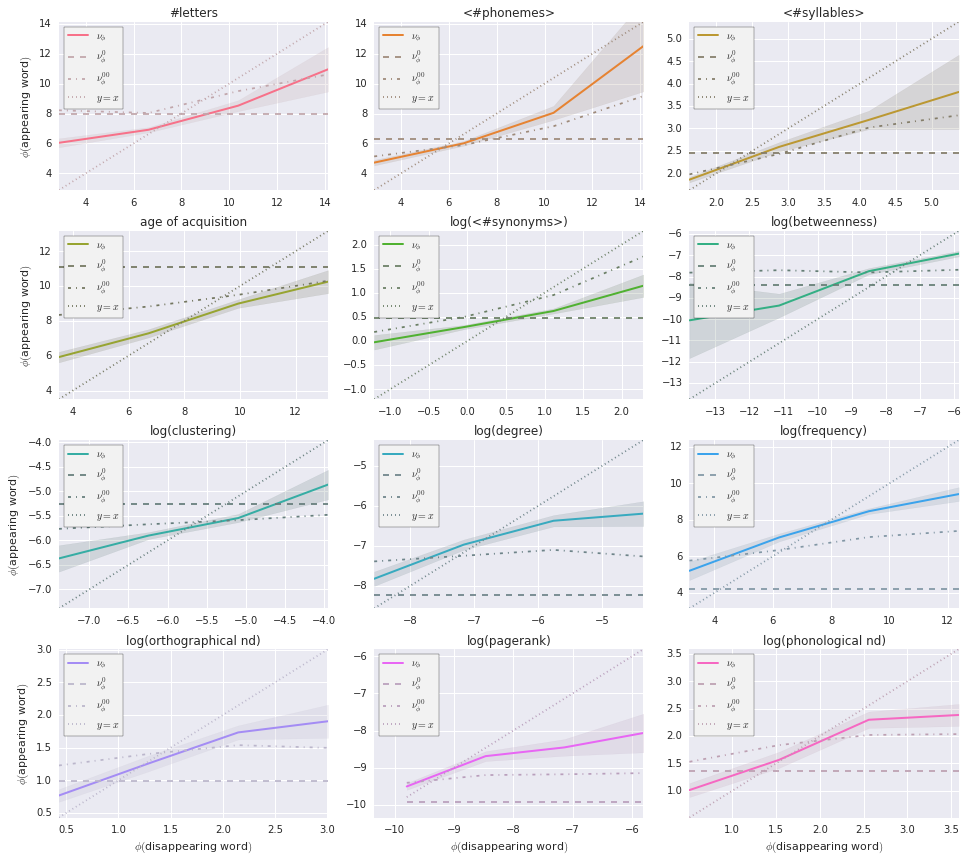

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

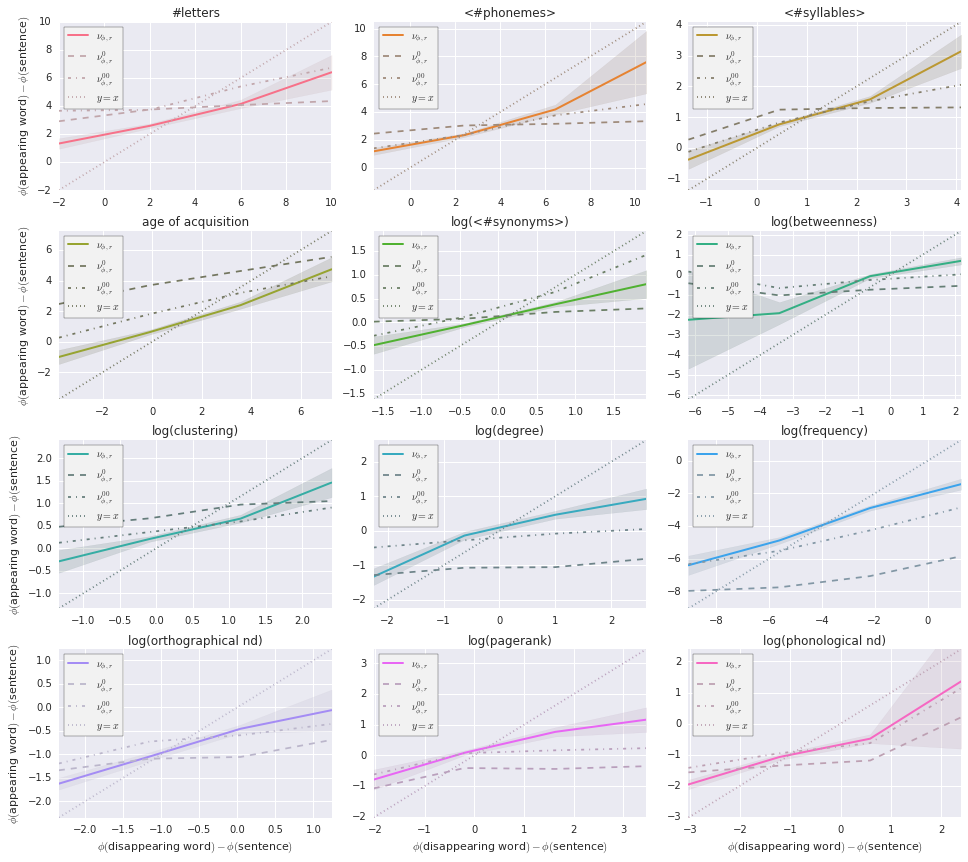

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

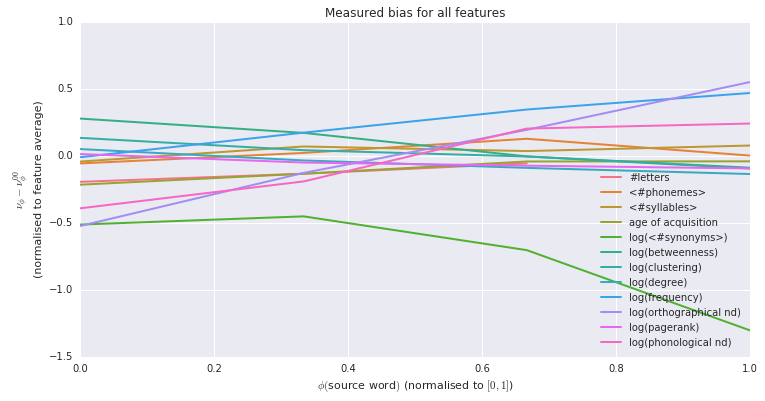

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

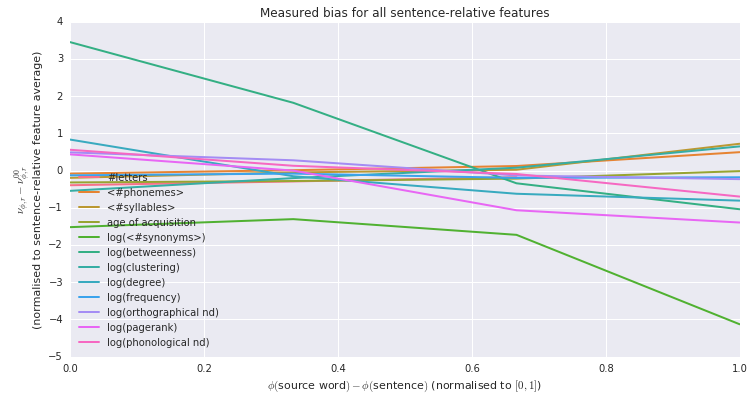

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

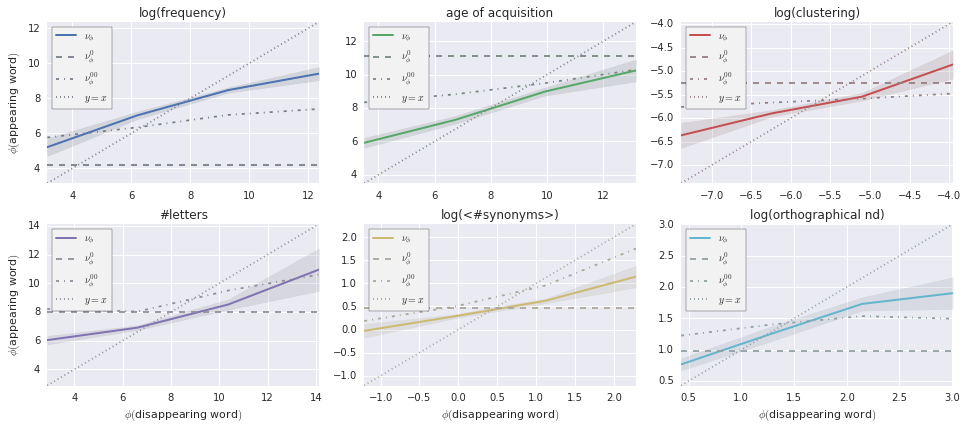

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

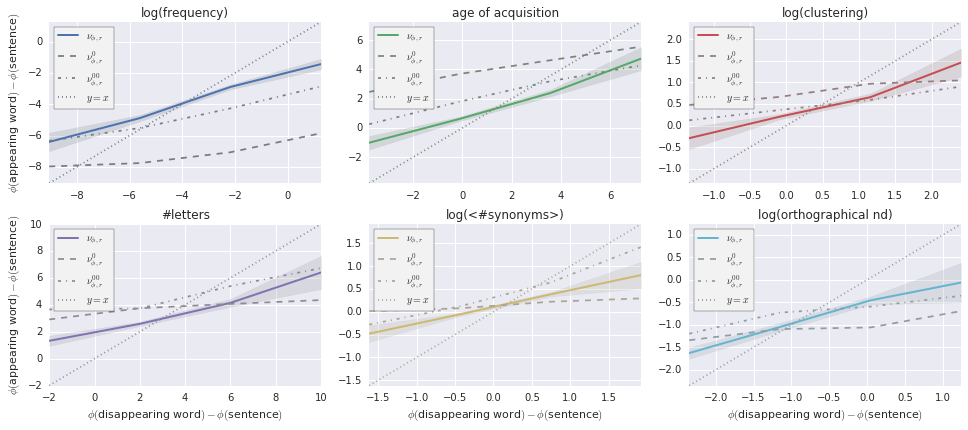

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

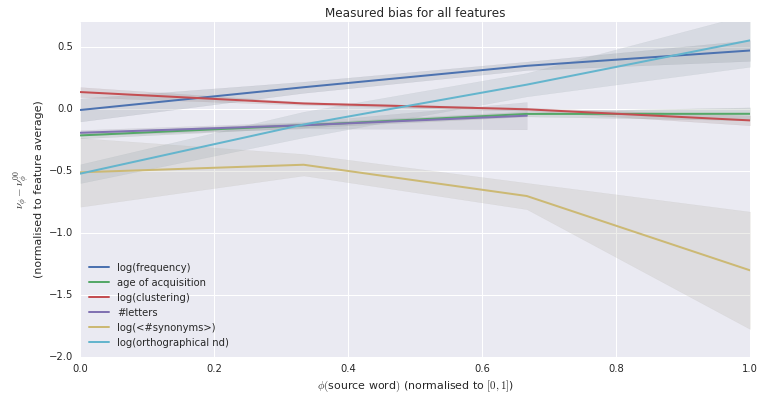

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

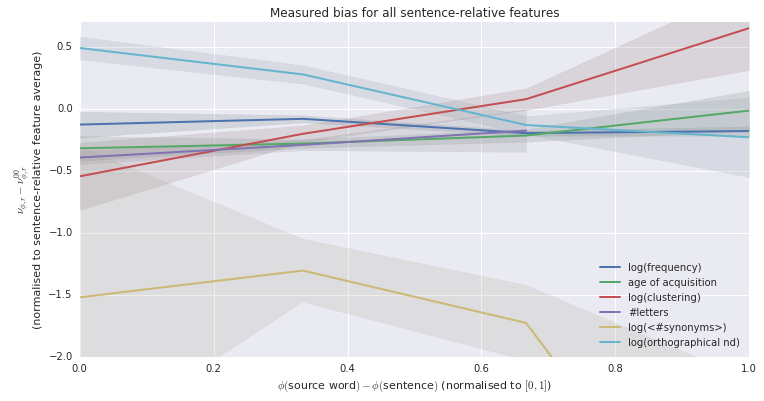

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


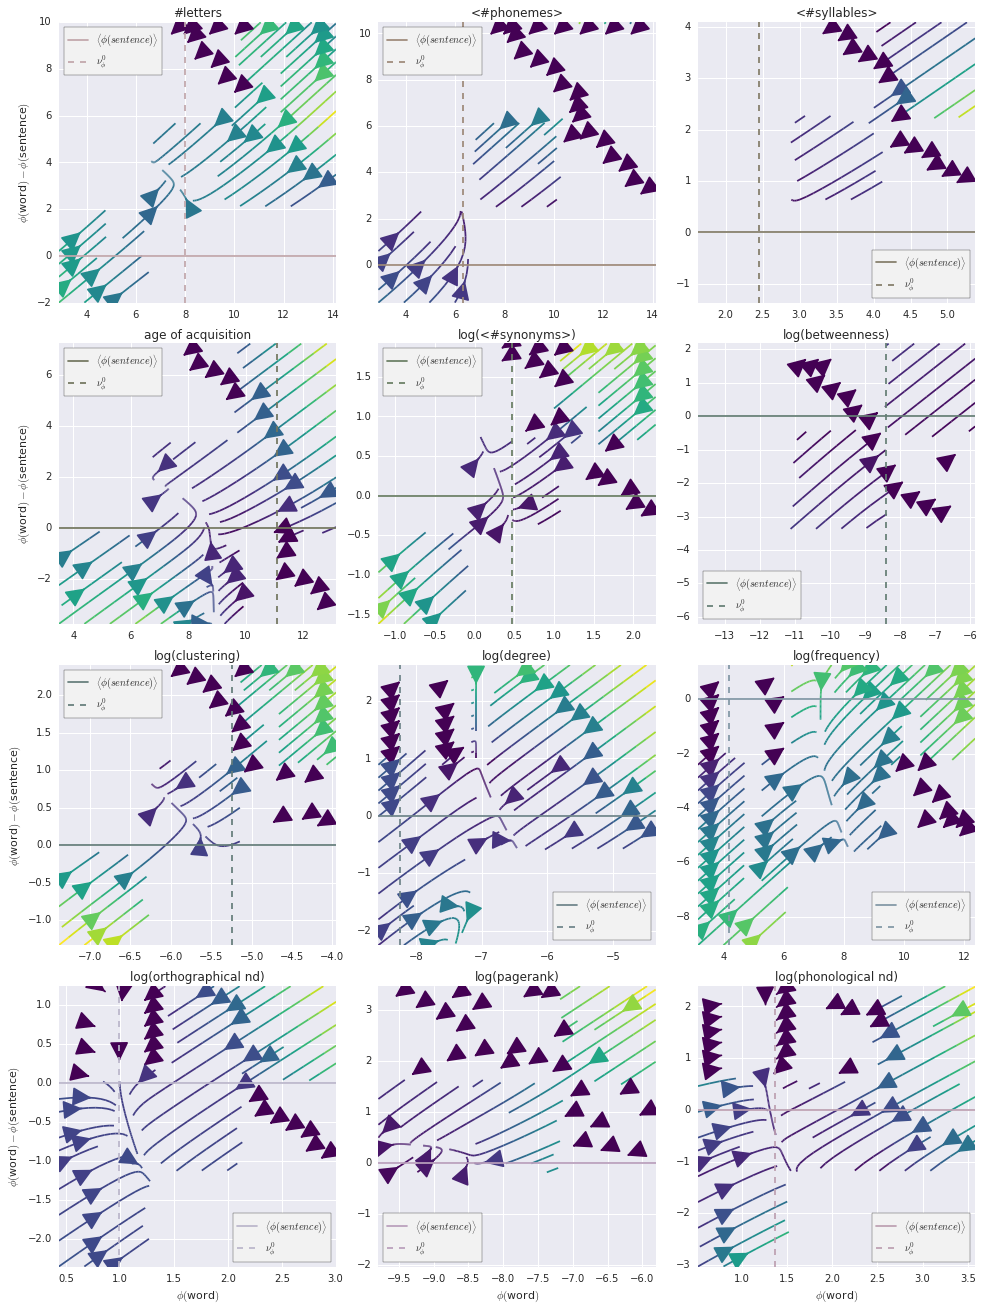

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


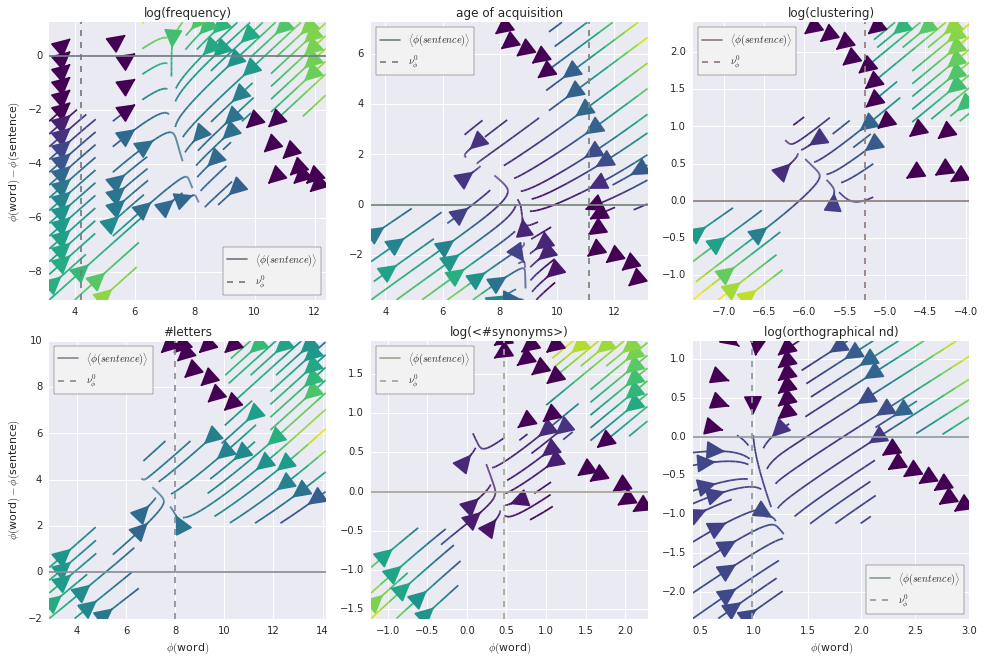

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.50698726  0.19425307  0.08273607  0.07724079  0.03510479  0.02631204
  0.02386173  0.01767014  0.01366418  0.01011507]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.533336,-0.215156,0.070221,-0.219877,-0.169691,0.441211,-0.204520,-0.238982,0.429688,-0.276563,0.179982,-0.008297
Component-1,0.417939,-0.370496,0.138988,-0.317411,-0.186745,-0.438708,0.145342,-0.289997,-0.421771,0.190742,-0.142507,0.029147
Component-2,0.367823,0.536326,-0.080540,0.232764,-0.667568,-0.059483,-0.006170,0.233426,-0.068718,0.061029,-0.057273,-0.030936


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 63446) |          | Elapsed Time: 0:00:45 ETA:  33 days, 18:22:17

  0% (   90 of 63446) |                    | Elapsed Time: 0:00:46 ETA:  0:11:11

  0% (  168 of 63446) |                    | Elapsed Time: 0:00:47 ETA:  0:11:57

  0% (  254 of 63446) |                    | Elapsed Time: 0:00:49 ETA:  0:11:48

  0% (  349 of 63446) |                    | Elapsed Time: 0:00:50 ETA:  0:11:24

  0% (  456 of 63446) |                    | Elapsed Time: 0:00:51 ETA:  0:10:51

  0% (  560 of 63446) |                    | Elapsed Time: 0:00:52 ETA:  0:10:33

  1% (  663 of 63446) |                    | Elapsed Time: 0:00:53 ETA:  0:10:22

  1% (  769 of 63446) |                    | Elapsed Time: 0:00:54 ETA:  0:10:11

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:54 ETA:  0:10:06

  1% (  882 of 63446) |                    | Elapsed Time: 0:00:55 ETA:  0:10:06

  1% (  998 of 63446) |                    | Elapsed Time: 0:00:56 ETA:  0:09:34

  1% ( 1111 of 63446) |                    | Elapsed Time: 0:00:57 ETA:  0:09:13

  1% ( 1199 of 63446) |                    | Elapsed Time: 0:00:58 ETA:  0:09:17

  2% ( 1304 of 63446) |                    | Elapsed Time: 0:00:59 ETA:  0:09:17

  2% ( 1400 of 63446) |                    | Elapsed Time: 0:01:00 ETA:  0:09:22

  2% ( 1503 of 63446) |                    | Elapsed Time: 0:01:01 ETA:  0:09:21

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:01:01 ETA:  0:09:07

  2% ( 1714 of 63446) |                    | Elapsed Time: 0:01:02 ETA:  0:08:52

  2% ( 1846 of 63446) |                    | Elapsed Time: 0:01:03 ETA:  0:08:24

  3% ( 1935 of 63446) |                    | Elapsed Time: 0:01:04 ETA:  0:08:40

  3% ( 1996 of 63446) |                    | Elapsed Time: 0:01:05 ETA:  0:09:14

  3% ( 2058 of 63446) |                    | Elapsed Time: 0:01:06 ETA:  0:09:33

  3% ( 2117 of 63446) |                    | Elapsed Time: 0:01:07 ETA:  0:10:08

  3% ( 2177 of 63446) |                    | Elapsed Time: 0:01:08 ETA:  0:10:39

  3% ( 2236 of 63446) |                    | Elapsed Time: 0:01:09 ETA:  0:11:21

  3% ( 2303 of 63446) |                    | Elapsed Time: 0:01:10 ETA:  0:12:12

  3% ( 2359 of 63446) |                    | Elapsed Time: 0:01:11 ETA:  0:13:40

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:01:12 ETA:  0:15:24

  3% ( 2464 of 63446) |                    | Elapsed Time: 0:01:13 ETA:  0:15:32

  4% ( 2553 of 63446) |                    | Elapsed Time: 0:01:14 ETA:  0:14:40

  4% ( 2638 of 63446) |                    | Elapsed Time: 0:01:15 ETA:  0:14:00

  4% ( 2733 of 63446) |                    | Elapsed Time: 0:01:16 ETA:  0:13:06

  4% ( 2829 of 63446) |                    | Elapsed Time: 0:01:17 ETA:  0:12:17

  4% ( 2931 of 63446) |                    | Elapsed Time: 0:01:18 ETA:  0:11:25

  4% ( 3026 of 63446) |                    | Elapsed Time: 0:01:19 ETA:  0:10:55

  4% ( 3128 of 63446) |                    | Elapsed Time: 0:01:20 ETA:  0:10:09

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:01:20 ETA:  0:09:57

  5% ( 3281 of 63446) |#                   | Elapsed Time: 0:01:21 ETA:  0:09:36

  5% ( 3394 of 63446) |#                   | Elapsed Time: 0:01:22 ETA:  0:09:16

  5% ( 3514 of 63446) |#                   | Elapsed Time: 0:01:23 ETA:  0:08:49

  5% ( 3657 of 63446) |#                   | Elapsed Time: 0:01:24 ETA:  0:08:16

  6% ( 3815 of 63446) |#                   | Elapsed Time: 0:01:25 ETA:  0:07:38

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:01:26 ETA:  0:06:56

  6% ( 4119 of 63446) |#                   | Elapsed Time: 0:01:27 ETA:  0:06:29

  6% ( 4264 of 63446) |#                   | Elapsed Time: 0:01:28 ETA:  0:06:18

  6% ( 4410 of 63446) |#                   | Elapsed Time: 0:01:29 ETA:  0:06:01

  7% ( 4560 of 63446) |#                   | Elapsed Time: 0:01:30 ETA:  0:05:46

  7% ( 4716 of 63446) |#                   | Elapsed Time: 0:01:31 ETA:  0:05:31

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:01:32 ETA:  0:05:28

  7% ( 4888 of 63446) |#                   | Elapsed Time: 0:01:33 ETA:  0:05:38

  7% ( 5013 of 63446) |#                   | Elapsed Time: 0:01:34 ETA:  0:05:48

  8% ( 5138 of 63446) |#                   | Elapsed Time: 0:01:35 ETA:  0:05:54

  8% ( 5261 of 63446) |#                   | Elapsed Time: 0:01:36 ETA:  0:06:04

  8% ( 5390 of 63446) |#                   | Elapsed Time: 0:01:37 ETA:  0:06:10

  8% ( 5523 of 63446) |#                   | Elapsed Time: 0:01:38 ETA:  0:06:15

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:01:38 ETA:  0:06:22

  8% ( 5686 of 63446) |#                   | Elapsed Time: 0:01:39 ETA:  0:06:32

  9% ( 5820 of 63446) |#                   | Elapsed Time: 0:01:40 ETA:  0:06:33

  9% ( 5939 of 63446) |#                   | Elapsed Time: 0:01:41 ETA:  0:06:37

  9% ( 6034 of 63446) |#                   | Elapsed Time: 0:01:42 ETA:  0:06:50

  9% ( 6119 of 63446) |#                   | Elapsed Time: 0:01:43 ETA:  0:07:10

  9% ( 6171 of 63446) |#                   | Elapsed Time: 0:01:44 ETA:  0:07:51

  9% ( 6287 of 63446) |#                   | Elapsed Time: 0:01:45 ETA:  0:07:58

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:45 ETA:  0:08:13

 10% ( 6465 of 63446) |##                  | Elapsed Time: 0:01:46 ETA:  0:08:06

 10% ( 6592 of 63446) |##                  | Elapsed Time: 0:01:47 ETA:  0:08:10

 10% ( 6721 of 63446) |##                  | Elapsed Time: 0:01:48 ETA:  0:08:12

 10% ( 6790 of 63446) |##                  | Elapsed Time: 0:01:49 ETA:  0:08:47

 10% ( 6853 of 63446) |##                  | Elapsed Time: 0:01:50 ETA:  0:09:11

 10% ( 6916 of 63446) |##                  | Elapsed Time: 0:01:51 ETA:  0:09:28

 10% ( 6979 of 63446) |##                  | Elapsed Time: 0:01:52 ETA:  0:09:18

 11% ( 7038 of 63446) |##                  | Elapsed Time: 0:01:53 ETA:  0:10:08

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:01:54 ETA:  0:10:47

 11% ( 7273 of 63446) |##                  | Elapsed Time: 0:01:55 ETA:  0:10:38

 11% ( 7362 of 63446) |##                  | Elapsed Time: 0:01:56 ETA:  0:11:25

 11% ( 7453 of 63446) |##                  | Elapsed Time: 0:01:57 ETA:  0:10:56

 11% ( 7564 of 63446) |##                  | Elapsed Time: 0:01:58 ETA:  0:10:03

 12% ( 7702 of 63446) |##                  | Elapsed Time: 0:01:59 ETA:  0:08:52

 12% ( 7825 of 63446) |##                  | Elapsed Time: 0:02:00 ETA:  0:08:06

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:02:01 ETA:  0:07:33

 12% ( 8037 of 63446) |##                  | Elapsed Time: 0:02:02 ETA:  0:07:25

 12% ( 8108 of 63446) |##                  | Elapsed Time: 0:02:04 ETA:  0:07:48

 12% ( 8191 of 63446) |##                  | Elapsed Time: 0:02:05 ETA:  0:08:20

 13% ( 8272 of 63446) |##                  | Elapsed Time: 0:02:06 ETA:  0:08:24

 13% ( 8363 of 63446) |##                  | Elapsed Time: 0:02:07 ETA:  0:08:23

 13% ( 8459 of 63446) |##                  | Elapsed Time: 0:02:08 ETA:  0:08:33

 13% ( 8547 of 63446) |##                  | Elapsed Time: 0:02:09 ETA:  0:09:10

 13% ( 8639 of 63446) |##                  | Elapsed Time: 0:02:10 ETA:  0:09:35

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:02:10 ETA:  0:09:40

 13% ( 8828 of 63446) |##                  | Elapsed Time: 0:02:11 ETA:  0:09:42

 14% ( 8926 of 63446) |##                  | Elapsed Time: 0:02:12 ETA:  0:09:18

 14% ( 9017 of 63446) |##                  | Elapsed Time: 0:02:13 ETA:  0:09:09

 14% ( 9108 of 63446) |##                  | Elapsed Time: 0:02:14 ETA:  0:09:01

 14% ( 9195 of 63446) |##                  | Elapsed Time: 0:02:15 ETA:  0:09:04

 14% ( 9294 of 63446) |##                  | Elapsed Time: 0:02:16 ETA:  0:09:01

 14% ( 9394 of 63446) |##                  | Elapsed Time: 0:02:17 ETA:  0:08:50

 14% ( 9489 of 63446) |##                  | Elapsed Time: 0:02:18 ETA:  0:08:47

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:02:19 ETA:  0:08:49

 15% ( 9613 of 63446) |###                 | Elapsed Time: 0:02:20 ETA:  0:08:55

 15% ( 9708 of 63446) |###                 | Elapsed Time: 0:02:21 ETA:  0:08:55

 15% ( 9807 of 63446) |###                 | Elapsed Time: 0:02:22 ETA:  0:08:48

 15% ( 9910 of 63446) |###                 | Elapsed Time: 0:02:23 ETA:  0:08:36

 15% (10007 of 63446) |###                 | Elapsed Time: 0:02:24 ETA:  0:08:26

 15% (10104 of 63446) |###                 | Elapsed Time: 0:02:25 ETA:  0:08:26

 16% (10200 of 63446) |###                 | Elapsed Time: 0:02:26 ETA:  0:08:28

 16% (10310 of 63446) |###                 | Elapsed Time: 0:02:27 ETA:  0:08:11

 16% (10423 of 63446) |###                 | Elapsed Time: 0:02:28 ETA:  0:08:01

 16% (10538 of 63446) |###                 | Elapsed Time: 0:02:29 ETA:  0:07:48

 16% (10652 of 63446) |###                 | Elapsed Time: 0:02:30 ETA:  0:07:35

 16% (10769 of 63446) |###                 | Elapsed Time: 0:02:31 ETA:  0:07:23

 17% (10876 of 63446) |###                 | Elapsed Time: 0:02:32 ETA:  0:07:20

 17% (10987 of 63446) |###                 | Elapsed Time: 0:02:33 ETA:  0:07:17

 17% (11104 of 63446) |###                 | Elapsed Time: 0:02:34 ETA:  0:07:02

 17% (11226 of 63446) |###                 | Elapsed Time: 0:02:35 ETA:  0:06:47

 17% (11320 of 63446) |###                 | Elapsed Time: 0:02:36 ETA:  0:06:58

 17% (11405 of 63446) |###                 | Elapsed Time: 0:02:37 ETA:  0:07:13

 18% (11497 of 63446) |###                 | Elapsed Time: 0:02:38 ETA:  0:07:24

 18% (11594 of 63446) |###                 | Elapsed Time: 0:02:39 ETA:  0:07:35

 18% (11693 of 63446) |###                 | Elapsed Time: 0:02:40 ETA:  0:07:45

 18% (11799 of 63446) |###                 | Elapsed Time: 0:02:41 ETA:  0:07:44

 18% (11897 of 63446) |###                 | Elapsed Time: 0:02:42 ETA:  0:07:44

 18% (11995 of 63446) |###                 | Elapsed Time: 0:02:43 ETA:  0:07:59

 19% (12104 of 63446) |###                 | Elapsed Time: 0:02:44 ETA:  0:08:07

 19% (12223 of 63446) |###                 | Elapsed Time: 0:02:45 ETA:  0:07:49

 19% (12325 of 63446) |###                 | Elapsed Time: 0:02:46 ETA:  0:07:36

 19% (12426 of 63446) |###                 | Elapsed Time: 0:02:47 ETA:  0:07:29

 19% (12534 of 63446) |###                 | Elapsed Time: 0:02:48 ETA:  0:07:21

 19% (12634 of 63446) |###                 | Elapsed Time: 0:02:49 ETA:  0:07:19

 20% (12690 of 63446) |####                | Elapsed Time: 0:02:49 ETA:  0:07:20

 20% (12798 of 63446) |####                | Elapsed Time: 0:02:50 ETA:  0:07:14

 20% (12913 of 63446) |####                | Elapsed Time: 0:02:51 ETA:  0:07:01

 20% (13033 of 63446) |####                | Elapsed Time: 0:02:52 ETA:  0:06:53

 20% (13141 of 63446) |####                | Elapsed Time: 0:02:53 ETA:  0:06:59

 20% (13255 of 63446) |####                | Elapsed Time: 0:02:54 ETA:  0:06:50

 21% (13375 of 63446) |####                | Elapsed Time: 0:02:56 ETA:  0:06:37

 21% (13483 of 63446) |####                | Elapsed Time: 0:02:56 ETA:  0:06:33

 21% (13602 of 63446) |####                | Elapsed Time: 0:02:57 ETA:  0:06:21

 21% (13717 of 63446) |####                | Elapsed Time: 0:02:58 ETA:  0:06:16

 21% (13818 of 63446) |####                | Elapsed Time: 0:02:59 ETA:  0:06:19

 21% (13926 of 63446) |####                | Elapsed Time: 0:03:00 ETA:  0:06:22

 22% (14041 of 63446) |####                | Elapsed Time: 0:03:01 ETA:  0:06:24

 22% (14160 of 63446) |####                | Elapsed Time: 0:03:02 ETA:  0:06:17

 22% (14276 of 63446) |####                | Elapsed Time: 0:03:03 ETA:  0:06:14

 22% (14397 of 63446) |####                | Elapsed Time: 0:03:04 ETA:  0:06:13

 22% (14526 of 63446) |####                | Elapsed Time: 0:03:05 ETA:  0:06:03

 23% (14611 of 63446) |####                | Elapsed Time: 0:03:07 ETA:  0:06:21

 23% (14760 of 63446) |####                | Elapsed Time: 0:03:08 ETA:  0:06:01

 23% (14886 of 63446) |####                | Elapsed Time: 0:03:09 ETA:  0:05:53

 23% (14978 of 63446) |####                | Elapsed Time: 0:03:10 ETA:  0:06:00

 23% (15041 of 63446) |####                | Elapsed Time: 0:03:11 ETA:  0:06:27

 23% (15069 of 63446) |####                | Elapsed Time: 0:03:11 ETA:  0:06:43

 23% (15149 of 63446) |####                | Elapsed Time: 0:03:12 ETA:  0:07:07

 24% (15228 of 63446) |####                | Elapsed Time: 0:03:13 ETA:  0:07:37

 24% (15358 of 63446) |####                | Elapsed Time: 0:03:14 ETA:  0:07:36

 24% (15477 of 63446) |####                | Elapsed Time: 0:03:15 ETA:  0:07:09

 24% (15600 of 63446) |####                | Elapsed Time: 0:03:16 ETA:  0:07:28

 24% (15728 of 63446) |####                | Elapsed Time: 0:03:17 ETA:  0:07:17

 24% (15738 of 63446) |####                | Elapsed Time: 0:03:28 ETA:  0:22:01

 25% (15862 of 63446) |#####               | Elapsed Time: 0:03:29 ETA:  0:20:28

 25% (15978 of 63446) |#####               | Elapsed Time: 0:03:30 ETA:  0:19:24

 25% (16099 of 63446) |#####               | Elapsed Time: 0:03:31 ETA:  0:18:17

 25% (16216 of 63446) |#####               | Elapsed Time: 0:03:32 ETA:  0:18:36

 25% (16333 of 63446) |#####               | Elapsed Time: 0:03:33 ETA:  0:18:39

 25% (16397 of 63446) |#####               | Elapsed Time: 0:03:34 ETA:  0:20:16

 25% (16485 of 63446) |#####               | Elapsed Time: 0:03:35 ETA:  0:21:31

 26% (16570 of 63446) |#####               | Elapsed Time: 0:03:36 ETA:  0:06:40

 26% (16655 of 63446) |#####               | Elapsed Time: 0:03:37 ETA:  0:07:05

 26% (16732 of 63446) |#####               | Elapsed Time: 0:03:38 ETA:  0:07:21

 26% (16829 of 63446) |#####               | Elapsed Time: 0:03:39 ETA:  0:07:35

 26% (16943 of 63446) |#####               | Elapsed Time: 0:03:40 ETA:  0:07:40

 26% (17049 of 63446) |#####               | Elapsed Time: 0:03:41 ETA:  0:07:56

 27% (17140 of 63446) |#####               | Elapsed Time: 0:03:42 ETA:  0:08:18

 27% (17243 of 63446) |#####               | Elapsed Time: 0:03:43 ETA:  0:07:45

 27% (17336 of 63446) |#####               | Elapsed Time: 0:03:44 ETA:  0:07:40

 27% (17448 of 63446) |#####               | Elapsed Time: 0:03:45 ETA:  0:07:11

 27% (17557 of 63446) |#####               | Elapsed Time: 0:03:46 ETA:  0:06:45

 27% (17655 of 63446) |#####               | Elapsed Time: 0:03:47 ETA:  0:06:43

 27% (17756 of 63446) |#####               | Elapsed Time: 0:03:48 ETA:  0:06:52

 28% (17852 of 63446) |#####               | Elapsed Time: 0:03:49 ETA:  0:06:49

 28% (17951 of 63446) |#####               | Elapsed Time: 0:03:50 ETA:  0:06:42

 28% (18047 of 63446) |#####               | Elapsed Time: 0:03:51 ETA:  0:06:46

 28% (18154 of 63446) |#####               | Elapsed Time: 0:03:52 ETA:  0:06:33

 28% (18241 of 63446) |#####               | Elapsed Time: 0:03:53 ETA:  0:06:43

 28% (18353 of 63446) |#####               | Elapsed Time: 0:03:54 ETA:  0:06:34

 29% (18456 of 63446) |#####               | Elapsed Time: 0:03:55 ETA:  0:06:38

 29% (18542 of 63446) |#####               | Elapsed Time: 0:03:56 ETA:  0:06:45

 29% (18635 of 63446) |#####               | Elapsed Time: 0:03:57 ETA:  0:06:49

 29% (18752 of 63446) |#####               | Elapsed Time: 0:03:58 ETA:  0:06:34

 29% (18874 of 63446) |#####               | Elapsed Time: 0:03:59 ETA:  0:06:17

 29% (18998 of 63446) |#####               | Elapsed Time: 0:04:00 ETA:  0:05:57

 30% (19034 of 63446) |######              | Elapsed Time: 0:04:01 ETA:  0:05:52

 30% (19157 of 63446) |######              | Elapsed Time: 0:04:02 ETA:  0:05:34

 30% (19287 of 63446) |######              | Elapsed Time: 0:04:03 ETA:  0:05:20

 30% (19415 of 63446) |######              | Elapsed Time: 0:04:04 ETA:  0:05:04

 30% (19520 of 63446) |######              | Elapsed Time: 0:04:05 ETA:  0:04:53

 30% (19659 of 63446) |######              | Elapsed Time: 0:04:06 ETA:  0:04:28

 31% (19730 of 63446) |######              | Elapsed Time: 0:04:07 ETA:  0:04:51

 31% (19827 of 63446) |######              | Elapsed Time: 0:04:07 ETA:  0:04:57

 31% (19932 of 63446) |######              | Elapsed Time: 0:04:08 ETA:  0:05:08

 31% (20048 of 63446) |######              | Elapsed Time: 0:04:09 ETA:  0:05:08

 31% (20167 of 63446) |######              | Elapsed Time: 0:04:10 ETA:  0:05:10

 31% (20275 of 63446) |######              | Elapsed Time: 0:04:11 ETA:  0:05:22

 32% (20391 of 63446) |######              | Elapsed Time: 0:04:12 ETA:  0:05:28

 32% (20485 of 63446) |######              | Elapsed Time: 0:04:13 ETA:  0:05:33

 32% (20620 of 63446) |######              | Elapsed Time: 0:04:15 ETA:  0:05:23

 32% (20733 of 63446) |######              | Elapsed Time: 0:04:16 ETA:  0:05:18

 32% (20848 of 63446) |######              | Elapsed Time: 0:04:17 ETA:  0:05:11

 33% (20952 of 63446) |######              | Elapsed Time: 0:04:18 ETA:  0:05:18

 33% (21047 of 63446) |######              | Elapsed Time: 0:04:19 ETA:  0:05:32

 33% (21149 of 63446) |######              | Elapsed Time: 0:04:20 ETA:  0:05:35

 33% (21274 of 63446) |######              | Elapsed Time: 0:04:21 ETA:  0:05:28

 33% (21387 of 63446) |######              | Elapsed Time: 0:04:22 ETA:  0:05:15

 33% (21414 of 63446) |######              | Elapsed Time: 0:04:22 ETA:  0:05:15

 33% (21508 of 63446) |######              | Elapsed Time: 0:04:23 ETA:  0:05:26

 34% (21588 of 63446) |######              | Elapsed Time: 0:04:24 ETA:  0:05:49

 34% (21681 of 63446) |######              | Elapsed Time: 0:04:25 ETA:  0:06:04

 34% (21773 of 63446) |######              | Elapsed Time: 0:04:26 ETA:  0:06:12

 34% (21849 of 63446) |######              | Elapsed Time: 0:04:27 ETA:  0:06:27

 34% (21938 of 63446) |######              | Elapsed Time: 0:04:28 ETA:  0:06:36

 34% (22080 of 63446) |######              | Elapsed Time: 0:04:29 ETA:  0:06:22

 34% (22175 of 63446) |######              | Elapsed Time: 0:04:30 ETA:  0:06:36

 35% (22207 of 63446) |#######             | Elapsed Time: 0:04:30 ETA:  0:06:34

 35% (22328 of 63446) |#######             | Elapsed Time: 0:04:31 ETA:  0:06:11

 35% (22465 of 63446) |#######             | Elapsed Time: 0:04:32 ETA:  0:05:28

 35% (22595 of 63446) |#######             | Elapsed Time: 0:04:33 ETA:  0:05:03

 35% (22685 of 63446) |#######             | Elapsed Time: 0:04:34 ETA:  0:05:03

 35% (22773 of 63446) |#######             | Elapsed Time: 0:04:35 ETA:  0:04:54

 36% (22863 of 63446) |#######             | Elapsed Time: 0:04:36 ETA:  0:04:53

 36% (22953 of 63446) |#######             | Elapsed Time: 0:04:37 ETA:  0:05:25

 36% (23000 of 63446) |#######             | Elapsed Time: 0:04:38 ETA:  0:05:20

 36% (23143 of 63446) |#######             | Elapsed Time: 0:04:39 ETA:  0:04:58

 36% (23259 of 63446) |#######             | Elapsed Time: 0:04:40 ETA:  0:05:01

 36% (23318 of 63446) |#######             | Elapsed Time: 0:04:41 ETA:  0:05:53

 36% (23414 of 63446) |#######             | Elapsed Time: 0:04:42 ETA:  0:06:18

 37% (23560 of 63446) |#######             | Elapsed Time: 0:04:43 ETA:  0:05:35

 37% (23667 of 63446) |#######             | Elapsed Time: 0:04:44 ETA:  0:05:21

 37% (23761 of 63446) |#######             | Elapsed Time: 0:04:45 ETA:  0:05:17

 37% (23793 of 63446) |#######             | Elapsed Time: 0:04:45 ETA:  0:05:08

 37% (23897 of 63446) |#######             | Elapsed Time: 0:04:46 ETA:  0:05:07

 37% (24007 of 63446) |#######             | Elapsed Time: 0:04:47 ETA:  0:05:29

 38% (24129 of 63446) |#######             | Elapsed Time: 0:04:48 ETA:  0:05:23

 38% (24236 of 63446) |#######             | Elapsed Time: 0:04:49 ETA:  0:04:50

 38% (24346 of 63446) |#######             | Elapsed Time: 0:04:50 ETA:  0:04:40

 38% (24455 of 63446) |#######             | Elapsed Time: 0:04:51 ETA:  0:05:03

 38% (24549 of 63446) |#######             | Elapsed Time: 0:04:52 ETA:  0:05:10

 38% (24586 of 63446) |#######             | Elapsed Time: 0:04:52 ETA:  0:04:58

 38% (24691 of 63446) |#######             | Elapsed Time: 0:04:53 ETA:  0:04:56

 39% (24798 of 63446) |#######             | Elapsed Time: 0:04:55 ETA:  0:04:52

 39% (24890 of 63446) |#######             | Elapsed Time: 0:04:56 ETA:  0:05:03

 39% (25014 of 63446) |#######             | Elapsed Time: 0:04:57 ETA:  0:05:01

 39% (25126 of 63446) |#######             | Elapsed Time: 0:04:58 ETA:  0:04:56

 39% (25251 of 63446) |#######             | Elapsed Time: 0:04:59 ETA:  0:04:45

 40% (25379 of 63446) |########            | Elapsed Time: 0:04:59 ETA:  0:04:28

 40% (25518 of 63446) |########            | Elapsed Time: 0:05:00 ETA:  0:04:01

 40% (25647 of 63446) |########            | Elapsed Time: 0:05:01 ETA:  0:03:55

 40% (25762 of 63446) |########            | Elapsed Time: 0:05:02 ETA:  0:03:49

 40% (25902 of 63446) |########            | Elapsed Time: 0:05:03 ETA:  0:03:32

 41% (26029 of 63446) |########            | Elapsed Time: 0:05:04 ETA:  0:03:15

 41% (26133 of 63446) |########            | Elapsed Time: 0:05:05 ETA:  0:03:23

 41% (26172 of 63446) |########            | Elapsed Time: 0:05:06 ETA:  0:03:23

 41% (26274 of 63446) |########            | Elapsed Time: 0:05:07 ETA:  0:03:34

 41% (26371 of 63446) |########            | Elapsed Time: 0:05:08 ETA:  0:03:52

 41% (26508 of 63446) |########            | Elapsed Time: 0:05:09 ETA:  0:03:53

 41% (26642 of 63446) |########            | Elapsed Time: 0:05:10 ETA:  0:03:49

 42% (26764 of 63446) |########            | Elapsed Time: 0:05:11 ETA:  0:03:44

 42% (26889 of 63446) |########            | Elapsed Time: 0:05:12 ETA:  0:03:51

 42% (26965 of 63446) |########            | Elapsed Time: 0:05:13 ETA:  0:04:03

 42% (27077 of 63446) |########            | Elapsed Time: 0:05:14 ETA:  0:03:57

 42% (27195 of 63446) |########            | Elapsed Time: 0:05:15 ETA:  0:03:49

 43% (27302 of 63446) |########            | Elapsed Time: 0:05:16 ETA:  0:03:46

 43% (27392 of 63446) |########            | Elapsed Time: 0:05:17 ETA:  0:03:48

 43% (27502 of 63446) |########            | Elapsed Time: 0:05:18 ETA:  0:04:02

 43% (27631 of 63446) |########            | Elapsed Time: 0:05:19 ETA:  0:04:04

 43% (27758 of 63446) |########            | Elapsed Time: 0:05:20 ETA:  0:03:58

 43% (27878 of 63446) |########            | Elapsed Time: 0:05:21 ETA:  0:04:00

 44% (27987 of 63446) |########            | Elapsed Time: 0:05:22 ETA:  0:03:56

 44% (28104 of 63446) |########            | Elapsed Time: 0:05:23 ETA:  0:03:53

 44% (28234 of 63446) |########            | Elapsed Time: 0:05:24 ETA:  0:03:45

 44% (28368 of 63446) |########            | Elapsed Time: 0:05:25 ETA:  0:03:30

 44% (28499 of 63446) |########            | Elapsed Time: 0:05:26 ETA:  0:03:10

 45% (28551 of 63446) |#########           | Elapsed Time: 0:05:26 ETA:  0:03:02

 45% (28687 of 63446) |#########           | Elapsed Time: 0:05:27 ETA:  0:02:58

 45% (28801 of 63446) |#########           | Elapsed Time: 0:05:28 ETA:  0:03:06

 45% (28917 of 63446) |#########           | Elapsed Time: 0:05:29 ETA:  0:03:07

 45% (29044 of 63446) |#########           | Elapsed Time: 0:05:30 ETA:  0:02:57

 45% (29184 of 63446) |#########           | Elapsed Time: 0:05:31 ETA:  0:02:45

 46% (29285 of 63446) |#########           | Elapsed Time: 0:05:32 ETA:  0:02:58

 46% (29344 of 63446) |#########           | Elapsed Time: 0:05:33 ETA:  0:03:10

 46% (29441 of 63446) |#########           | Elapsed Time: 0:05:34 ETA:  0:03:27

 46% (29578 of 63446) |#########           | Elapsed Time: 0:05:35 ETA:  0:03:18

 46% (29682 of 63446) |#########           | Elapsed Time: 0:05:36 ETA:  0:03:34

 46% (29763 of 63446) |#########           | Elapsed Time: 0:05:37 ETA:  0:03:51

 47% (29881 of 63446) |#########           | Elapsed Time: 0:05:38 ETA:  0:03:49

 47% (30003 of 63446) |#########           | Elapsed Time: 0:05:39 ETA:  0:03:51

 47% (30137 of 63446) |#########           | Elapsed Time: 0:05:40 ETA:  0:03:56

 47% (30248 of 63446) |#########           | Elapsed Time: 0:05:41 ETA:  0:03:51

 47% (30384 of 63446) |#########           | Elapsed Time: 0:05:42 ETA:  0:03:26

 48% (30466 of 63446) |#########           | Elapsed Time: 0:05:43 ETA:  0:03:59

 48% (30564 of 63446) |#########           | Elapsed Time: 0:05:44 ETA:  0:04:01

 48% (30636 of 63446) |#########           | Elapsed Time: 0:05:45 ETA:  0:04:07

 48% (30746 of 63446) |#########           | Elapsed Time: 0:05:46 ETA:  0:04:11

 48% (30848 of 63446) |#########           | Elapsed Time: 0:05:47 ETA:  0:04:24

 48% (30930 of 63446) |#########           | Elapsed Time: 0:05:48 ETA:  0:04:30

 48% (31044 of 63446) |#########           | Elapsed Time: 0:05:49 ETA:  0:04:23

 49% (31161 of 63446) |#########           | Elapsed Time: 0:05:50 ETA:  0:04:18

 49% (31278 of 63446) |#########           | Elapsed Time: 0:05:51 ETA:  0:04:30

 49% (31403 of 63446) |#########           | Elapsed Time: 0:05:52 ETA:  0:04:01

 49% (31496 of 63446) |#########           | Elapsed Time: 0:05:53 ETA:  0:04:04

 49% (31614 of 63446) |#########           | Elapsed Time: 0:05:54 ETA:  0:03:35

 50% (31724 of 63446) |##########          | Elapsed Time: 0:05:55 ETA:  0:03:25

 50% (31851 of 63446) |##########          | Elapsed Time: 0:05:56 ETA:  0:03:11

 50% (31987 of 63446) |##########          | Elapsed Time: 0:05:57 ETA:  0:02:58

 50% (32107 of 63446) |##########          | Elapsed Time: 0:05:58 ETA:  0:02:54

 50% (32220 of 63446) |##########          | Elapsed Time: 0:05:59 ETA:  0:02:55

 50% (32328 of 63446) |##########          | Elapsed Time: 0:06:00 ETA:  0:02:58

 51% (32427 of 63446) |##########          | Elapsed Time: 0:06:01 ETA:  0:03:11

 51% (32517 of 63446) |##########          | Elapsed Time: 0:06:01 ETA:  0:02:47

 51% (32643 of 63446) |##########          | Elapsed Time: 0:06:02 ETA:  0:02:42

 51% (32761 of 63446) |##########          | Elapsed Time: 0:06:03 ETA:  0:02:44

 51% (32878 of 63446) |##########          | Elapsed Time: 0:06:04 ETA:  0:02:48

 52% (32995 of 63446) |##########          | Elapsed Time: 0:06:05 ETA:  0:02:57

 52% (33114 of 63446) |##########          | Elapsed Time: 0:06:06 ETA:  0:02:57

 52% (33252 of 63446) |##########          | Elapsed Time: 0:06:07 ETA:  0:02:43

 52% (33310 of 63446) |##########          | Elapsed Time: 0:06:08 ETA:  0:02:35

 52% (33446 of 63446) |##########          | Elapsed Time: 0:06:09 ETA:  0:02:15

 52% (33578 of 63446) |##########          | Elapsed Time: 0:06:10 ETA:  0:02:19

 53% (33706 of 63446) |##########          | Elapsed Time: 0:06:11 ETA:  0:02:17

 53% (33815 of 63446) |##########          | Elapsed Time: 0:06:12 ETA:  0:02:20

 53% (33920 of 63446) |##########          | Elapsed Time: 0:06:13 ETA:  0:02:25

 53% (34003 of 63446) |##########          | Elapsed Time: 0:06:14 ETA:  0:02:42

 53% (34103 of 63446) |##########          | Elapsed Time: 0:06:15 ETA:  0:02:44

 53% (34240 of 63446) |##########          | Elapsed Time: 0:06:16 ETA:  0:02:44

 54% (34364 of 63446) |##########          | Elapsed Time: 0:06:17 ETA:  0:02:41

 54% (34502 of 63446) |##########          | Elapsed Time: 0:06:18 ETA:  0:02:39

 54% (34655 of 63446) |##########          | Elapsed Time: 0:06:19 ETA:  0:02:27

 54% (34800 of 63446) |##########          | Elapsed Time: 0:06:20 ETA:  0:02:18

 55% (34896 of 63446) |###########         | Elapsed Time: 0:06:20 ETA:  0:02:11

 55% (35006 of 63446) |###########         | Elapsed Time: 0:06:21 ETA:  0:02:07

 55% (35070 of 63446) |###########         | Elapsed Time: 0:06:22 ETA:  0:02:16

 55% (35164 of 63446) |###########         | Elapsed Time: 0:06:23 ETA:  0:02:24

 55% (35272 of 63446) |###########         | Elapsed Time: 0:06:24 ETA:  0:02:38

 55% (35387 of 63446) |###########         | Elapsed Time: 0:06:26 ETA:  0:02:41

 55% (35507 of 63446) |###########         | Elapsed Time: 0:06:27 ETA:  0:02:50

 56% (35628 of 63446) |###########         | Elapsed Time: 0:06:28 ETA:  0:03:07

 56% (35689 of 63446) |###########         | Elapsed Time: 0:06:28 ETA:  0:03:30

 56% (35811 of 63446) |###########         | Elapsed Time: 0:06:29 ETA:  0:03:26

 56% (35964 of 63446) |###########         | Elapsed Time: 0:06:30 ETA:  0:02:59

 56% (36092 of 63446) |###########         | Elapsed Time: 0:06:31 ETA:  0:02:22

 57% (36228 of 63446) |###########         | Elapsed Time: 0:06:32 ETA:  0:02:00

 57% (36353 of 63446) |###########         | Elapsed Time: 0:06:33 ETA:  0:01:51

 57% (36482 of 63446) |###########         | Elapsed Time: 0:06:34 ETA:  0:01:41

 57% (36620 of 63446) |###########         | Elapsed Time: 0:06:35 ETA:  0:01:32

 57% (36728 of 63446) |###########         | Elapsed Time: 0:06:36 ETA:  0:01:37

 58% (36836 of 63446) |###########         | Elapsed Time: 0:06:37 ETA:  0:01:40

 58% (36966 of 63446) |###########         | Elapsed Time: 0:06:38 ETA:  0:01:35

 58% (37064 of 63446) |###########         | Elapsed Time: 0:06:39 ETA:  0:01:59

 58% (37166 of 63446) |###########         | Elapsed Time: 0:06:40 ETA:  0:02:11

 58% (37275 of 63446) |###########         | Elapsed Time: 0:06:41 ETA:  0:02:22

 58% (37398 of 63446) |###########         | Elapsed Time: 0:06:42 ETA:  0:02:23

 59% (37521 of 63446) |###########         | Elapsed Time: 0:06:43 ETA:  0:02:33

 59% (37663 of 63446) |###########         | Elapsed Time: 0:06:44 ETA:  0:02:30

 59% (37810 of 63446) |###########         | Elapsed Time: 0:06:45 ETA:  0:02:09

 59% (37920 of 63446) |###########         | Elapsed Time: 0:06:46 ETA:  0:02:07

 59% (38019 of 63446) |###########         | Elapsed Time: 0:06:47 ETA:  0:02:22

 60% (38068 of 63446) |############        | Elapsed Time: 0:06:48 ETA:  0:02:05

 60% (38218 of 63446) |############        | Elapsed Time: 0:06:49 ETA:  0:01:39

 60% (38349 of 63446) |############        | Elapsed Time: 0:06:50 ETA:  0:01:29

 60% (38476 of 63446) |############        | Elapsed Time: 0:06:51 ETA:  0:01:25

 60% (38627 of 63446) |############        | Elapsed Time: 0:06:52 ETA:  0:01:06

 61% (38751 of 63446) |############        | Elapsed Time: 0:06:53 ETA:  0:01:13

 61% (38861 of 63446) |############        | Elapsed Time: 0:06:53 ETA:  0:01:22

 61% (38976 of 63446) |############        | Elapsed Time: 0:06:54 ETA:  0:01:18

 61% (39083 of 63446) |############        | Elapsed Time: 0:06:55 ETA:  0:01:14

 61% (39162 of 63446) |############        | Elapsed Time: 0:06:56 ETA:  0:01:40

 61% (39258 of 63446) |############        | Elapsed Time: 0:06:57 ETA:  0:02:06

 62% (39397 of 63446) |############        | Elapsed Time: 0:06:58 ETA:  0:02:01

 62% (39554 of 63446) |############        | Elapsed Time: 0:06:59 ETA:  0:01:45

 62% (39654 of 63446) |############        | Elapsed Time: 0:07:00 ETA:  0:02:02

 62% (39788 of 63446) |############        | Elapsed Time: 0:07:01 ETA:  0:01:56

 62% (39912 of 63446) |############        | Elapsed Time: 0:07:02 ETA:  0:01:55

 63% (40057 of 63446) |############        | Elapsed Time: 0:07:03 ETA:  0:01:39

 63% (40168 of 63446) |############        | Elapsed Time: 0:07:04 ETA:  0:01:36

 63% (40317 of 63446) |############        | Elapsed Time: 0:07:05 ETA:  0:01:03

 63% (40447 of 63446) |############        | Elapsed Time: 0:07:06 ETA:  0:00:46

 63% (40582 of 63446) |############        | Elapsed Time: 0:07:07 ETA:  0:00:47

 64% (40720 of 63446) |############        | Elapsed Time: 0:07:08 ETA:  0:00:53

 64% (40837 of 63446) |############        | Elapsed Time: 0:07:09 ETA:  0:00:52

 64% (40962 of 63446) |############        | Elapsed Time: 0:07:10 ETA:  0:00:54

 64% (41085 of 63446) |############        | Elapsed Time: 0:07:11 ETA:  0:00:54

 64% (41199 of 63446) |############        | Elapsed Time: 0:07:12 ETA:  0:01:06

 65% (41240 of 63446) |#############       | Elapsed Time: 0:07:13 ETA:  0:01:02

 65% (41352 of 63446) |#############       | Elapsed Time: 0:07:14 ETA:  0:01:19

 65% (41451 of 63446) |#############       | Elapsed Time: 0:07:15 ETA:  0:01:36

 65% (41570 of 63446) |#############       | Elapsed Time: 0:07:16 ETA:  0:01:44

 65% (41674 of 63446) |#############       | Elapsed Time: 0:07:17 ETA:  0:02:02

 65% (41775 of 63446) |#############       | Elapsed Time: 0:07:18 ETA:  0:02:11

 65% (41870 of 63446) |#############       | Elapsed Time: 0:07:19 ETA:  0:02:30

 66% (41971 of 63446) |#############       | Elapsed Time: 0:07:20 ETA:  0:02:44

 66% (42033 of 63446) |#############       | Elapsed Time: 0:07:20 ETA:  0:02:45

 66% (42161 of 63446) |#############       | Elapsed Time: 0:07:21 ETA:  0:02:30

 66% (42282 of 63446) |#############       | Elapsed Time: 0:07:22 ETA:  0:02:23

 66% (42400 of 63446) |#############       | Elapsed Time: 0:07:23 ETA:  0:02:10

 67% (42543 of 63446) |#############       | Elapsed Time: 0:07:24 ETA:  0:01:55

 67% (42663 of 63446) |#############       | Elapsed Time: 0:07:25 ETA:  0:01:44

 67% (42795 of 63446) |#############       | Elapsed Time: 0:07:26 ETA:  0:01:26

 67% (42827 of 63446) |#############       | Elapsed Time: 0:07:27 ETA:  0:01:08

 67% (42947 of 63446) |#############       | Elapsed Time: 0:07:28 ETA:  0:00:57

 67% (43015 of 63446) |#############       | Elapsed Time: 0:07:29 ETA:  0:01:23

 67% (43129 of 63446) |#############       | Elapsed Time: 0:07:30 ETA:  0:01:29

 68% (43251 of 63446) |#############       | Elapsed Time: 0:07:31 ETA:  0:01:28

 68% (43380 of 63446) |#############       | Elapsed Time: 0:07:32 ETA:  0:01:21

 68% (43498 of 63446) |#############       | Elapsed Time: 0:07:33 ETA:  0:01:33

 68% (43584 of 63446) |#############       | Elapsed Time: 0:07:34 ETA:  0:01:53

 68% (43620 of 63446) |#############       | Elapsed Time: 0:07:34 ETA:  0:02:06

 68% (43710 of 63446) |#############       | Elapsed Time: 0:07:35 ETA:  0:02:24

 69% (43805 of 63446) |#############       | Elapsed Time: 0:07:36 ETA:  0:02:41

 69% (43869 of 63446) |#############       | Elapsed Time: 0:07:37 ETA:  0:02:42

 69% (43981 of 63446) |#############       | Elapsed Time: 0:07:38 ETA:  0:02:43

 69% (44099 of 63446) |#############       | Elapsed Time: 0:07:39 ETA:  0:02:44

 69% (44221 of 63446) |#############       | Elapsed Time: 0:07:40 ETA:  0:02:48

 69% (44347 of 63446) |#############       | Elapsed Time: 0:07:41 ETA:  0:02:42

 70% (44413 of 63446) |##############      | Elapsed Time: 0:07:41 ETA:  0:02:25

 70% (44546 of 63446) |##############      | Elapsed Time: 0:07:42 ETA:  0:02:07

 70% (44676 of 63446) |##############      | Elapsed Time: 0:07:43 ETA:  0:01:41

 70% (44792 of 63446) |##############      | Elapsed Time: 0:07:44 ETA:  0:01:28

 70% (44909 of 63446) |##############      | Elapsed Time: 0:07:46 ETA:  0:00:59

 70% (45012 of 63446) |##############      | Elapsed Time: 0:07:47 ETA:  0:01:03

 71% (45123 of 63446) |##############      | Elapsed Time: 0:07:48 ETA:  0:01:06

 71% (45206 of 63446) |##############      | Elapsed Time: 0:07:48 ETA:  0:01:13

 71% (45319 of 63446) |##############      | Elapsed Time: 0:07:49 ETA:  0:01:20

 71% (45434 of 63446) |##############      | Elapsed Time: 0:07:50 ETA:  0:01:18

 71% (45591 of 63446) |##############      | Elapsed Time: 0:07:51 ETA:  0:01:04

 72% (45687 of 63446) |##############      | Elapsed Time: 0:07:52 ETA:  0:01:22

 72% (45776 of 63446) |##############      | Elapsed Time: 0:07:53 ETA:  0:01:37

 72% (45869 of 63446) |##############      | Elapsed Time: 0:07:54 ETA:  0:01:50

 72% (45999 of 63446) |##############      | Elapsed Time: 0:07:55 ETA:  0:01:33

 72% (46143 of 63446) |##############      | Elapsed Time: 0:07:56 ETA:  0:01:14

 72% (46289 of 63446) |##############      | Elapsed Time: 0:07:57 ETA:  0:00:53

 73% (46417 of 63446) |##############      | Elapsed Time: 0:07:58 ETA:  0:00:44

 73% (46549 of 63446) |##############      | Elapsed Time: 0:07:59 ETA:  0:00:35

 73% (46667 of 63446) |##############      | Elapsed Time: 0:08:00 ETA:  0:00:53

 73% (46792 of 63446) |##############      | Elapsed Time: 0:08:02 ETA:  0:00:27

 73% (46901 of 63446) |##############      | Elapsed Time: 0:08:03 ETA:  0:00:18

 74% (47021 of 63446) |##############      | Elapsed Time: 0:08:04 ETA:  0:00:22

 74% (47119 of 63446) |##############      | Elapsed Time: 0:08:05 ETA:  0:00:45

 74% (47248 of 63446) |##############      | Elapsed Time: 0:08:06 ETA:  0:00:53

 74% (47375 of 63446) |##############      | Elapsed Time: 0:08:07 ETA:  0:00:53

 74% (47483 of 63446) |##############      | Elapsed Time: 0:08:08 ETA:  0:01:06

 75% (47585 of 63446) |###############     | Elapsed Time: 0:08:08 ETA:  0:01:06

 75% (47718 of 63446) |###############     | Elapsed Time: 0:08:09 ETA:  0:00:53

 75% (47847 of 63446) |###############     | Elapsed Time: 0:08:10 ETA:  0:00:45

 75% (47938 of 63446) |###############     | Elapsed Time: 0:08:11 ETA:  0:00:54

 75% (48055 of 63446) |###############     | Elapsed Time: 0:08:12 ETA:  0:00:54

 75% (48181 of 63446) |###############     | Elapsed Time: 0:08:13 ETA:  0:00:39

 76% (48271 of 63446) |###############     | Elapsed Time: 0:08:14 ETA:  0:00:58

 76% (48378 of 63446) |###############     | Elapsed Time: 0:08:15 ETA:  0:01:04

 76% (48494 of 63446) |###############     | Elapsed Time: 0:08:16 ETA:  0:00:59

 76% (48654 of 63446) |###############     | Elapsed Time: 0:08:17 ETA:  0:00:35

 76% (48730 of 63446) |###############     | Elapsed Time: 0:08:18 ETA:  0:01:04

 76% (48833 of 63446) |###############     | Elapsed Time: 0:08:19 ETA:  0:01:19

 77% (48949 of 63446) |###############     | Elapsed Time: 0:08:20 ETA:  0:01:03

 77% (49017 of 63446) |###############     | Elapsed Time: 0:08:22 ETA:  0:01:49

 77% (49103 of 63446) |###############     | Elapsed Time: 0:08:23 ETA:  0:02:15

 77% (49171 of 63446) |###############     | Elapsed Time: 0:08:24 ETA:  0:02:21

 77% (49245 of 63446) |###############     | Elapsed Time: 0:08:25 ETA:  0:02:49

 77% (49350 of 63446) |###############     | Elapsed Time: 0:08:26 ETA:  0:02:58

 77% (49459 of 63446) |###############     | Elapsed Time: 0:08:27 ETA:  0:03:40

 78% (49530 of 63446) |###############     | Elapsed Time: 0:08:28 ETA:  0:03:43

 78% (49663 of 63446) |###############     | Elapsed Time: 0:08:29 ETA:  0:03:15

 78% (49789 of 63446) |###############     | Elapsed Time: 0:08:30 ETA:  0:03:05

 78% (49883 of 63446) |###############     | Elapsed Time: 0:08:31 ETA:  0:02:23

 78% (49964 of 63446) |###############     | Elapsed Time: 0:08:32 ETA:  0:02:18

 78% (50039 of 63446) |###############     | Elapsed Time: 0:08:33 ETA:  0:02:17

 79% (50123 of 63446) |###############     | Elapsed Time: 0:08:34 ETA:  0:02:37

 79% (50269 of 63446) |###############     | Elapsed Time: 0:08:35 ETA:  0:02:12

 79% (50397 of 63446) |###############     | Elapsed Time: 0:08:36 ETA:  0:01:29

 79% (50511 of 63446) |###############     | Elapsed Time: 0:08:37 ETA:  0:01:42

 79% (50585 of 63446) |###############     | Elapsed Time: 0:08:38 ETA:  0:02:21

 79% (50649 of 63446) |###############     | Elapsed Time: 0:08:39 ETA:  0:02:45

 79% (50726 of 63446) |###############     | Elapsed Time: 0:08:40 ETA:  0:02:39

 80% (50757 of 63446) |################    | Elapsed Time: 0:08:40 ETA:  0:02:32

 80% (50891 of 63446) |################    | Elapsed Time: 0:08:41 ETA:  0:01:44

 80% (50956 of 63446) |################    | Elapsed Time: 0:08:42 ETA:  0:01:54

 80% (51064 of 63446) |################    | Elapsed Time: 0:08:43 ETA:  0:02:16

 80% (51161 of 63446) |################    | Elapsed Time: 0:08:44 ETA:  0:02:42

 80% (51265 of 63446) |################    | Elapsed Time: 0:08:45 ETA:  0:02:49

 80% (51378 of 63446) |################    | Elapsed Time: 0:08:46 ETA:  0:02:14

 81% (51491 of 63446) |################    | Elapsed Time: 0:08:47 ETA:  0:01:35

 81% (51550 of 63446) |################    | Elapsed Time: 0:08:48 ETA:  0:01:09

 81% (51665 of 63446) |################    | Elapsed Time: 0:08:49 ETA:  0:01:07

 81% (51800 of 63446) |################    | Elapsed Time: 0:08:50 ETA:  0:01:07

 81% (51940 of 63446) |################    | Elapsed Time: 0:08:51 ETA:  0:00:20

 82% (52052 of 63446) |################    | Elapsed Time: 0:08:52 ETA:  0:00:17

 82% (52169 of 63446) |################    | Elapsed Time: 0:08:53 ETA:  0:00:05

 82% (52274 of 63446) |################    | Elapsed Time: 0:08:54 ETA:  0:00:03

 82% (52343 of 63446) |################    | Elapsed Time: 0:08:54 ETA:  0:00:03

 82% (52451 of 63446) |################    | Elapsed Time: 0:08:55 ETA:  0:00:05

 82% (52595 of 63446) |################    | Elapsed Time: 0:08:56 ETA:  0:00:00

 83% (52703 of 63446) |################    | Elapsed Time: 0:08:57 ETA:  0:00:00

 83% (52847 of 63446) |################    | Elapsed Time: 0:08:58 ETA:  0:00:00

 83% (52940 of 63446) |################    | Elapsed Time: 0:08:59 ETA:  0:00:09

 83% (53042 of 63446) |################    | Elapsed Time: 0:09:00 ETA:  0:00:14

 83% (53137 of 63446) |################    | Elapsed Time: 0:09:01 ETA:  0:00:23

 83% (53249 of 63446) |################    | Elapsed Time: 0:09:02 ETA:  0:00:18

 84% (53370 of 63446) |################    | Elapsed Time: 0:09:03 ETA:  0:00:11

 84% (53492 of 63446) |################    | Elapsed Time: 0:09:04 ETA:  0:00:03

 84% (53617 of 63446) |################    | Elapsed Time: 0:09:05 ETA:  0:00:12

 84% (53735 of 63446) |################    | Elapsed Time: 0:09:06 ETA:  0:00:05

 84% (53833 of 63446) |################    | Elapsed Time: 0:09:07 ETA:  0:00:31

 85% (53930 of 63446) |#################   | Elapsed Time: 0:09:08 ETA:  0:00:08

 85% (54054 of 63446) |#################   | Elapsed Time: 0:09:09 ETA:  0:00:00

 85% (54186 of 63446) |#################   | Elapsed Time: 0:09:10 ETA:  0:00:00

 85% (54323 of 63446) |#################   | Elapsed Time: 0:09:11 ETA:  0:00:00

 85% (54451 of 63446) |#################   | Elapsed Time: 0:09:12 ETA:  0:00:00

 86% (54597 of 63446) |#################   | Elapsed Time: 0:09:13 ETA:  0:00:00

 86% (54723 of 63446) |#################   | Elapsed Time: 0:09:14 ETA:  0:00:00

 86% (54850 of 63446) |#################   | Elapsed Time: 0:09:15 ETA:  0:00:00

 86% (54989 of 63446) |#################   | Elapsed Time: 0:09:16 ETA:  0:00:00

 86% (55113 of 63446) |#################   | Elapsed Time: 0:09:17 ETA:  0:00:00

 87% (55246 of 63446) |#################   | Elapsed Time: 0:09:18 ETA:  0:00:00

 87% (55373 of 63446) |#################   | Elapsed Time: 0:09:19 ETA:  0:00:00

 87% (55516 of 63446) |#################   | Elapsed Time: 0:09:20 ETA:  0:00:00

 87% (55680 of 63446) |#################   | Elapsed Time: 0:09:21 ETA:  0:00:00

 87% (55807 of 63446) |#################   | Elapsed Time: 0:09:22 ETA:  0:00:00

 88% (55904 of 63446) |#################   | Elapsed Time: 0:09:23 ETA:  0:00:00

 88% (56036 of 63446) |#################   | Elapsed Time: 0:09:24 ETA:  0:00:00

 88% (56177 of 63446) |#################   | Elapsed Time: 0:09:25 ETA:  0:00:00

 88% (56268 of 63446) |#################   | Elapsed Time: 0:09:26 ETA:  0:00:00

 88% (56309 of 63446) |#################   | Elapsed Time: 0:09:27 ETA:  0:00:00

 88% (56435 of 63446) |#################   | Elapsed Time: 0:09:28 ETA:  0:00:00

 89% (56576 of 63446) |#################   | Elapsed Time: 0:09:29 ETA:  0:00:00

 89% (56695 of 63446) |#################   | Elapsed Time: 0:09:30 ETA:  0:00:00

 89% (56820 of 63446) |#################   | Elapsed Time: 0:09:31 ETA:  0:00:00

 89% (56937 of 63446) |#################   | Elapsed Time: 0:09:32 ETA:  0:00:00

 89% (57073 of 63446) |#################   | Elapsed Time: 0:09:33 ETA:  0:00:00

 90% (57102 of 63446) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:00

 90% (57221 of 63446) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:00

 90% (57331 of 63446) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:00

 90% (57458 of 63446) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:00

 90% (57573 of 63446) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:00

 90% (57660 of 63446) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:00

 91% (57742 of 63446) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:00

 91% (57895 of 63446) |##################  | Elapsed Time: 0:09:40 ETA:  0:00:00

 91% (58030 of 63446) |##################  | Elapsed Time: 0:09:41 ETA:  0:00:00

 91% (58158 of 63446) |##################  | Elapsed Time: 0:09:42 ETA:  0:00:00

 91% (58292 of 63446) |##################  | Elapsed Time: 0:09:43 ETA:  0:00:00

 92% (58424 of 63446) |##################  | Elapsed Time: 0:09:44 ETA:  0:00:00

 92% (58552 of 63446) |##################  | Elapsed Time: 0:09:45 ETA:  0:00:00

 92% (58688 of 63446) |##################  | Elapsed Time: 0:09:46 ETA:  0:00:00

 92% (58813 of 63446) |##################  | Elapsed Time: 0:09:47 ETA:  0:00:00

 92% (58923 of 63446) |##################  | Elapsed Time: 0:09:48 ETA:  0:00:00

 93% (59015 of 63446) |##################  | Elapsed Time: 0:09:49 ETA:  0:00:00

 93% (59150 of 63446) |##################  | Elapsed Time: 0:09:50 ETA:  0:00:00

 93% (59278 of 63446) |##################  | Elapsed Time: 0:09:51 ETA:  0:00:00

 93% (59391 of 63446) |##################  | Elapsed Time: 0:09:52 ETA:  0:00:00

 93% (59481 of 63446) |##################  | Elapsed Time: 0:09:53 ETA:  0:00:00

 93% (59609 of 63446) |##################  | Elapsed Time: 0:09:54 ETA:  0:00:00

 94% (59756 of 63446) |##################  | Elapsed Time: 0:09:55 ETA:  0:00:00

 94% (59889 of 63446) |##################  | Elapsed Time: 0:09:56 ETA:  0:00:00

 94% (60009 of 63446) |##################  | Elapsed Time: 0:09:57 ETA:  0:00:00

 94% (60160 of 63446) |##################  | Elapsed Time: 0:09:58 ETA:  0:00:00

 95% (60274 of 63446) |################### | Elapsed Time: 0:09:59 ETA:  0:00:00

 95% (60420 of 63446) |################### | Elapsed Time: 0:10:00 ETA:  0:00:00

 95% (60551 of 63446) |################### | Elapsed Time: 0:10:01 ETA:  0:00:00

 95% (60674 of 63446) |################### | Elapsed Time: 0:10:02 ETA:  0:00:00

 95% (60826 of 63446) |################### | Elapsed Time: 0:10:03 ETA:  0:00:00

 96% (60952 of 63446) |################### | Elapsed Time: 0:10:04 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:10:04 ETA:  0:00:00

 96% (61193 of 63446) |################### | Elapsed Time: 0:10:06 ETA:  0:00:00

 96% (61326 of 63446) |################### | Elapsed Time: 0:10:07 ETA:  0:00:00

 96% (61430 of 63446) |################### | Elapsed Time: 0:10:08 ETA:  0:00:00

 97% (61563 of 63446) |################### | Elapsed Time: 0:10:09 ETA:  0:00:00

 97% (61695 of 63446) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

 97% (61860 of 63446) |################### | Elapsed Time: 0:10:11 ETA:  0:00:00

 97% (61984 of 63446) |################### | Elapsed Time: 0:10:12 ETA:  0:00:00

 97% (62121 of 63446) |################### | Elapsed Time: 0:10:13 ETA:  0:00:00

 98% (62245 of 63446) |################### | Elapsed Time: 0:10:14 ETA:  0:00:00

 98% (62374 of 63446) |################### | Elapsed Time: 0:10:15 ETA:  0:00:00

 98% (62507 of 63446) |################### | Elapsed Time: 0:10:16 ETA:  0:00:00

 98% (62627 of 63446) |################### | Elapsed Time: 0:10:17 ETA:  0:00:00

 98% (62653 of 63446) |################### | Elapsed Time: 0:10:17 ETA:  0:00:00

 98% (62760 of 63446) |################### | Elapsed Time: 0:10:18 ETA:  0:00:00

 99% (62867 of 63446) |################### | Elapsed Time: 0:10:19 ETA:  0:00:00

 99% (62935 of 63446) |################### | Elapsed Time: 0:10:20 ETA:  0:00:00

 99% (63030 of 63446) |################### | Elapsed Time: 0:10:21 ETA:  0:00:00

 99% (63124 of 63446) |################### | Elapsed Time: 0:10:22 ETA:  0:00:00

 99% (63229 of 63446) |################### | Elapsed Time: 0:10:23 ETA:  0:00:00

 99% (63348 of 63446) |################### | Elapsed Time: 0:10:24 ETA:  0:00:05

100% (63446 of 63446) |####################| Elapsed Time: 0:10:25 Time: 0:10:25


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

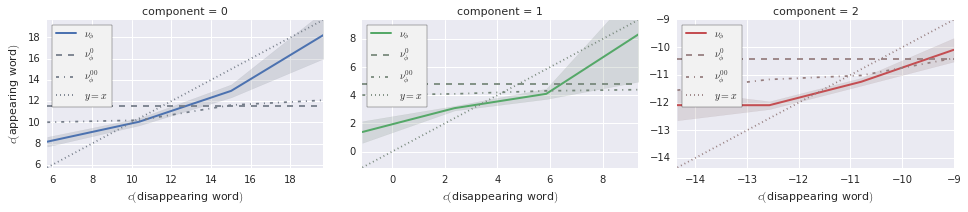

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.56129877  0.20402319  0.1365441   0.03923056  0.03374701]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,0.757602,0.075974,-0.255695,0.543163,-0.244557,-0.007273
Component-1,0.526892,0.107650,-0.261540,-0.764077,0.242009,0.003360
Component-2,0.370646,-0.086290,0.920758,-0.071603,0.001087,-0.047467


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 63446) |           | Elapsed Time: 0:00:35 ETA:  26 days, 0:12:39

  0% (  113 of 63446) |                    | Elapsed Time: 0:00:36 ETA:  0:08:50

  0% (  232 of 63446) |                    | Elapsed Time: 0:00:37 ETA:  0:08:32

  0% (  349 of 63446) |                    | Elapsed Time: 0:00:38 ETA:  0:08:29

  0% (  463 of 63446) |                    | Elapsed Time: 0:00:39 ETA:  0:08:31

  0% (  585 of 63446) |                    | Elapsed Time: 0:00:40 ETA:  0:08:24

  1% (  709 of 63446) |                    | Elapsed Time: 0:00:41 ETA:  0:08:17

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:42 ETA:  0:08:24

  1% (  913 of 63446) |                    | Elapsed Time: 0:00:43 ETA:  0:08:21

  1% ( 1038 of 63446) |                    | Elapsed Time: 0:00:44 ETA:  0:08:16

  1% ( 1159 of 63446) |                    | Elapsed Time: 0:00:45 ETA:  0:08:11

  2% ( 1285 of 63446) |                    | Elapsed Time: 0:00:46 ETA:  0:08:06

  2% ( 1393 of 63446) |                    | Elapsed Time: 0:00:47 ETA:  0:08:10

  2% ( 1518 of 63446) |                    | Elapsed Time: 0:00:48 ETA:  0:08:03

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:00:48 ETA:  0:08:00

  2% ( 1727 of 63446) |                    | Elapsed Time: 0:00:49 ETA:  0:07:51

  2% ( 1880 of 63446) |                    | Elapsed Time: 0:00:50 ETA:  0:07:28

  3% ( 1970 of 63446) |                    | Elapsed Time: 0:00:51 ETA:  0:07:41

  3% ( 2046 of 63446) |                    | Elapsed Time: 0:00:52 ETA:  0:08:05

  3% ( 2120 of 63446) |                    | Elapsed Time: 0:00:53 ETA:  0:08:31

  3% ( 2193 of 63446) |                    | Elapsed Time: 0:00:54 ETA:  0:09:03

  3% ( 2268 of 63446) |                    | Elapsed Time: 0:00:55 ETA:  0:09:25

  3% ( 2348 of 63446) |                    | Elapsed Time: 0:00:56 ETA:  0:09:57

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:00:57 ETA:  0:10:14

  3% ( 2487 of 63446) |                    | Elapsed Time: 0:00:58 ETA:  0:10:42

  4% ( 2601 of 63446) |                    | Elapsed Time: 0:00:59 ETA:  0:11:19

  4% ( 2718 of 63446) |                    | Elapsed Time: 0:01:00 ETA:  0:10:52

  4% ( 2834 of 63446) |                    | Elapsed Time: 0:01:01 ETA:  0:10:14

  4% ( 2951 of 63446) |                    | Elapsed Time: 0:01:02 ETA:  0:09:38

  4% ( 3070 of 63446) |                    | Elapsed Time: 0:01:03 ETA:  0:09:03

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:01:04 ETA:  0:08:31

  5% ( 3299 of 63446) |#                   | Elapsed Time: 0:01:05 ETA:  0:08:03

  5% ( 3423 of 63446) |#                   | Elapsed Time: 0:01:06 ETA:  0:07:53

  5% ( 3538 of 63446) |#                   | Elapsed Time: 0:01:07 ETA:  0:07:48

  5% ( 3667 of 63446) |#                   | Elapsed Time: 0:01:08 ETA:  0:07:39

  6% ( 3818 of 63446) |#                   | Elapsed Time: 0:01:09 ETA:  0:07:22

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:01:10 ETA:  0:07:03

  6% ( 4121 of 63446) |#                   | Elapsed Time: 0:01:11 ETA:  0:06:46

  6% ( 4274 of 63446) |#                   | Elapsed Time: 0:01:12 ETA:  0:06:32

  6% ( 4433 of 63446) |#                   | Elapsed Time: 0:01:13 ETA:  0:06:18

  7% ( 4594 of 63446) |#                   | Elapsed Time: 0:01:14 ETA:  0:06:05

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:01:15 ETA:  0:05:42

  7% ( 4889 of 63446) |#                   | Elapsed Time: 0:01:16 ETA:  0:05:40

  7% ( 5021 of 63446) |#                   | Elapsed Time: 0:01:17 ETA:  0:05:46

  8% ( 5145 of 63446) |#                   | Elapsed Time: 0:01:18 ETA:  0:05:57

  8% ( 5271 of 63446) |#                   | Elapsed Time: 0:01:19 ETA:  0:06:07

  8% ( 5401 of 63446) |#                   | Elapsed Time: 0:01:20 ETA:  0:06:15

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:01:21 ETA:  0:06:38

  8% ( 5693 of 63446) |#                   | Elapsed Time: 0:01:22 ETA:  0:06:45

  9% ( 5836 of 63446) |#                   | Elapsed Time: 0:01:23 ETA:  0:06:39

  9% ( 5949 of 63446) |#                   | Elapsed Time: 0:01:24 ETA:  0:06:46

  9% ( 6042 of 63446) |#                   | Elapsed Time: 0:01:25 ETA:  0:07:04

  9% ( 6125 of 63446) |#                   | Elapsed Time: 0:01:26 ETA:  0:07:24

  9% ( 6191 of 63446) |#                   | Elapsed Time: 0:01:27 ETA:  0:07:59

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:04

 10% ( 6479 of 63446) |##                  | Elapsed Time: 0:01:29 ETA:  0:07:51

 10% ( 6605 of 63446) |##                  | Elapsed Time: 0:01:30 ETA:  0:07:59

 10% ( 6709 of 63446) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:23

 10% ( 6786 of 63446) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:48

 10% ( 6858 of 63446) |##                  | Elapsed Time: 0:01:33 ETA:  0:09:04

 10% ( 6936 of 63446) |##                  | Elapsed Time: 0:01:34 ETA:  0:09:07

 11% ( 7013 of 63446) |##                  | Elapsed Time: 0:01:35 ETA:  0:08:57

 11% ( 7055 of 63446) |##                  | Elapsed Time: 0:01:36 ETA:  0:10:20

 11% ( 7110 of 63446) |##                  | Elapsed Time: 0:01:37 ETA:  0:10:58

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:01:37 ETA:  0:11:51

 11% ( 7199 of 63446) |##                  | Elapsed Time: 0:01:38 ETA:  0:13:18

 11% ( 7314 of 63446) |##                  | Elapsed Time: 0:01:39 ETA:  0:13:01

 11% ( 7416 of 63446) |##                  | Elapsed Time: 0:01:40 ETA:  0:12:24

 11% ( 7536 of 63446) |##                  | Elapsed Time: 0:01:41 ETA:  0:11:23

 12% ( 7673 of 63446) |##                  | Elapsed Time: 0:01:42 ETA:  0:10:19

 12% ( 7811 of 63446) |##                  | Elapsed Time: 0:01:43 ETA:  0:09:22

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:01:44 ETA:  0:08:17

 12% ( 8052 of 63446) |##                  | Elapsed Time: 0:01:45 ETA:  0:07:34

 12% ( 8158 of 63446) |##                  | Elapsed Time: 0:01:46 ETA:  0:07:34

 13% ( 8271 of 63446) |##                  | Elapsed Time: 0:01:47 ETA:  0:07:06

 13% ( 8376 of 63446) |##                  | Elapsed Time: 0:01:48 ETA:  0:07:10

 13% ( 8486 of 63446) |##                  | Elapsed Time: 0:01:49 ETA:  0:07:05

 13% ( 8594 of 63446) |##                  | Elapsed Time: 0:01:50 ETA:  0:07:10

 13% ( 8700 of 63446) |##                  | Elapsed Time: 0:01:51 ETA:  0:07:25

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:01:52 ETA:  0:07:39

 13% ( 8830 of 63446) |##                  | Elapsed Time: 0:01:53 ETA:  0:07:48

 14% ( 8944 of 63446) |##                  | Elapsed Time: 0:01:54 ETA:  0:07:52

 14% ( 9049 of 63446) |##                  | Elapsed Time: 0:01:55 ETA:  0:07:51

 14% ( 9162 of 63446) |##                  | Elapsed Time: 0:01:56 ETA:  0:07:51

 14% ( 9266 of 63446) |##                  | Elapsed Time: 0:01:57 ETA:  0:07:50

 14% ( 9370 of 63446) |##                  | Elapsed Time: 0:01:58 ETA:  0:07:54

 14% ( 9476 of 63446) |##                  | Elapsed Time: 0:01:59 ETA:  0:07:54

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:01:59 ETA:  0:07:53

 15% ( 9630 of 63446) |###                 | Elapsed Time: 0:02:00 ETA:  0:07:49

 15% ( 9739 of 63446) |###                 | Elapsed Time: 0:02:01 ETA:  0:07:46

 15% ( 9850 of 63446) |###                 | Elapsed Time: 0:02:02 ETA:  0:07:47

 15% ( 9958 of 63446) |###                 | Elapsed Time: 0:02:03 ETA:  0:07:44

 15% (10066 of 63446) |###                 | Elapsed Time: 0:02:04 ETA:  0:07:47

 16% (10178 of 63446) |###                 | Elapsed Time: 0:02:05 ETA:  0:07:41

 16% (10310 of 63446) |###                 | Elapsed Time: 0:02:06 ETA:  0:07:28

 16% (10422 of 63446) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:26

 16% (10520 of 63446) |###                 | Elapsed Time: 0:02:08 ETA:  0:07:35

 16% (10544 of 63446) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:35

 16% (10640 of 63446) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:46

 16% (10740 of 63446) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:52

 17% (10837 of 63446) |###                 | Elapsed Time: 0:02:12 ETA:  0:09:00

 17% (10930 of 63446) |###                 | Elapsed Time: 0:02:13 ETA:  0:09:16

 17% (11030 of 63446) |###                 | Elapsed Time: 0:02:14 ETA:  0:09:28

 17% (11104 of 63446) |###                 | Elapsed Time: 0:02:15 ETA:  0:09:20

 17% (11212 of 63446) |###                 | Elapsed Time: 0:02:16 ETA:  0:09:22

 17% (11313 of 63446) |###                 | Elapsed Time: 0:02:17 ETA:  0:09:19

 18% (11426 of 63446) |###                 | Elapsed Time: 0:02:18 ETA:  0:08:07

 18% (11530 of 63446) |###                 | Elapsed Time: 0:02:19 ETA:  0:08:01

 18% (11641 of 63446) |###                 | Elapsed Time: 0:02:20 ETA:  0:07:52

 18% (11758 of 63446) |###                 | Elapsed Time: 0:02:21 ETA:  0:07:38

 18% (11859 of 63446) |###                 | Elapsed Time: 0:02:22 ETA:  0:07:32

 18% (11897 of 63446) |###                 | Elapsed Time: 0:02:22 ETA:  0:07:27

 18% (12002 of 63446) |###                 | Elapsed Time: 0:02:23 ETA:  0:07:29

 19% (12107 of 63446) |###                 | Elapsed Time: 0:02:24 ETA:  0:07:29

 19% (12226 of 63446) |###                 | Elapsed Time: 0:02:25 ETA:  0:07:17

 19% (12336 of 63446) |###                 | Elapsed Time: 0:02:26 ETA:  0:07:18

 19% (12418 of 63446) |###                 | Elapsed Time: 0:02:27 ETA:  0:07:32

 19% (12518 of 63446) |###                 | Elapsed Time: 0:02:28 ETA:  0:07:38

 19% (12620 of 63446) |###                 | Elapsed Time: 0:02:29 ETA:  0:07:48

 20% (12690 of 63446) |####                | Elapsed Time: 0:02:30 ETA:  0:07:48

 20% (12790 of 63446) |####                | Elapsed Time: 0:02:31 ETA:  0:07:50

 20% (12897 of 63446) |####                | Elapsed Time: 0:02:32 ETA:  0:07:48

 20% (13000 of 63446) |####                | Elapsed Time: 0:02:33 ETA:  0:07:49

 20% (13091 of 63446) |####                | Elapsed Time: 0:02:34 ETA:  0:08:07

 20% (13191 of 63446) |####                | Elapsed Time: 0:02:35 ETA:  0:08:14

 20% (13298 of 63446) |####                | Elapsed Time: 0:02:36 ETA:  0:07:55

 21% (13405 of 63446) |####                | Elapsed Time: 0:02:37 ETA:  0:07:49

 21% (13483 of 63446) |####                | Elapsed Time: 0:02:38 ETA:  0:08:04

 21% (13570 of 63446) |####                | Elapsed Time: 0:02:39 ETA:  0:08:12

 21% (13655 of 63446) |####                | Elapsed Time: 0:02:40 ETA:  0:08:23

 21% (13751 of 63446) |####                | Elapsed Time: 0:02:41 ETA:  0:08:30

 21% (13847 of 63446) |####                | Elapsed Time: 0:02:42 ETA:  0:08:35

 21% (13919 of 63446) |####                | Elapsed Time: 0:02:43 ETA:  0:08:49

 22% (14009 of 63446) |####                | Elapsed Time: 0:02:44 ETA:  0:08:56

 22% (14093 of 63446) |####                | Elapsed Time: 0:02:45 ETA:  0:09:15

 22% (14188 of 63446) |####                | Elapsed Time: 0:02:46 ETA:  0:09:25

 22% (14276 of 63446) |####                | Elapsed Time: 0:02:47 ETA:  0:08:59

 22% (14385 of 63446) |####                | Elapsed Time: 0:02:48 ETA:  0:08:40

 22% (14496 of 63446) |####                | Elapsed Time: 0:02:49 ETA:  0:08:17

 23% (14599 of 63446) |####                | Elapsed Time: 0:02:50 ETA:  0:08:10

 23% (14719 of 63446) |####                | Elapsed Time: 0:02:51 ETA:  0:07:51

 23% (14838 of 63446) |####                | Elapsed Time: 0:02:52 ETA:  0:07:17

 23% (14929 of 63446) |####                | Elapsed Time: 0:02:53 ETA:  0:07:15

 23% (15002 of 63446) |####                | Elapsed Time: 0:02:54 ETA:  0:07:22

 23% (15069 of 63446) |####                | Elapsed Time: 0:02:55 ETA:  0:07:30

 23% (15141 of 63446) |####                | Elapsed Time: 0:02:56 ETA:  0:07:57

 23% (15200 of 63446) |####                | Elapsed Time: 0:02:57 ETA:  0:08:36

 24% (15285 of 63446) |####                | Elapsed Time: 0:02:58 ETA:  0:08:59

 24% (15377 of 63446) |####                | Elapsed Time: 0:02:59 ETA:  0:09:08

 24% (15483 of 63446) |####                | Elapsed Time: 0:03:00 ETA:  0:09:20

 24% (15607 of 63446) |####                | Elapsed Time: 0:03:01 ETA:  0:09:14

 24% (15699 of 63446) |####                | Elapsed Time: 0:03:02 ETA:  0:09:13

 24% (15816 of 63446) |####                | Elapsed Time: 0:03:03 ETA:  0:08:31

 25% (15862 of 63446) |#####               | Elapsed Time: 0:03:03 ETA:  0:08:15

 25% (15974 of 63446) |#####               | Elapsed Time: 0:03:04 ETA:  0:07:40

 25% (16083 of 63446) |#####               | Elapsed Time: 0:03:05 ETA:  0:07:02

 25% (16190 of 63446) |#####               | Elapsed Time: 0:03:06 ETA:  0:06:45

 25% (16300 of 63446) |#####               | Elapsed Time: 0:03:07 ETA:  0:06:33

 25% (16392 of 63446) |#####               | Elapsed Time: 0:03:08 ETA:  0:06:41

 25% (16479 of 63446) |#####               | Elapsed Time: 0:03:09 ETA:  0:07:05

 26% (16567 of 63446) |#####               | Elapsed Time: 0:03:10 ETA:  0:07:07

 26% (16655 of 63446) |#####               | Elapsed Time: 0:03:11 ETA:  0:07:28

 26% (16747 of 63446) |#####               | Elapsed Time: 0:03:12 ETA:  0:07:35

 26% (16856 of 63446) |#####               | Elapsed Time: 0:03:13 ETA:  0:07:36

 26% (16956 of 63446) |#####               | Elapsed Time: 0:03:14 ETA:  0:07:42

 26% (17057 of 63446) |#####               | Elapsed Time: 0:03:15 ETA:  0:07:47

 27% (17152 of 63446) |#####               | Elapsed Time: 0:03:16 ETA:  0:07:58

 27% (17246 of 63446) |#####               | Elapsed Time: 0:03:17 ETA:  0:07:55

 27% (17336 of 63446) |#####               | Elapsed Time: 0:03:18 ETA:  0:07:51

 27% (17448 of 63446) |#####               | Elapsed Time: 0:03:19 ETA:  0:07:26

 27% (17574 of 63446) |#####               | Elapsed Time: 0:03:20 ETA:  0:06:58

 27% (17668 of 63446) |#####               | Elapsed Time: 0:03:21 ETA:  0:06:56

 28% (17770 of 63446) |#####               | Elapsed Time: 0:03:22 ETA:  0:07:00

 28% (17870 of 63446) |#####               | Elapsed Time: 0:03:23 ETA:  0:06:59

 28% (17968 of 63446) |#####               | Elapsed Time: 0:03:24 ETA:  0:07:00

 28% (18079 of 63446) |#####               | Elapsed Time: 0:03:25 ETA:  0:06:48

 28% (18197 of 63446) |#####               | Elapsed Time: 0:03:26 ETA:  0:06:31

 28% (18241 of 63446) |#####               | Elapsed Time: 0:03:27 ETA:  0:06:16

 28% (18364 of 63446) |#####               | Elapsed Time: 0:03:28 ETA:  0:06:13

 29% (18487 of 63446) |#####               | Elapsed Time: 0:03:29 ETA:  0:06:14

 29% (18602 of 63446) |#####               | Elapsed Time: 0:03:30 ETA:  0:06:00

 29% (18728 of 63446) |#####               | Elapsed Time: 0:03:31 ETA:  0:05:44

 29% (18848 of 63446) |#####               | Elapsed Time: 0:03:32 ETA:  0:05:32

 29% (18965 of 63446) |#####               | Elapsed Time: 0:03:33 ETA:  0:05:21

 30% (19034 of 63446) |######              | Elapsed Time: 0:03:33 ETA:  0:05:15

 30% (19154 of 63446) |######              | Elapsed Time: 0:03:34 ETA:  0:05:13

 30% (19271 of 63446) |######              | Elapsed Time: 0:03:35 ETA:  0:05:15

 30% (19414 of 63446) |######              | Elapsed Time: 0:03:36 ETA:  0:05:03

 30% (19492 of 63446) |######              | Elapsed Time: 0:03:37 ETA:  0:05:26

 30% (19643 of 63446) |######              | Elapsed Time: 0:03:38 ETA:  0:05:06

 31% (19750 of 63446) |######              | Elapsed Time: 0:03:39 ETA:  0:05:15

 31% (19827 of 63446) |######              | Elapsed Time: 0:03:40 ETA:  0:05:14

 31% (19956 of 63446) |######              | Elapsed Time: 0:03:41 ETA:  0:05:06

 31% (20093 of 63446) |######              | Elapsed Time: 0:03:42 ETA:  0:04:57

 31% (20240 of 63446) |######              | Elapsed Time: 0:03:43 ETA:  0:04:43

 32% (20380 of 63446) |######              | Elapsed Time: 0:03:44 ETA:  0:04:32

 32% (20495 of 63446) |######              | Elapsed Time: 0:03:45 ETA:  0:04:44

 32% (20620 of 63446) |######              | Elapsed Time: 0:03:46 ETA:  0:04:35

 32% (20750 of 63446) |######              | Elapsed Time: 0:03:47 ETA:  0:04:22

 32% (20870 of 63446) |######              | Elapsed Time: 0:03:48 ETA:  0:04:23

 33% (20994 of 63446) |######              | Elapsed Time: 0:03:49 ETA:  0:04:24

 33% (21117 of 63446) |######              | Elapsed Time: 0:03:50 ETA:  0:04:30

 33% (21242 of 63446) |######              | Elapsed Time: 0:03:51 ETA:  0:04:39

 33% (21357 of 63446) |######              | Elapsed Time: 0:03:52 ETA:  0:04:51

 33% (21414 of 63446) |######              | Elapsed Time: 0:03:53 ETA:  0:04:56

 33% (21499 of 63446) |######              | Elapsed Time: 0:03:54 ETA:  0:05:14

 34% (21580 of 63446) |######              | Elapsed Time: 0:03:55 ETA:  0:05:34

 34% (21654 of 63446) |######              | Elapsed Time: 0:03:56 ETA:  0:06:09

 34% (21729 of 63446) |######              | Elapsed Time: 0:03:57 ETA:  0:06:40

 34% (21805 of 63446) |######              | Elapsed Time: 0:03:58 ETA:  0:07:16

 34% (21895 of 63446) |######              | Elapsed Time: 0:03:59 ETA:  0:07:44

 34% (21993 of 63446) |######              | Elapsed Time: 0:04:00 ETA:  0:08:09

 34% (22099 of 63446) |######              | Elapsed Time: 0:04:01 ETA:  0:08:17

 34% (22179 of 63446) |######              | Elapsed Time: 0:04:02 ETA:  0:08:27

 35% (22207 of 63446) |#######             | Elapsed Time: 0:04:02 ETA:  0:08:22

 35% (22317 of 63446) |#######             | Elapsed Time: 0:04:03 ETA:  0:07:52

 35% (22451 of 63446) |#######             | Elapsed Time: 0:04:04 ETA:  0:06:56

 35% (22561 of 63446) |#######             | Elapsed Time: 0:04:05 ETA:  0:06:28

 35% (22666 of 63446) |#######             | Elapsed Time: 0:04:06 ETA:  0:06:06

 35% (22749 of 63446) |#######             | Elapsed Time: 0:04:07 ETA:  0:06:09

 36% (22842 of 63446) |#######             | Elapsed Time: 0:04:08 ETA:  0:06:12

 36% (22929 of 63446) |#######             | Elapsed Time: 0:04:09 ETA:  0:06:25

 36% (23000 of 63446) |#######             | Elapsed Time: 0:04:10 ETA:  0:06:03

 36% (23120 of 63446) |#######             | Elapsed Time: 0:04:11 ETA:  0:05:51

 36% (23229 of 63446) |#######             | Elapsed Time: 0:04:12 ETA:  0:05:51

 36% (23297 of 63446) |#######             | Elapsed Time: 0:04:13 ETA:  0:06:37

 36% (23360 of 63446) |#######             | Elapsed Time: 0:04:14 ETA:  0:07:14

 37% (23480 of 63446) |#######             | Elapsed Time: 0:04:15 ETA:  0:07:00

 37% (23596 of 63446) |#######             | Elapsed Time: 0:04:16 ETA:  0:06:32

 37% (23707 of 63446) |#######             | Elapsed Time: 0:04:17 ETA:  0:06:18

 37% (23793 of 63446) |#######             | Elapsed Time: 0:04:18 ETA:  0:06:14

 37% (23891 of 63446) |#######             | Elapsed Time: 0:04:19 ETA:  0:06:20

 37% (23999 of 63446) |#######             | Elapsed Time: 0:04:20 ETA:  0:06:27

 37% (24106 of 63446) |#######             | Elapsed Time: 0:04:21 ETA:  0:06:28

 38% (24211 of 63446) |#######             | Elapsed Time: 0:04:22 ETA:  0:06:00

 38% (24315 of 63446) |#######             | Elapsed Time: 0:04:23 ETA:  0:05:33

 38% (24444 of 63446) |#######             | Elapsed Time: 0:04:24 ETA:  0:05:26

 38% (24554 of 63446) |#######             | Elapsed Time: 0:04:25 ETA:  0:05:29

 38% (24586 of 63446) |#######             | Elapsed Time: 0:04:25 ETA:  0:05:31

 38% (24686 of 63446) |#######             | Elapsed Time: 0:04:26 ETA:  0:05:25

 39% (24786 of 63446) |#######             | Elapsed Time: 0:04:27 ETA:  0:05:23

 39% (24882 of 63446) |#######             | Elapsed Time: 0:04:28 ETA:  0:05:30

 39% (24991 of 63446) |#######             | Elapsed Time: 0:04:29 ETA:  0:05:27

 39% (25090 of 63446) |#######             | Elapsed Time: 0:04:30 ETA:  0:05:30

 39% (25197 of 63446) |#######             | Elapsed Time: 0:04:31 ETA:  0:05:27

 39% (25331 of 63446) |#######             | Elapsed Time: 0:04:32 ETA:  0:05:23

 40% (25379 of 63446) |########            | Elapsed Time: 0:04:32 ETA:  0:05:18

 40% (25493 of 63446) |########            | Elapsed Time: 0:04:33 ETA:  0:05:13

 40% (25614 of 63446) |########            | Elapsed Time: 0:04:34 ETA:  0:04:59

 40% (25705 of 63446) |########            | Elapsed Time: 0:04:35 ETA:  0:05:03

 40% (25817 of 63446) |########            | Elapsed Time: 0:04:36 ETA:  0:04:53

 40% (25920 of 63446) |########            | Elapsed Time: 0:04:37 ETA:  0:04:56

 41% (26030 of 63446) |########            | Elapsed Time: 0:04:38 ETA:  0:04:49

 41% (26130 of 63446) |########            | Elapsed Time: 0:04:39 ETA:  0:04:52

 41% (26172 of 63446) |########            | Elapsed Time: 0:04:40 ETA:  0:05:18

 41% (26264 of 63446) |########            | Elapsed Time: 0:04:41 ETA:  0:05:33

 41% (26366 of 63446) |########            | Elapsed Time: 0:04:42 ETA:  0:05:40

 41% (26494 of 63446) |########            | Elapsed Time: 0:04:43 ETA:  0:05:34

 41% (26613 of 63446) |########            | Elapsed Time: 0:04:44 ETA:  0:05:14

 42% (26721 of 63446) |########            | Elapsed Time: 0:04:45 ETA:  0:05:16

 42% (26820 of 63446) |########            | Elapsed Time: 0:04:46 ETA:  0:05:16

 42% (26928 of 63446) |########            | Elapsed Time: 0:04:47 ETA:  0:05:17

 42% (26965 of 63446) |########            | Elapsed Time: 0:04:47 ETA:  0:05:11

 42% (27080 of 63446) |########            | Elapsed Time: 0:04:48 ETA:  0:04:56

 42% (27221 of 63446) |########            | Elapsed Time: 0:04:49 ETA:  0:04:25

 43% (27327 of 63446) |########            | Elapsed Time: 0:04:50 ETA:  0:04:22

 43% (27371 of 63446) |########            | Elapsed Time: 0:04:51 ETA:  0:05:14

 43% (27474 of 63446) |########            | Elapsed Time: 0:04:52 ETA:  0:05:25

 43% (27579 of 63446) |########            | Elapsed Time: 0:04:53 ETA:  0:05:26

 43% (27692 of 63446) |########            | Elapsed Time: 0:04:54 ETA:  0:05:15

 43% (27758 of 63446) |########            | Elapsed Time: 0:04:55 ETA:  0:05:02

 43% (27854 of 63446) |########            | Elapsed Time: 0:04:56 ETA:  0:05:09

 44% (27956 of 63446) |########            | Elapsed Time: 0:04:57 ETA:  0:05:16

 44% (28059 of 63446) |########            | Elapsed Time: 0:04:58 ETA:  0:05:43

 44% (28165 of 63446) |########            | Elapsed Time: 0:04:59 ETA:  0:05:42

 44% (28278 of 63446) |########            | Elapsed Time: 0:05:00 ETA:  0:04:53

 44% (28392 of 63446) |########            | Elapsed Time: 0:05:01 ETA:  0:04:44

 44% (28507 of 63446) |########            | Elapsed Time: 0:05:02 ETA:  0:04:37

 45% (28551 of 63446) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:37

 45% (28654 of 63446) |#########           | Elapsed Time: 0:05:03 ETA:  0:04:52

 45% (28762 of 63446) |#########           | Elapsed Time: 0:05:04 ETA:  0:04:43

 45% (28861 of 63446) |#########           | Elapsed Time: 0:05:05 ETA:  0:04:44

 45% (28960 of 63446) |#########           | Elapsed Time: 0:05:06 ETA:  0:04:46

 45% (29056 of 63446) |#########           | Elapsed Time: 0:05:07 ETA:  0:04:51

 45% (29160 of 63446) |#########           | Elapsed Time: 0:05:08 ETA:  0:04:56

 46% (29252 of 63446) |#########           | Elapsed Time: 0:05:09 ETA:  0:05:11

 46% (29344 of 63446) |#########           | Elapsed Time: 0:05:10 ETA:  0:05:27

 46% (29432 of 63446) |#########           | Elapsed Time: 0:05:11 ETA:  0:05:40

 46% (29520 of 63446) |#########           | Elapsed Time: 0:05:12 ETA:  0:05:50

 46% (29635 of 63446) |#########           | Elapsed Time: 0:05:13 ETA:  0:05:44

 46% (29700 of 63446) |#########           | Elapsed Time: 0:05:14 ETA:  0:06:10

 46% (29782 of 63446) |#########           | Elapsed Time: 0:05:15 ETA:  0:06:23

 47% (29884 of 63446) |#########           | Elapsed Time: 0:05:16 ETA:  0:06:17

 47% (29983 of 63446) |#########           | Elapsed Time: 0:05:17 ETA:  0:06:19

 47% (30085 of 63446) |#########           | Elapsed Time: 0:05:18 ETA:  0:06:10

 47% (30137 of 63446) |#########           | Elapsed Time: 0:05:19 ETA:  0:06:04

 47% (30228 of 63446) |#########           | Elapsed Time: 0:05:20 ETA:  0:06:01

 47% (30317 of 63446) |#########           | Elapsed Time: 0:05:21 ETA:  0:05:58

 47% (30425 of 63446) |#########           | Elapsed Time: 0:05:22 ETA:  0:06:04

 48% (30498 of 63446) |#########           | Elapsed Time: 0:05:23 ETA:  0:05:56

 48% (30586 of 63446) |#########           | Elapsed Time: 0:05:24 ETA:  0:05:50

 48% (30667 of 63446) |#########           | Elapsed Time: 0:05:25 ETA:  0:06:07

 48% (30768 of 63446) |#########           | Elapsed Time: 0:05:26 ETA:  0:06:04

 48% (30879 of 63446) |#########           | Elapsed Time: 0:05:27 ETA:  0:05:56

 48% (30930 of 63446) |#########           | Elapsed Time: 0:05:27 ETA:  0:05:50

 48% (31036 of 63446) |#########           | Elapsed Time: 0:05:28 ETA:  0:05:37

 49% (31132 of 63446) |#########           | Elapsed Time: 0:05:29 ETA:  0:05:30

 49% (31236 of 63446) |#########           | Elapsed Time: 0:05:30 ETA:  0:05:32

 49% (31327 of 63446) |#########           | Elapsed Time: 0:05:31 ETA:  0:05:17

 49% (31439 of 63446) |#########           | Elapsed Time: 0:05:32 ETA:  0:04:57

 49% (31538 of 63446) |#########           | Elapsed Time: 0:05:33 ETA:  0:04:43

 49% (31645 of 63446) |#########           | Elapsed Time: 0:05:34 ETA:  0:04:38

 50% (31724 of 63446) |##########          | Elapsed Time: 0:05:35 ETA:  0:04:43

 50% (31807 of 63446) |##########          | Elapsed Time: 0:05:36 ETA:  0:05:00

 50% (31919 of 63446) |##########          | Elapsed Time: 0:05:37 ETA:  0:04:55

 50% (32005 of 63446) |##########          | Elapsed Time: 0:05:38 ETA:  0:05:01

 50% (32092 of 63446) |##########          | Elapsed Time: 0:05:39 ETA:  0:05:12

 50% (32153 of 63446) |##########          | Elapsed Time: 0:05:40 ETA:  0:05:36

 50% (32227 of 63446) |##########          | Elapsed Time: 0:05:41 ETA:  0:06:07

 50% (32294 of 63446) |##########          | Elapsed Time: 0:05:42 ETA:  0:06:37

 51% (32369 of 63446) |##########          | Elapsed Time: 0:05:43 ETA:  0:07:09

 51% (32470 of 63446) |##########          | Elapsed Time: 0:05:44 ETA:  0:07:05

 51% (32517 of 63446) |##########          | Elapsed Time: 0:05:45 ETA:  0:06:55

 51% (32622 of 63446) |##########          | Elapsed Time: 0:05:46 ETA:  0:07:02

 51% (32727 of 63446) |##########          | Elapsed Time: 0:05:47 ETA:  0:06:41

 51% (32835 of 63446) |##########          | Elapsed Time: 0:05:48 ETA:  0:06:19

 51% (32932 of 63446) |##########          | Elapsed Time: 0:05:49 ETA:  0:05:44

 52% (33035 of 63446) |##########          | Elapsed Time: 0:05:50 ETA:  0:05:18

 52% (33145 of 63446) |##########          | Elapsed Time: 0:05:51 ETA:  0:04:43

 52% (33260 of 63446) |##########          | Elapsed Time: 0:05:52 ETA:  0:04:12

 52% (33310 of 63446) |##########          | Elapsed Time: 0:05:52 ETA:  0:04:10

 52% (33403 of 63446) |##########          | Elapsed Time: 0:05:53 ETA:  0:04:16

 52% (33512 of 63446) |##########          | Elapsed Time: 0:05:54 ETA:  0:04:13

 52% (33621 of 63446) |##########          | Elapsed Time: 0:05:55 ETA:  0:04:09

 53% (33730 of 63446) |##########          | Elapsed Time: 0:05:56 ETA:  0:04:07

 53% (33830 of 63446) |##########          | Elapsed Time: 0:05:57 ETA:  0:04:04

 53% (33927 of 63446) |##########          | Elapsed Time: 0:05:58 ETA:  0:04:08

 53% (34007 of 63446) |##########          | Elapsed Time: 0:05:59 ETA:  0:04:28

 53% (34103 of 63446) |##########          | Elapsed Time: 0:06:00 ETA:  0:04:29

 53% (34222 of 63446) |##########          | Elapsed Time: 0:06:01 ETA:  0:04:16

 54% (34330 of 63446) |##########          | Elapsed Time: 0:06:02 ETA:  0:04:05

 54% (34472 of 63446) |##########          | Elapsed Time: 0:06:03 ETA:  0:03:43

 54% (34589 of 63446) |##########          | Elapsed Time: 0:06:04 ETA:  0:03:37

 54% (34696 of 63446) |##########          | Elapsed Time: 0:06:05 ETA:  0:03:37

 54% (34808 of 63446) |##########          | Elapsed Time: 0:06:06 ETA:  0:03:29

 55% (34896 of 63446) |###########         | Elapsed Time: 0:06:07 ETA:  0:03:24

 55% (34999 of 63446) |###########         | Elapsed Time: 0:06:08 ETA:  0:03:10

 55% (35066 of 63446) |###########         | Elapsed Time: 0:06:09 ETA:  0:03:37

 55% (35147 of 63446) |###########         | Elapsed Time: 0:06:10 ETA:  0:04:01

 55% (35243 of 63446) |###########         | Elapsed Time: 0:06:11 ETA:  0:04:07

 55% (35340 of 63446) |###########         | Elapsed Time: 0:06:12 ETA:  0:04:39

 55% (35442 of 63446) |###########         | Elapsed Time: 0:06:13 ETA:  0:04:49

 56% (35553 of 63446) |###########         | Elapsed Time: 0:06:14 ETA:  0:04:45

 56% (35655 of 63446) |###########         | Elapsed Time: 0:06:15 ETA:  0:04:51

 56% (35689 of 63446) |###########         | Elapsed Time: 0:06:15 ETA:  0:04:54

 56% (35808 of 63446) |###########         | Elapsed Time: 0:06:16 ETA:  0:04:39

 56% (35939 of 63446) |###########         | Elapsed Time: 0:06:17 ETA:  0:03:50

 56% (36043 of 63446) |###########         | Elapsed Time: 0:06:18 ETA:  0:03:33

 56% (36154 of 63446) |###########         | Elapsed Time: 0:06:19 ETA:  0:03:22

 57% (36259 of 63446) |###########         | Elapsed Time: 0:06:20 ETA:  0:03:16

 57% (36376 of 63446) |###########         | Elapsed Time: 0:06:21 ETA:  0:03:06

 57% (36482 of 63446) |###########         | Elapsed Time: 0:06:22 ETA:  0:03:05

 57% (36592 of 63446) |###########         | Elapsed Time: 0:06:23 ETA:  0:02:59

 57% (36692 of 63446) |###########         | Elapsed Time: 0:06:24 ETA:  0:03:04

 57% (36778 of 63446) |###########         | Elapsed Time: 0:06:25 ETA:  0:03:22

 58% (36901 of 63446) |###########         | Elapsed Time: 0:06:26 ETA:  0:03:26

 58% (37007 of 63446) |###########         | Elapsed Time: 0:06:27 ETA:  0:03:24

 58% (37099 of 63446) |###########         | Elapsed Time: 0:06:28 ETA:  0:03:34

 58% (37219 of 63446) |###########         | Elapsed Time: 0:06:29 ETA:  0:03:24

 58% (37275 of 63446) |###########         | Elapsed Time: 0:06:30 ETA:  0:03:39

 58% (37388 of 63446) |###########         | Elapsed Time: 0:06:31 ETA:  0:03:36

 59% (37496 of 63446) |###########         | Elapsed Time: 0:06:32 ETA:  0:03:36

 59% (37616 of 63446) |###########         | Elapsed Time: 0:06:33 ETA:  0:03:22

 59% (37738 of 63446) |###########         | Elapsed Time: 0:06:34 ETA:  0:02:59

 59% (37842 of 63446) |###########         | Elapsed Time: 0:06:35 ETA:  0:03:09

 59% (37928 of 63446) |###########         | Elapsed Time: 0:06:36 ETA:  0:03:21

 59% (38020 of 63446) |###########         | Elapsed Time: 0:06:37 ETA:  0:03:20

 60% (38068 of 63446) |############        | Elapsed Time: 0:06:37 ETA:  0:03:23

 60% (38191 of 63446) |############        | Elapsed Time: 0:06:38 ETA:  0:03:02

 60% (38301 of 63446) |############        | Elapsed Time: 0:06:39 ETA:  0:03:04

 60% (38399 of 63446) |############        | Elapsed Time: 0:06:40 ETA:  0:03:09

 60% (38499 of 63446) |############        | Elapsed Time: 0:06:41 ETA:  0:03:22

 60% (38623 of 63446) |############        | Elapsed Time: 0:06:42 ETA:  0:03:20

 61% (38734 of 63446) |############        | Elapsed Time: 0:06:43 ETA:  0:03:14

 61% (38861 of 63446) |############        | Elapsed Time: 0:06:45 ETA:  0:02:44

 61% (38958 of 63446) |############        | Elapsed Time: 0:06:46 ETA:  0:02:57

 61% (39063 of 63446) |############        | Elapsed Time: 0:06:47 ETA:  0:03:09

 61% (39140 of 63446) |############        | Elapsed Time: 0:06:48 ETA:  0:03:31

 61% (39233 of 63446) |############        | Elapsed Time: 0:06:49 ETA:  0:03:34

 62% (39345 of 63446) |############        | Elapsed Time: 0:06:50 ETA:  0:03:24

 62% (39476 of 63446) |############        | Elapsed Time: 0:06:51 ETA:  0:03:17

 62% (39596 of 63446) |############        | Elapsed Time: 0:06:52 ETA:  0:03:10

 62% (39654 of 63446) |############        | Elapsed Time: 0:06:52 ETA:  0:03:17

 62% (39783 of 63446) |############        | Elapsed Time: 0:06:53 ETA:  0:02:59

 62% (39880 of 63446) |############        | Elapsed Time: 0:06:54 ETA:  0:02:58

 63% (39999 of 63446) |############        | Elapsed Time: 0:06:55 ETA:  0:02:47

 63% (40109 of 63446) |############        | Elapsed Time: 0:06:56 ETA:  0:02:26

 63% (40212 of 63446) |############        | Elapsed Time: 0:06:57 ETA:  0:02:19

 63% (40333 of 63446) |############        | Elapsed Time: 0:06:58 ETA:  0:02:13

 63% (40447 of 63446) |############        | Elapsed Time: 0:06:59 ETA:  0:02:28

 63% (40559 of 63446) |############        | Elapsed Time: 0:07:00 ETA:  0:02:23

 64% (40676 of 63446) |############        | Elapsed Time: 0:07:01 ETA:  0:02:30

 64% (40789 of 63446) |############        | Elapsed Time: 0:07:02 ETA:  0:02:19

 64% (40883 of 63446) |############        | Elapsed Time: 0:07:03 ETA:  0:02:34

 64% (41007 of 63446) |############        | Elapsed Time: 0:07:04 ETA:  0:02:24

 64% (41122 of 63446) |############        | Elapsed Time: 0:07:05 ETA:  0:02:16

 65% (41240 of 63446) |#############       | Elapsed Time: 0:07:06 ETA:  0:02:16

 65% (41363 of 63446) |#############       | Elapsed Time: 0:07:07 ETA:  0:02:08

 65% (41472 of 63446) |#############       | Elapsed Time: 0:07:08 ETA:  0:02:10

 65% (41598 of 63446) |#############       | Elapsed Time: 0:07:09 ETA:  0:02:01

 65% (41704 of 63446) |#############       | Elapsed Time: 0:07:10 ETA:  0:02:06

 65% (41791 of 63446) |#############       | Elapsed Time: 0:07:11 ETA:  0:02:19

 66% (41877 of 63446) |#############       | Elapsed Time: 0:07:12 ETA:  0:02:23

 66% (41971 of 63446) |#############       | Elapsed Time: 0:07:13 ETA:  0:02:39

 66% (42033 of 63446) |#############       | Elapsed Time: 0:07:14 ETA:  0:02:49

 66% (42143 of 63446) |#############       | Elapsed Time: 0:07:15 ETA:  0:02:55

 66% (42254 of 63446) |#############       | Elapsed Time: 0:07:16 ETA:  0:03:01

 66% (42348 of 63446) |#############       | Elapsed Time: 0:07:17 ETA:  0:03:11

 66% (42467 of 63446) |#############       | Elapsed Time: 0:07:18 ETA:  0:03:15

 67% (42603 of 63446) |#############       | Elapsed Time: 0:07:19 ETA:  0:02:54

 67% (42697 of 63446) |#############       | Elapsed Time: 0:07:20 ETA:  0:02:48

 67% (42827 of 63446) |#############       | Elapsed Time: 0:07:21 ETA:  0:02:16

 67% (42936 of 63446) |#############       | Elapsed Time: 0:07:22 ETA:  0:02:10

 67% (43001 of 63446) |#############       | Elapsed Time: 0:07:23 ETA:  0:02:39

 67% (43086 of 63446) |#############       | Elapsed Time: 0:07:24 ETA:  0:02:57

 68% (43213 of 63446) |#############       | Elapsed Time: 0:07:25 ETA:  0:02:32

 68% (43314 of 63446) |#############       | Elapsed Time: 0:07:26 ETA:  0:02:43

 68% (43428 of 63446) |#############       | Elapsed Time: 0:07:27 ETA:  0:02:58

 68% (43528 of 63446) |#############       | Elapsed Time: 0:07:28 ETA:  0:02:53

 68% (43620 of 63446) |#############       | Elapsed Time: 0:07:29 ETA:  0:03:07

 68% (43697 of 63446) |#############       | Elapsed Time: 0:07:30 ETA:  0:03:25

 69% (43787 of 63446) |#############       | Elapsed Time: 0:07:31 ETA:  0:03:40

 69% (43849 of 63446) |#############       | Elapsed Time: 0:07:32 ETA:  0:03:41

 69% (43934 of 63446) |#############       | Elapsed Time: 0:07:33 ETA:  0:03:40

 69% (44028 of 63446) |#############       | Elapsed Time: 0:07:34 ETA:  0:04:06

 69% (44133 of 63446) |#############       | Elapsed Time: 0:07:35 ETA:  0:04:02

 69% (44237 of 63446) |#############       | Elapsed Time: 0:07:36 ETA:  0:04:09

 69% (44338 of 63446) |#############       | Elapsed Time: 0:07:37 ETA:  0:04:07

 70% (44413 of 63446) |##############      | Elapsed Time: 0:07:38 ETA:  0:04:03

 70% (44531 of 63446) |##############      | Elapsed Time: 0:07:39 ETA:  0:03:28

 70% (44639 of 63446) |##############      | Elapsed Time: 0:07:40 ETA:  0:03:12

 70% (44752 of 63446) |##############      | Elapsed Time: 0:07:41 ETA:  0:02:34

 70% (44854 of 63446) |##############      | Elapsed Time: 0:07:42 ETA:  0:02:22

 70% (44958 of 63446) |##############      | Elapsed Time: 0:07:43 ETA:  0:02:14

 70% (45043 of 63446) |##############      | Elapsed Time: 0:07:44 ETA:  0:02:26

 71% (45150 of 63446) |##############      | Elapsed Time: 0:07:45 ETA:  0:02:23

 71% (45206 of 63446) |##############      | Elapsed Time: 0:07:46 ETA:  0:02:27

 71% (45299 of 63446) |##############      | Elapsed Time: 0:07:47 ETA:  0:02:34

 71% (45389 of 63446) |##############      | Elapsed Time: 0:07:48 ETA:  0:02:53

 71% (45513 of 63446) |##############      | Elapsed Time: 0:07:49 ETA:  0:02:40

 71% (45640 of 63446) |##############      | Elapsed Time: 0:07:50 ETA:  0:02:29

 72% (45708 of 63446) |##############      | Elapsed Time: 0:07:51 ETA:  0:02:53

 72% (45797 of 63446) |##############      | Elapsed Time: 0:07:52 ETA:  0:03:04

 72% (45875 of 63446) |##############      | Elapsed Time: 0:07:53 ETA:  0:03:10

 72% (45999 of 63446) |##############      | Elapsed Time: 0:07:54 ETA:  0:02:58

 72% (46122 of 63446) |##############      | Elapsed Time: 0:07:55 ETA:  0:02:33

 72% (46245 of 63446) |##############      | Elapsed Time: 0:07:56 ETA:  0:02:08

 73% (46364 of 63446) |##############      | Elapsed Time: 0:07:57 ETA:  0:02:11

 73% (46477 of 63446) |##############      | Elapsed Time: 0:07:58 ETA:  0:02:20

 73% (46604 of 63446) |##############      | Elapsed Time: 0:07:59 ETA:  0:01:38

 73% (46695 of 63446) |##############      | Elapsed Time: 0:08:00 ETA:  0:01:35

 73% (46792 of 63446) |##############      | Elapsed Time: 0:08:01 ETA:  0:01:16

 73% (46890 of 63446) |##############      | Elapsed Time: 0:08:02 ETA:  0:01:23

 74% (46998 of 63446) |##############      | Elapsed Time: 0:08:03 ETA:  0:01:26

 74% (47104 of 63446) |##############      | Elapsed Time: 0:08:04 ETA:  0:01:35

 74% (47205 of 63446) |##############      | Elapsed Time: 0:08:05 ETA:  0:01:47

 74% (47316 of 63446) |##############      | Elapsed Time: 0:08:06 ETA:  0:01:51

 74% (47425 of 63446) |##############      | Elapsed Time: 0:08:07 ETA:  0:01:52

 74% (47533 of 63446) |##############      | Elapsed Time: 0:08:08 ETA:  0:02:03

 75% (47585 of 63446) |###############     | Elapsed Time: 0:08:08 ETA:  0:01:56

 75% (47698 of 63446) |###############     | Elapsed Time: 0:08:09 ETA:  0:01:50

 75% (47818 of 63446) |###############     | Elapsed Time: 0:08:10 ETA:  0:01:35

 75% (47923 of 63446) |###############     | Elapsed Time: 0:08:11 ETA:  0:01:36

 75% (48016 of 63446) |###############     | Elapsed Time: 0:08:12 ETA:  0:01:44

 75% (48129 of 63446) |###############     | Elapsed Time: 0:08:13 ETA:  0:01:35

 75% (48213 of 63446) |###############     | Elapsed Time: 0:08:14 ETA:  0:01:52

 76% (48307 of 63446) |###############     | Elapsed Time: 0:08:15 ETA:  0:02:01

 76% (48378 of 63446) |###############     | Elapsed Time: 0:08:16 ETA:  0:02:08

 76% (48487 of 63446) |###############     | Elapsed Time: 0:08:17 ETA:  0:02:00

 76% (48617 of 63446) |###############     | Elapsed Time: 0:08:18 ETA:  0:01:48

 76% (48704 of 63446) |###############     | Elapsed Time: 0:08:19 ETA:  0:02:09

 76% (48812 of 63446) |###############     | Elapsed Time: 0:08:20 ETA:  0:02:06

 77% (48934 of 63446) |###############     | Elapsed Time: 0:08:21 ETA:  0:01:45

 77% (49044 of 63446) |###############     | Elapsed Time: 0:08:22 ETA:  0:01:46

 77% (49171 of 63446) |###############     | Elapsed Time: 0:08:23 ETA:  0:01:14

 77% (49300 of 63446) |###############     | Elapsed Time: 0:08:24 ETA:  0:00:55

 77% (49415 of 63446) |###############     | Elapsed Time: 0:08:25 ETA:  0:00:50

 78% (49536 of 63446) |###############     | Elapsed Time: 0:08:26 ETA:  0:00:55

 78% (49675 of 63446) |###############     | Elapsed Time: 0:08:27 ETA:  0:00:24

 78% (49796 of 63446) |###############     | Elapsed Time: 0:08:28 ETA:  0:00:16

 78% (49882 of 63446) |###############     | Elapsed Time: 0:08:29 ETA:  0:00:35

 78% (49964 of 63446) |###############     | Elapsed Time: 0:08:30 ETA:  0:00:43

 78% (50047 of 63446) |###############     | Elapsed Time: 0:08:31 ETA:  0:01:02

 79% (50160 of 63446) |###############     | Elapsed Time: 0:08:32 ETA:  0:01:01

 79% (50281 of 63446) |###############     | Elapsed Time: 0:08:33 ETA:  0:01:04

 79% (50398 of 63446) |###############     | Elapsed Time: 0:08:34 ETA:  0:01:02

 79% (50495 of 63446) |###############     | Elapsed Time: 0:08:35 ETA:  0:01:15

 79% (50583 of 63446) |###############     | Elapsed Time: 0:08:36 ETA:  0:01:47

 79% (50642 of 63446) |###############     | Elapsed Time: 0:08:37 ETA:  0:02:32

 79% (50707 of 63446) |###############     | Elapsed Time: 0:08:38 ETA:  0:02:49

 80% (50757 of 63446) |################    | Elapsed Time: 0:08:39 ETA:  0:02:50

 80% (50864 of 63446) |################    | Elapsed Time: 0:08:40 ETA:  0:02:29

 80% (50972 of 63446) |################    | Elapsed Time: 0:08:41 ETA:  0:02:33

 80% (51071 of 63446) |################    | Elapsed Time: 0:08:42 ETA:  0:02:51

 80% (51161 of 63446) |################    | Elapsed Time: 0:08:43 ETA:  0:03:15

 80% (51235 of 63446) |################    | Elapsed Time: 0:08:44 ETA:  0:03:36

 80% (51317 of 63446) |################    | Elapsed Time: 0:08:45 ETA:  0:03:41

 81% (51439 of 63446) |################    | Elapsed Time: 0:08:46 ETA:  0:02:41

 81% (51550 of 63446) |################    | Elapsed Time: 0:08:47 ETA:  0:01:58

 81% (51661 of 63446) |################    | Elapsed Time: 0:08:48 ETA:  0:01:53

 81% (51774 of 63446) |################    | Elapsed Time: 0:08:49 ETA:  0:01:48

 81% (51904 of 63446) |################    | Elapsed Time: 0:08:50 ETA:  0:01:23

 81% (51999 of 63446) |################    | Elapsed Time: 0:08:51 ETA:  0:01:17

 82% (52100 of 63446) |################    | Elapsed Time: 0:08:52 ETA:  0:00:57

 82% (52181 of 63446) |################    | Elapsed Time: 0:08:53 ETA:  0:00:57

 82% (52292 of 63446) |################    | Elapsed Time: 0:08:54 ETA:  0:01:03

 82% (52343 of 63446) |################    | Elapsed Time: 0:08:54 ETA:  0:01:07

 82% (52461 of 63446) |################    | Elapsed Time: 0:08:55 ETA:  0:00:58

 82% (52589 of 63446) |################    | Elapsed Time: 0:08:56 ETA:  0:00:47

 83% (52700 of 63446) |################    | Elapsed Time: 0:08:57 ETA:  0:00:48

 83% (52829 of 63446) |################    | Elapsed Time: 0:08:58 ETA:  0:00:47

 83% (52926 of 63446) |################    | Elapsed Time: 0:08:59 ETA:  0:00:45

 83% (53017 of 63446) |################    | Elapsed Time: 0:09:00 ETA:  0:00:51

 83% (53137 of 63446) |################    | Elapsed Time: 0:09:01 ETA:  0:00:32

 83% (53253 of 63446) |################    | Elapsed Time: 0:09:02 ETA:  0:00:25

 84% (53354 of 63446) |################    | Elapsed Time: 0:09:03 ETA:  0:00:35

 84% (53476 of 63446) |################    | Elapsed Time: 0:09:04 ETA:  0:00:37

 84% (53590 of 63446) |################    | Elapsed Time: 0:09:05 ETA:  0:00:34

 84% (53698 of 63446) |################    | Elapsed Time: 0:09:06 ETA:  0:00:47

 84% (53802 of 63446) |################    | Elapsed Time: 0:09:07 ETA:  0:00:41

 85% (53930 of 63446) |#################   | Elapsed Time: 0:09:08 ETA:  0:00:13

 85% (54045 of 63446) |#################   | Elapsed Time: 0:09:09 ETA:  0:00:12

 85% (54162 of 63446) |#################   | Elapsed Time: 0:09:10 ETA:  0:00:11

 85% (54287 of 63446) |#################   | Elapsed Time: 0:09:11 ETA:  0:00:00

 85% (54411 of 63446) |#################   | Elapsed Time: 0:09:12 ETA:  0:00:00

 85% (54523 of 63446) |#################   | Elapsed Time: 0:09:13 ETA:  0:00:00

 86% (54654 of 63446) |#################   | Elapsed Time: 0:09:14 ETA:  0:00:00

 86% (54723 of 63446) |#################   | Elapsed Time: 0:09:15 ETA:  0:00:00

 86% (54813 of 63446) |################   | Elapsed Time: 0:27:31 ETA:  21:29:16

 86% (54855 of 63446) |################   | Elapsed Time: 0:27:32 ETA:  20:33:26

 86% (54911 of 63446) |################   | Elapsed Time: 0:27:33 ETA:  21:59:20

 86% (54985 of 63446) |################   | Elapsed Time: 0:27:34 ETA:  23:09:42

 86% (55073 of 63446) |###########  | Elapsed Time: 0:27:35 ETA:  1 day, 0:16:24

 86% (55155 of 63446) |###########  | Elapsed Time: 0:27:36 ETA:  1 day, 1:40:10

 87% (55260 of 63446) |###########  | Elapsed Time: 0:27:37 ETA:  1 day, 1:55:02

 87% (55362 of 63446) |###########  | Elapsed Time: 0:27:38 ETA:  1 day, 2:59:53

 87% (55432 of 63446) |###########  | Elapsed Time: 0:27:39 ETA:  1 day, 2:58:20

 87% (55516 of 63446) |#################   | Elapsed Time: 0:27:40 ETA:  0:00:00

 87% (55592 of 63446) |#################   | Elapsed Time: 0:27:41 ETA:  0:00:00

 87% (55707 of 63446) |#################   | Elapsed Time: 0:27:42 ETA:  0:00:00

 87% (55810 of 63446) |#################   | Elapsed Time: 0:27:43 ETA:  0:00:00

 88% (55874 of 63446) |#################   | Elapsed Time: 0:27:44 ETA:  0:00:00

 88% (55984 of 63446) |#################   | Elapsed Time: 0:27:45 ETA:  0:00:00

 88% (56085 of 63446) |#################   | Elapsed Time: 0:27:46 ETA:  0:00:00

 88% (56202 of 63446) |#################   | Elapsed Time: 0:27:47 ETA:  0:00:00

 88% (56309 of 63446) |#################   | Elapsed Time: 0:27:48 ETA:  0:00:00

 88% (56393 of 63446) |#################   | Elapsed Time: 0:27:49 ETA:  0:00:00

 88% (56458 of 63446) |#################   | Elapsed Time: 0:27:50 ETA:  0:00:00

 89% (56540 of 63446) |#################   | Elapsed Time: 0:27:51 ETA:  0:00:00

 89% (56639 of 63446) |#################   | Elapsed Time: 0:27:52 ETA:  0:00:00

 89% (56731 of 63446) |#################   | Elapsed Time: 0:27:53 ETA:  0:00:00

 89% (56816 of 63446) |#################   | Elapsed Time: 0:27:54 ETA:  0:00:00

 89% (56909 of 63446) |#################   | Elapsed Time: 0:27:55 ETA:  0:00:00

 89% (57013 of 63446) |#################   | Elapsed Time: 0:27:56 ETA:  0:00:00

 90% (57102 of 63446) |##################  | Elapsed Time: 0:27:57 ETA:  0:00:00

 90% (57211 of 63446) |##################  | Elapsed Time: 0:27:58 ETA:  0:00:00

 90% (57296 of 63446) |##################  | Elapsed Time: 0:27:59 ETA:  0:00:00

 90% (57402 of 63446) |##################  | Elapsed Time: 0:28:00 ETA:  0:00:00

 90% (57477 of 63446) |##################  | Elapsed Time: 0:28:01 ETA:  0:00:00

 90% (57563 of 63446) |##################  | Elapsed Time: 0:28:02 ETA:  0:00:00

 90% (57660 of 63446) |##################  | Elapsed Time: 0:28:03 ETA:  0:00:00

 90% (57735 of 63446) |##################  | Elapsed Time: 0:28:04 ETA:  0:00:00

 91% (57841 of 63446) |##################  | Elapsed Time: 0:28:05 ETA:  0:00:00

 91% (57895 of 63446) |##################  | Elapsed Time: 0:28:05 ETA:  0:00:00

 91% (58009 of 63446) |##################  | Elapsed Time: 0:28:06 ETA:  0:00:00

 91% (58124 of 63446) |##################  | Elapsed Time: 0:28:07 ETA:  0:00:00

 91% (58240 of 63446) |##################  | Elapsed Time: 0:28:08 ETA:  0:00:00

 91% (58352 of 63446) |##################  | Elapsed Time: 0:28:09 ETA:  0:00:00

 92% (58431 of 63446) |##################  | Elapsed Time: 0:28:10 ETA:  0:00:00

 92% (58534 of 63446) |##################  | Elapsed Time: 0:28:11 ETA:  0:00:00

 92% (58610 of 63446) |##################  | Elapsed Time: 0:28:12 ETA:  0:00:00

 92% (58688 of 63446) |##################  | Elapsed Time: 0:28:13 ETA:  0:00:00

 92% (58801 of 63446) |##################  | Elapsed Time: 0:28:14 ETA:  0:00:00

 92% (58884 of 63446) |##################  | Elapsed Time: 0:28:15 ETA:  0:00:00

 92% (58980 of 63446) |##################  | Elapsed Time: 0:28:16 ETA:  0:00:00

 93% (59043 of 63446) |##################  | Elapsed Time: 0:28:17 ETA:  0:00:00

 93% (59092 of 63446) |##################  | Elapsed Time: 0:28:18 ETA:  0:00:00

 93% (59120 of 63446) |##################  | Elapsed Time: 0:28:19 ETA:  0:00:00

 93% (59194 of 63446) |##################  | Elapsed Time: 0:28:20 ETA:  0:00:00

 93% (59275 of 63446) |##################  | Elapsed Time: 0:28:21 ETA:  0:00:00

 93% (59354 of 63446) |##################  | Elapsed Time: 0:28:22 ETA:  0:00:00

 93% (59419 of 63446) |##################  | Elapsed Time: 0:28:23 ETA:  0:00:00

 93% (59481 of 63446) |##################  | Elapsed Time: 0:28:24 ETA:  0:00:00

 93% (59557 of 63446) |##################  | Elapsed Time: 0:28:25 ETA:  0:00:00

 94% (59663 of 63446) |##################  | Elapsed Time: 0:28:26 ETA:  0:00:00

 94% (59787 of 63446) |##################  | Elapsed Time: 0:28:27 ETA:  0:00:00

 94% (59865 of 63446) |##################  | Elapsed Time: 0:28:28 ETA:  0:00:00

 94% (59959 of 63446) |##################  | Elapsed Time: 0:28:29 ETA:  0:00:00

 94% (60052 of 63446) |##################  | Elapsed Time: 0:28:30 ETA:  0:00:00

 94% (60167 of 63446) |##################  | Elapsed Time: 0:28:31 ETA:  0:00:00

 95% (60274 of 63446) |################### | Elapsed Time: 0:28:32 ETA:  0:00:00

 95% (60382 of 63446) |################### | Elapsed Time: 0:28:33 ETA:  0:00:00

 95% (60502 of 63446) |################### | Elapsed Time: 0:28:34 ETA:  0:00:00

 95% (60610 of 63446) |################### | Elapsed Time: 0:28:35 ETA:  0:00:00

 95% (60734 of 63446) |################### | Elapsed Time: 0:28:36 ETA:  0:00:00

 95% (60857 of 63446) |################### | Elapsed Time: 0:28:37 ETA:  0:00:00

 96% (60973 of 63446) |################### | Elapsed Time: 0:28:38 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:28:39 ETA:  0:00:00

 96% (61176 of 63446) |################### | Elapsed Time: 0:28:40 ETA:  0:00:00

 96% (61291 of 63446) |################### | Elapsed Time: 0:28:41 ETA:  0:00:00

 96% (61404 of 63446) |################### | Elapsed Time: 0:28:42 ETA:  0:00:00

 96% (61500 of 63446) |################### | Elapsed Time: 0:28:43 ETA:  0:00:00

 97% (61599 of 63446) |################### | Elapsed Time: 0:28:44 ETA:  0:00:00

 97% (61679 of 63446) |################### | Elapsed Time: 0:28:45 ETA:  0:00:00

 97% (61760 of 63446) |################### | Elapsed Time: 0:28:46 ETA:  0:00:00

 97% (61842 of 63446) |################### | Elapsed Time: 0:28:47 ETA:  0:00:00

 97% (61860 of 63446) |################### | Elapsed Time: 0:28:48 ETA:  0:00:00

 97% (61913 of 63446) |################### | Elapsed Time: 0:28:49 ETA:  0:00:00

 97% (61951 of 63446) |################### | Elapsed Time: 0:28:50 ETA:  0:00:00

 97% (61999 of 63446) |################### | Elapsed Time: 0:28:51 ETA:  0:00:00

 97% (62053 of 63446) |################### | Elapsed Time: 0:28:52 ETA:  0:00:00

 97% (62099 of 63446) |################### | Elapsed Time: 0:28:53 ETA:  0:00:00

 97% (62150 of 63446) |################### | Elapsed Time: 0:28:54 ETA:  0:00:00

 98% (62211 of 63446) |################### | Elapsed Time: 0:28:55 ETA:  0:00:00

 98% (62275 of 63446) |################### | Elapsed Time: 0:28:56 ETA:  0:00:00

 98% (62313 of 63446) |################### | Elapsed Time: 0:28:57 ETA:  0:00:00

 98% (62396 of 63446) |################### | Elapsed Time: 0:28:58 ETA:  0:00:00

 98% (62477 of 63446) |################### | Elapsed Time: 0:28:59 ETA:  0:00:00

 98% (62536 of 63446) |################### | Elapsed Time: 0:29:00 ETA:  0:00:00

 98% (62653 of 63446) |################### | Elapsed Time: 0:29:02 ETA:  0:00:00

 98% (62732 of 63446) |################### | Elapsed Time: 0:29:03 ETA:  0:00:00

 98% (62803 of 63446) |################### | Elapsed Time: 0:29:04 ETA:  0:00:00

 99% (62864 of 63446) |################### | Elapsed Time: 0:29:05 ETA:  0:00:00

 99% (62931 of 63446) |################### | Elapsed Time: 0:29:06 ETA:  0:00:00

 99% (62986 of 63446) |################### | Elapsed Time: 0:29:07 ETA:  0:00:00

 99% (63076 of 63446) |################### | Elapsed Time: 0:29:08 ETA:  0:00:00

 99% (63159 of 63446) |################### | Elapsed Time: 0:29:09 ETA:  0:00:00

 99% (63205 of 63446) |################### | Elapsed Time: 0:29:10 ETA:  0:00:00

 99% (63268 of 63446) |################### | Elapsed Time: 0:29:11 ETA:  0:00:00

 99% (63331 of 63446) |################### | Elapsed Time: 0:29:12 ETA:  0:00:00

 99% (63382 of 63446) |################### | Elapsed Time: 0:29:13 ETA:  0:00:00

100% (63446 of 63446) |####################| Elapsed Time: 0:29:14 Time: 0:29:14


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

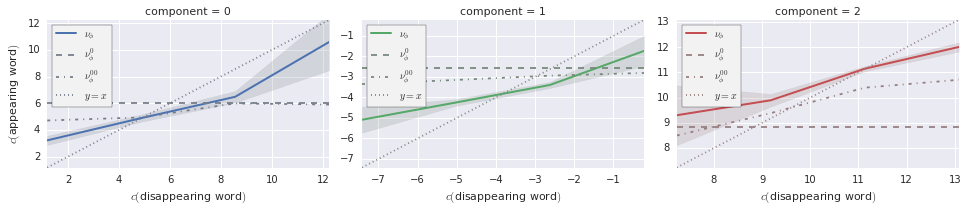

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1735 (cluster-unique) substitutions, but the PCA is in fact computed on 604 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.